<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Isolated-transitions" data-toc-modified-id="Isolated-transitions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Isolated transitions</a></span><ul class="toc-item"><li><span><a href="#Using-propagator-to-optimize-individual-gates" data-toc-modified-id="Using-propagator-to-optimize-individual-gates-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Using propagator to optimize individual gates</a></span><ul class="toc-item"><li><span><a href="#0-2-transition" data-toc-modified-id="0-2-transition-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>0-2 transition</a></span></li><li><span><a href="#1-3-transition" data-toc-modified-id="1-3-transition-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>1-3 transition</a></span></li><li><span><a href="#2-3-transition" data-toc-modified-id="2-3-transition-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>2-3 transition</a></span></li></ul></li><li><span><a href="#Combine-the-gates-together" data-toc-modified-id="Combine-the-gates-together-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Combine the gates together</a></span></li></ul></li><li><span><a href="#Applying-two-drives-at-the-same-time" data-toc-modified-id="Applying-two-drives-at-the-same-time-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Applying two drives at the same time</a></span><ul class="toc-item"><li><span><a href="#Combined,-use-state-vectors" data-toc-modified-id="Combined,-use-state-vectors-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Combined, use state vectors</a></span></li><li><span><a href="#Get-the-Pauli-transfer-matrix-(PTM)" data-toc-modified-id="Get-the-Pauli-transfer-matrix-(PTM)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Get the Pauli transfer matrix (PTM)</a></span></li><li><span><a href="#Estimate-the-error-channel" data-toc-modified-id="Estimate-the-error-channel-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Estimate the error channel</a></span></li></ul></li><li><span><a href="#Raman-type-gate" data-toc-modified-id="Raman-type-gate-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Raman type gate</a></span><ul class="toc-item"><li><span><a href="#Drive-0-2-detuned" data-toc-modified-id="Drive-0-2-detuned-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Drive 0-2 detuned</a></span></li><li><span><a href="#Two-drives-at-the-same-time" data-toc-modified-id="Two-drives-at-the-same-time-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Two drives at the same time</a></span></li><li><span><a href="#Tomography" data-toc-modified-id="Tomography-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Tomography</a></span></li></ul></li></ul></div>


# Isolated transitions

In [177]:
import numpy as np
from matplotlib import pyplot as plt
from qutip import*
from scipy.special import eval_hermite as hpoly
import sys
#here, configure the path to the directory for pre-defined functions.
sys.path.append('/Users/longnguyen/Documents/GitHub/Fluxonium_berkeley/')
from Fluxonium_hamiltonians import qchard_fluxonium as fluxonium
from Fluxonium_hamiltonians import qchard_pshapes as pshapes
from Fluxonium_hamiltonians import qchard_evolgates as gates
from Fluxonium_hamiltonians import qchard_evolgates_double as gates_double
from Fluxonium_hamiltonians import qchard_rotope as op
from scipy.optimize import minimize
import plotting_settings
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

In [178]:
savefig = False
from matplotlib import rcParams
if savefig == True:
    rcParams['font.family'] = 'serif'
    rcParams['font.serif'] = ['Times New Roman']
else:
    rcParams['font.family'] = 'sans-serif'
    rcParams['font.serif'] = ['Arial']
    
figpath = '/Users/longnguyen/Google Drive/LBL Research/Illustration/'

In [179]:
#Device parameters
nlev_lc = 20
nlev_single = 5  # The number of single-qubit levels to show.
take_data_from_input_file = False

if not take_data_from_input_file:
    # Parameters of the first fluxonium.
    E_L = 1  # inductive energy
    E_C = 1.0  # charging energy
    E_J = 7  # Josephson energy
    phi_ext = 0.9*np.pi  # external phase shift

qubit = fluxonium.Fluxonium(E_J = E_J, E_C=E_C, E_L=E_L, phi_ext=phi_ext, nlev = nlev_single, nlev_lc = nlev_lc)
H_nodrive = qubit.H()

state_0 = basis(nlev_single,0)
state_1 = basis(nlev_single,1)
state_2 = basis(nlev_single,2)
state_3 = basis(nlev_single,3)
state_4 = basis(nlev_single,4)

eig_energies, eig_vectors = H_nodrive.eigenstates()
state_0 = eig_vectors[0]
state_1 = eig_vectors[1]
state_2 = eig_vectors[2]

state_sup02 = (state_0 + state_2).unit()
state_sup13 = (state_1 + state_3).unit()
state_sup23 = (state_2 + state_3).unit()

P0 = state_0 * state_0.dag()
P1 = state_1 * state_1.dag()
P2 = state_2 * state_2.dag()
P3 = state_3 * state_3.dag()
P4 = state_4 * state_4.dag()

## Using propagator to optimize individual gates

### 0-2 transition

5.642505395714683e-06
0.33333392957315056


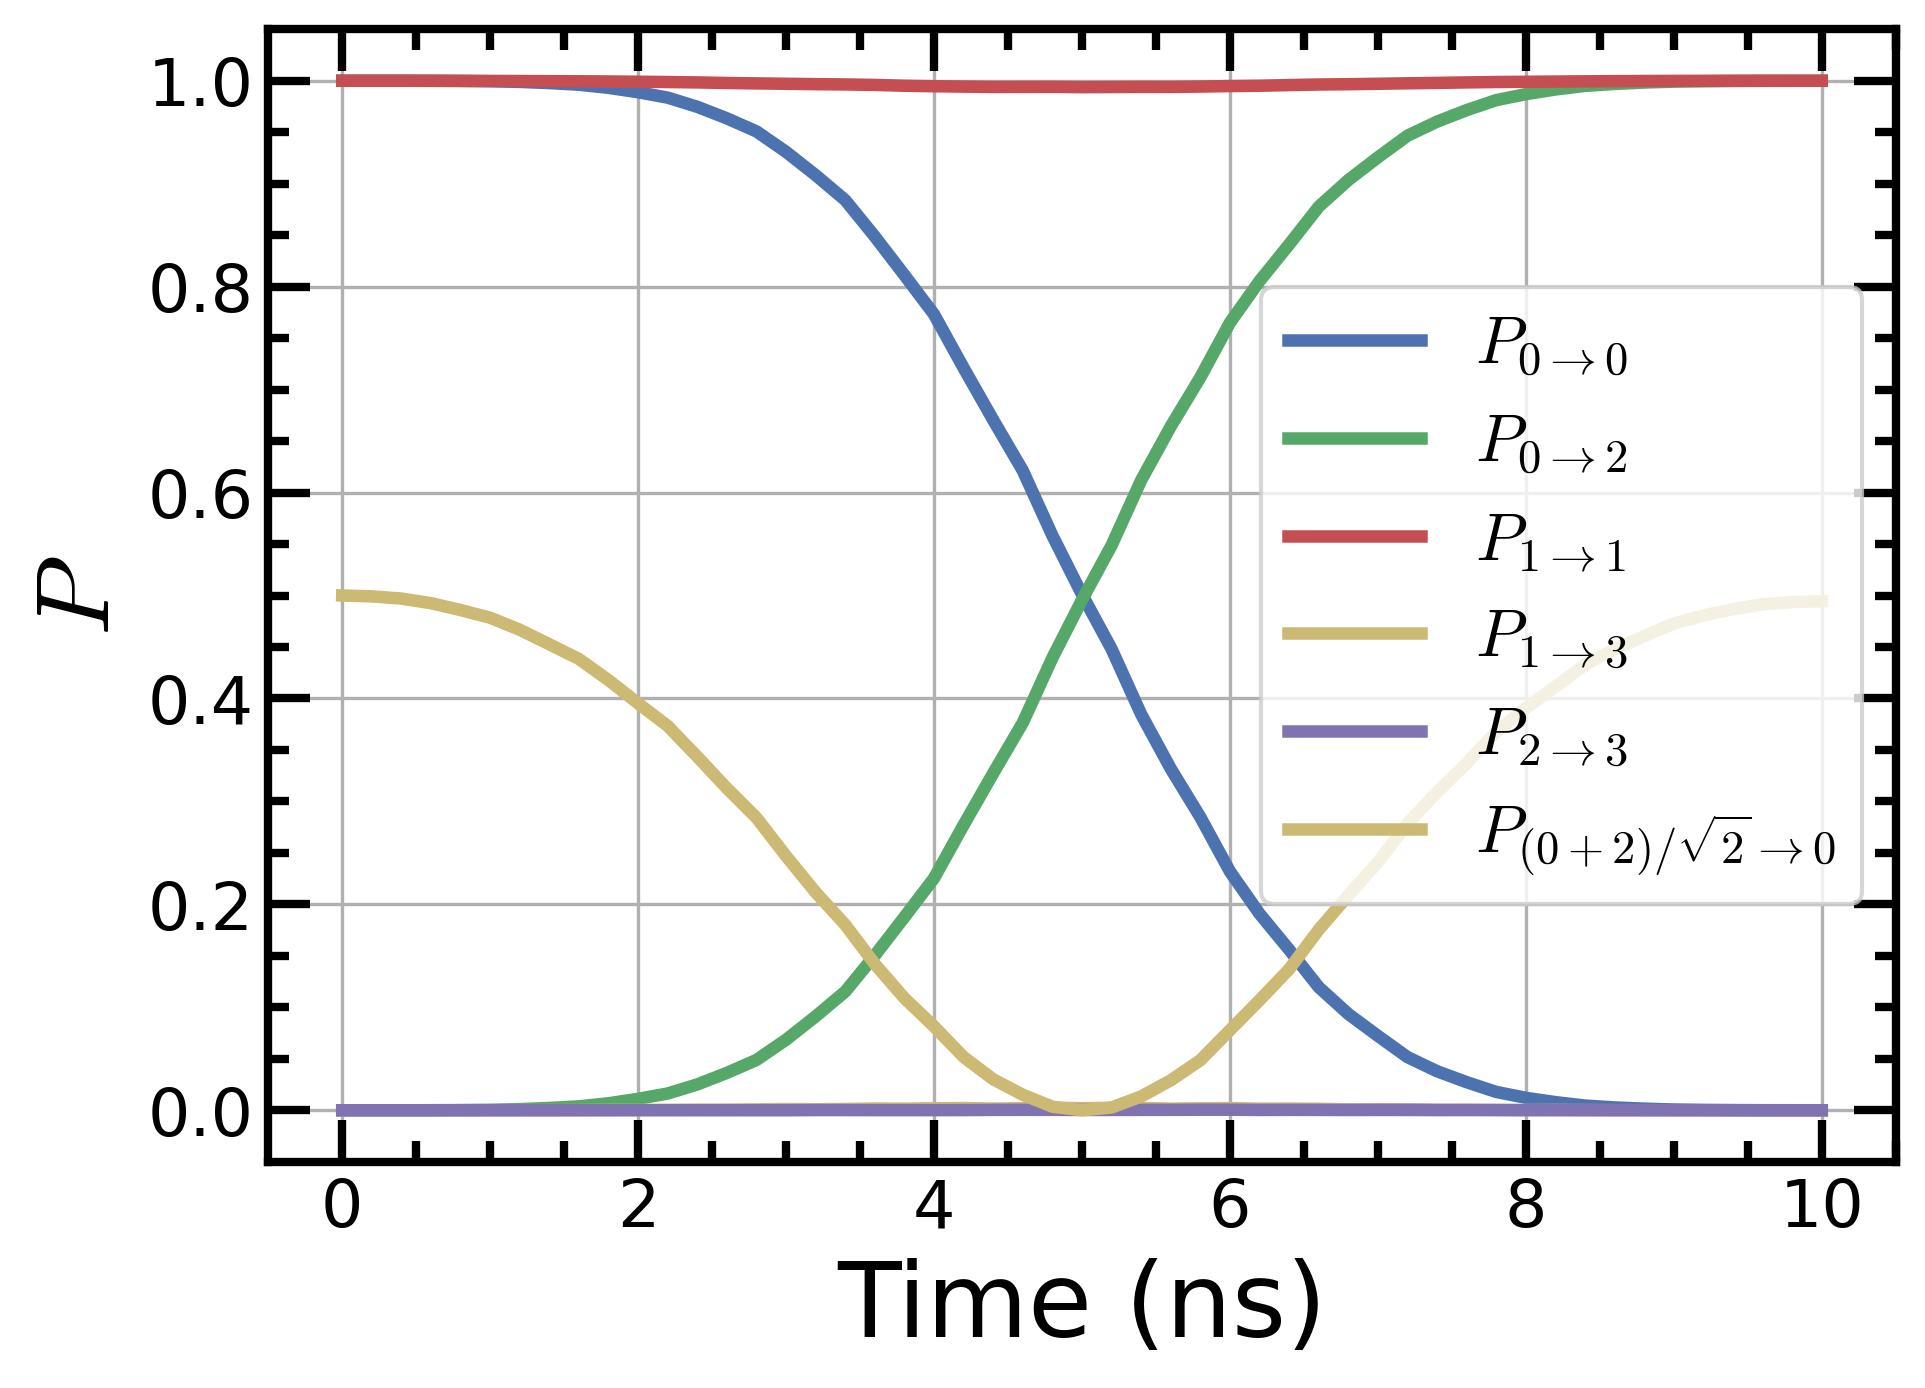

In [32]:
#Gate parameter
T_gate_02 = 10 #ns
t_points_02 = np.linspace(0, T_gate_02, 5 * int(T_gate_02) + 1)
drive_amplitude_factor = 0.5
delta_omega_d = 0
shape = 'gauss'
sigma = 0.25
drag = True
drag_coeff = 0.0

ini_state = 0
fin_state = 2
comp_space = [ini_state,fin_state]
omega_d = qubit.freq(ini_state,fin_state) + delta_omega_d
matr_el = np.abs(qubit.n_ij(ini_state,fin_state))

epsilon = drive_amplitude_factor/matr_el
H_drive = epsilon*(qubit.n())
H_dummy = 0*(qubit.n())
U_t = gates.evolution_operator_microwave(
                qubit.H(), H_drive, t_points=t_points_02, DRAG = drag, DRAG_coefficient = drag_coeff,
                T_gate=T_gate_02, shape=shape, sigma=sigma, omega_d=omega_d)
U_nothing_1 = gates.evolution_operator_microwave(
                -qubit.H(), H_dummy, t_points=t_points_02, DRAG = drag, DRAG_coefficient = drag_coeff,
                T_gate=T_gate_02, shape=shape, sigma=sigma, omega_d=omega_d)

trans_prob_00 = gates.prob_transition(U_t, state_0, state_0)
trans_prob_02 = gates.prob_transition(U_t, state_0, state_2)
trans_prob_11 = gates.prob_transition(U_t, state_1, state_1)
trans_prob_13 = gates.prob_transition(U_t, state_1, state_3)
trans_prob_23 = gates.prob_transition(U_t, state_2, state_3)

trans_prob_sup02to0 = gates.prob_transition(U_t, state_sup02, state_0)
trans_prob_sup13to1 = gates.prob_transition(U_t, state_sup13, state_1)
trans_prob_sup23to2 = gates.prob_transition(U_t, state_sup23, state_2)

plt.figure(figsize = [7,5])
plt.plot(t_points_02, trans_prob_00, label=r'$P_{0\rightarrow 0}$')
plt.plot(t_points_02, trans_prob_02, label=r'$P_{0\rightarrow 2}$')
plt.plot(t_points_02, trans_prob_11, label=r'$P_{1\rightarrow 1}$')
plt.plot(t_points_02, trans_prob_13, color = 'C4', label=r'$P_{1\rightarrow 3}$')
plt.plot(t_points_02, trans_prob_23, label=r'$P_{2\rightarrow 3}$')
plt.plot(t_points_02, trans_prob_sup02to0, label=r'$P_{(0+2)/\sqrt{2}\rightarrow 0}$')
plt.xlabel('Time (ns)')
plt.ylabel(r'$P$')
plt.legend()
plt.grid()
# plt.title(r'$\mathcal{F}=$'+str(np.round(fidel,6)))

print (1-trans_prob_02[-1]-trans_prob_00[-1])

U_proj = np.zeros((2,2))
U_ideal = op.sigy(N=nlev_single)
U_real = U_nothing_1[-1]*U_t[-1]

U_real = Qobj(P0*U_real + P2*U_real)

op1 = U_real.dag() * U_real
op2 = U_real * U_ideal.dag()
fidel = (op1.tr() + (abs(op2.tr())) ** 2) / 6.0
print(fidel)

In [33]:
U_ideal = sigmay()
def infidelity_02(drag_coeff):
    U_t = gates.evolution_operator_microwave(
                qubit.H(), H_drive, t_points=t_points_02, DRAG = drag, DRAG_coefficient = drag_coeff,
                T_gate=T_gate_02, shape=shape, sigma=sigma, omega_d=omega_d)
    U_f = U_nothing_1[-1]*U_t[-1]
    U_real = np.diag(np.zeros(2, dtype = complex))
    U_real[0,0] = U_f[0,0]
    U_real[0,1] = U_f[0,2]
    U_real[1,0] = U_f[2,0]
    U_real[1,1] = U_f[2,2]
    U_real = Qobj(U_real)

    op1 = U_real.dag() * U_real
    op2 = U_real * U_ideal.dag()
    fidel = (op1.tr() + (abs(op2.tr())) ** 2) / 6.0
    return abs(1 - fidel)
print (infidelity_02(0))

2.8611986138904477e-05


2.6583823461323597e-05
-0.0034568372381580848


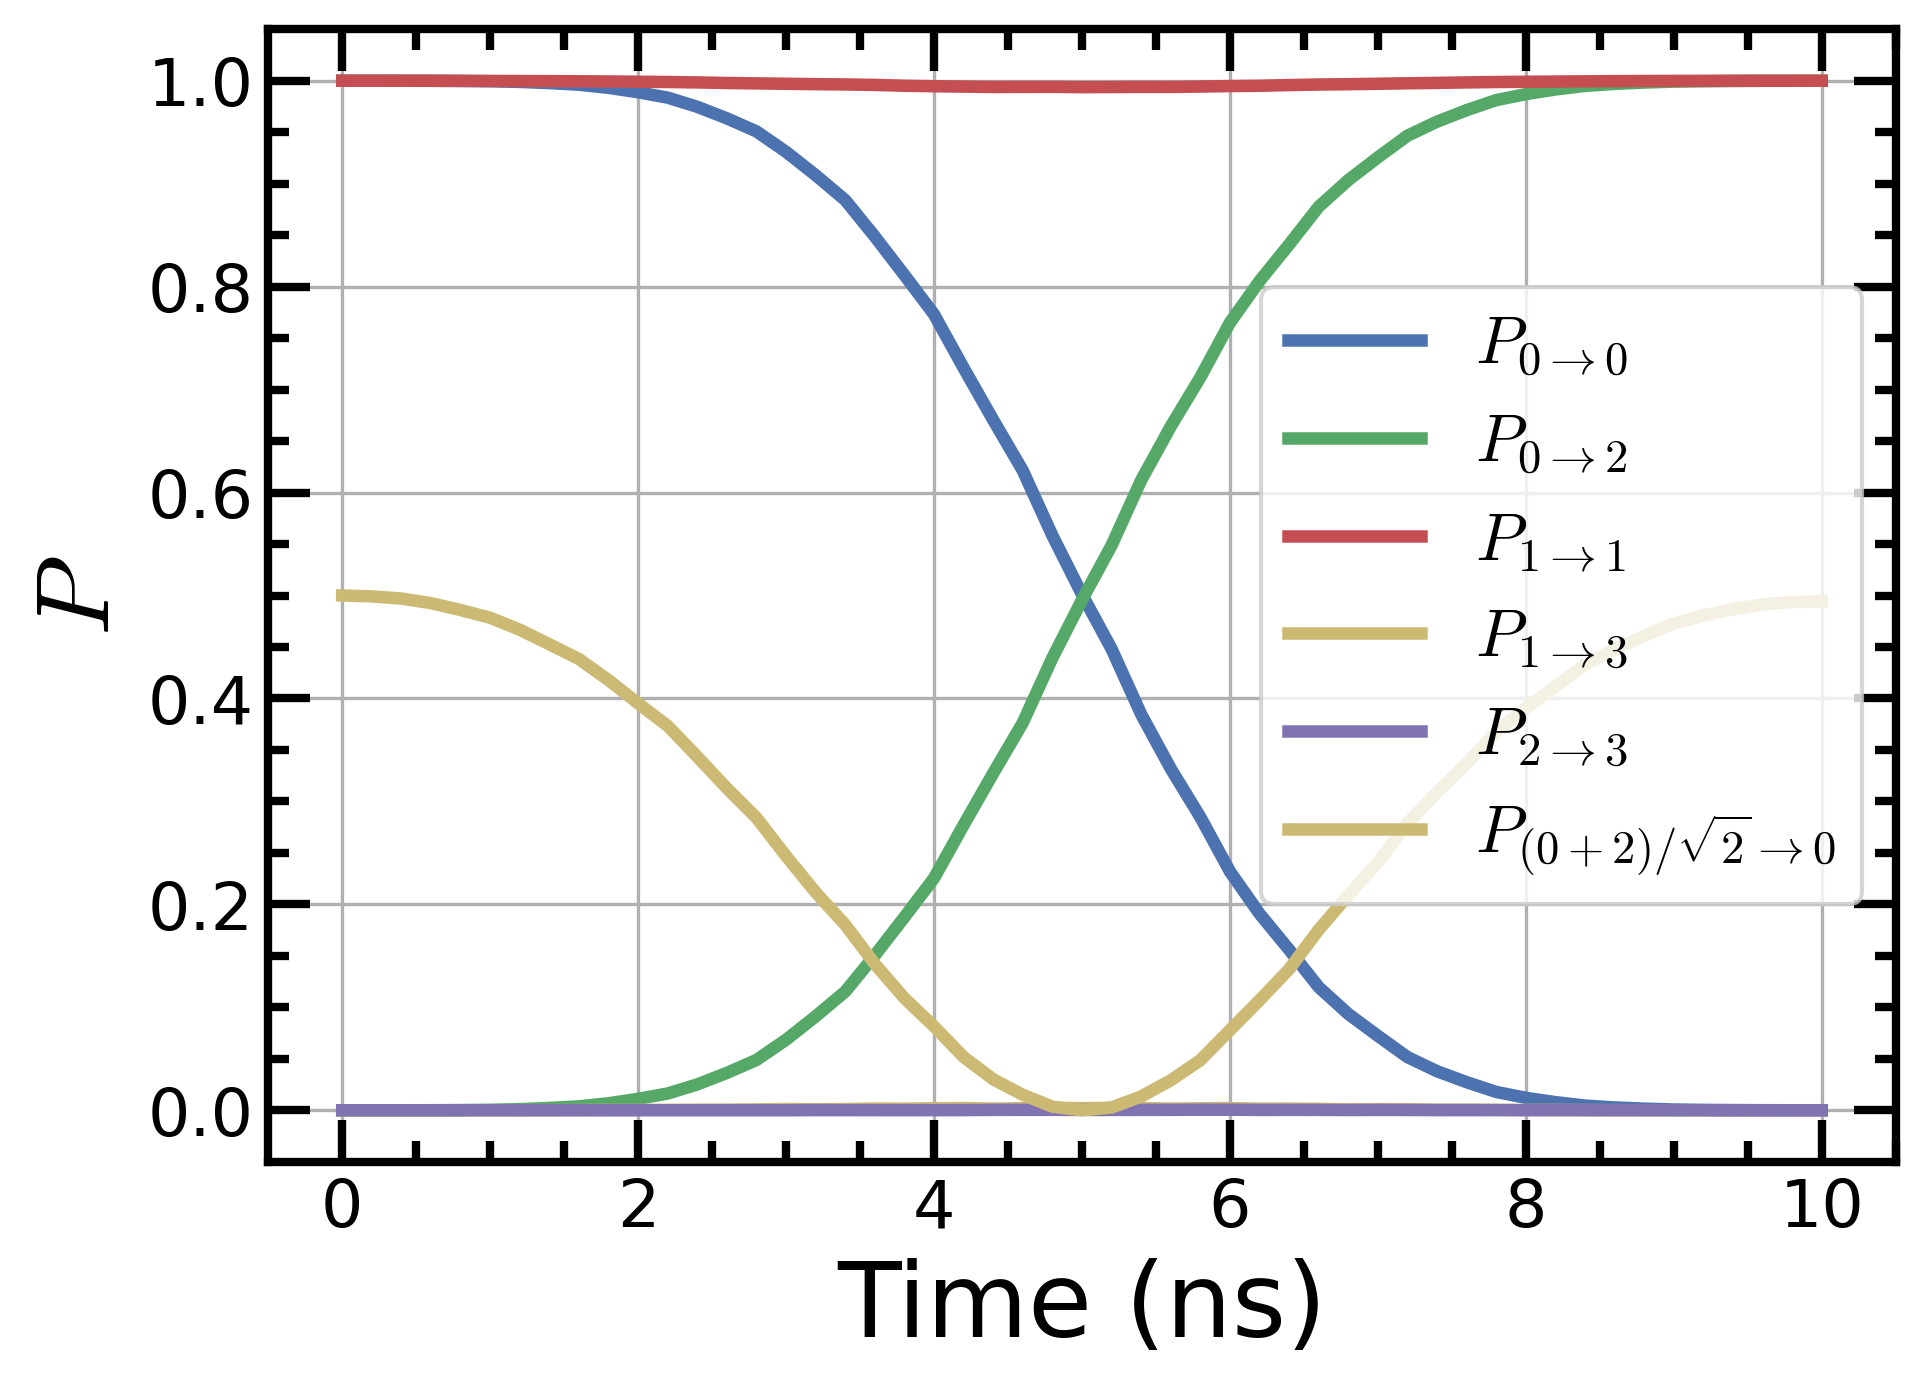

In [34]:
opt = minimize(infidelity_02, x0 = [0.0], method = 'Powell', tol = 1e-8)
print (opt.fun)
print (opt.x[0])

## Check
drag_coeff_02 = opt.x[0]
ini_state = 0
fin_state = 2
comp_space = [ini_state,fin_state]
omega_d = qubit.freq(ini_state,fin_state) + delta_omega_d
matr_el = np.abs(qubit.n_ij(ini_state,fin_state))

epsilon = drive_amplitude_factor/matr_el
H_drive = epsilon*(qubit.n())
H_dummy = 0*(qubit.n())
U02_t = gates.evolution_operator_microwave(
                qubit.H(), H_drive, t_points=t_points_02, DRAG = drag, DRAG_coefficient = drag_coeff_02,
                T_gate=T_gate_02, shape=shape, sigma=sigma, omega_d=omega_d)
U_nothing_1 = gates.evolution_operator_microwave(
                -qubit.H(), H_dummy, t_points=t_points_02, DRAG = drag, DRAG_coefficient = drag_coeff_02,
                T_gate=T_gate_02, shape=shape, sigma=sigma, omega_d=omega_d)

trans_prob_00 = gates.prob_transition(U02_t, state_0, state_0)
trans_prob_02 = gates.prob_transition(U02_t, state_0, state_2)
trans_prob_11 = gates.prob_transition(U02_t, state_1, state_1)
trans_prob_13 = gates.prob_transition(U02_t, state_1, state_3)
trans_prob_23 = gates.prob_transition(U02_t, state_2, state_3)

trans_prob_sup02to0 = gates.prob_transition(U02_t, state_sup02, state_0)
trans_prob_sup13to1 = gates.prob_transition(U02_t, state_sup13, state_1)
trans_prob_sup23to2 = gates.prob_transition(U02_t, state_sup23, state_2)

plt.figure(figsize = [7,5])
plt.plot(t_points_02, trans_prob_00, label=r'$P_{0\rightarrow 0}$')
plt.plot(t_points_02, trans_prob_02, label=r'$P_{0\rightarrow 2}$')
plt.plot(t_points_02, trans_prob_11, label=r'$P_{1\rightarrow 1}$')
plt.plot(t_points_02, trans_prob_13, color = 'C4', label=r'$P_{1\rightarrow 3}$')
plt.plot(t_points_02, trans_prob_23, label=r'$P_{2\rightarrow 3}$')
plt.plot(t_points_02, trans_prob_sup02to0, label=r'$P_{(0+2)/\sqrt{2}\rightarrow 0}$')
plt.xlabel('Time (ns)')
plt.ylabel(r'$P$')
plt.legend()
plt.grid()

In [35]:
print(U_nothing_1[-1]*U02_t[-1])

Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = False
Qobj data =
[[ 5.59235391e-03+1.29174904e-04j -1.90582910e-03+2.14951109e-04j
  -9.99308411e-01-3.66850617e-02j  2.36802841e-04-5.35997602e-05j
   1.39896974e-03+3.42290400e-04j]
 [ 1.52159785e-03+1.16366831e-03j  9.99994564e-01-1.74854805e-03j
  -1.88870591e-03-2.74963852e-04j  1.86509390e-04-6.83605112e-04j
   3.71612794e-05-9.73772042e-06j]
 [ 9.99307760e-01+3.67004684e-02j -1.55076318e-03+1.10851144e-03j
   5.57460509e-03+2.81155118e-04j  2.50262273e-04+2.13838334e-05j
   6.18988653e-04+1.28606597e-03j]
 [-2.47361577e-04+4.82960028e-05j -2.89259591e-04-6.46776126e-04j
   2.40053391e-04+2.78632124e-05j  9.88153359e-01-1.53466404e-01j
  -3.72705597e-04+4.89896924e-04j]
 [-7.76345773e-04+1.20409673e-03j -3.35236136e-05-1.65357351e-05j
   1.42225459e-03-1.64795192e-04j  4.04463849e-04+4.62555982e-04j
   9.96547722e-01+8.29948603e-02j]]


### 1-3 transition

3.8167222986940086e-05


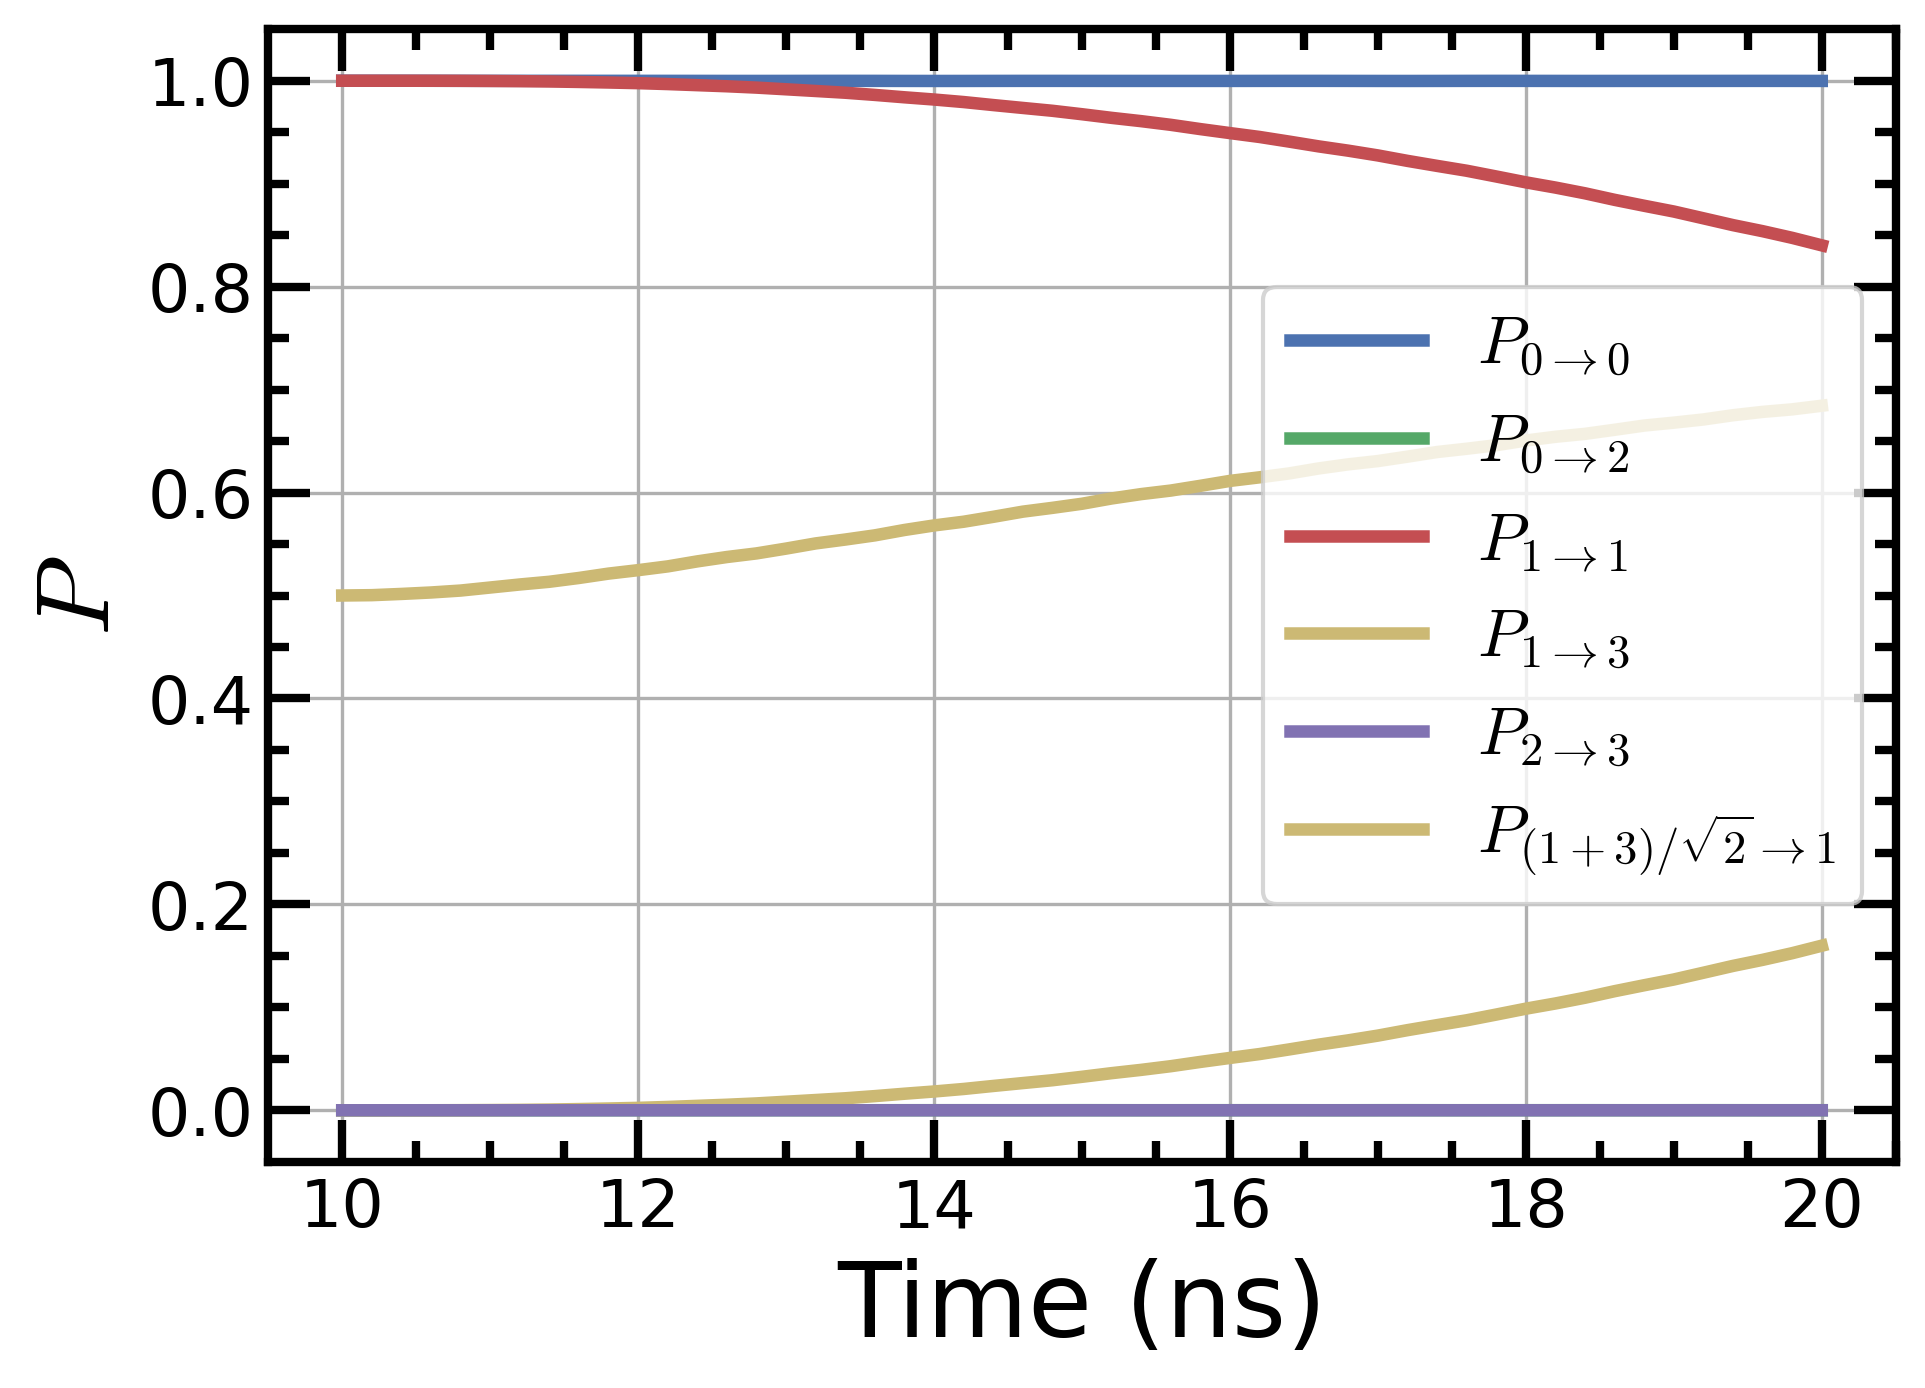

In [36]:
#Gate parameter
T_gate_13 = 10 #ns
t_points_13 = np.linspace(T_gate_02, T_gate_02+T_gate_13, 5 * int(T_gate_13) + 1)
drive_amplitude_factor = 0.5
delta_omega_d = 0
shape = 'gauss'
sigma = 0.25
drag = True
drag_coeff = 0.0

ini_state = 1
fin_state = 3
comp_space = [ini_state,fin_state]
omega_d = qubit.freq(ini_state,fin_state) + delta_omega_d
matr_el = np.abs(qubit.n_ij(ini_state,fin_state))

epsilon = drive_amplitude_factor/matr_el
H_drive = epsilon*(qubit.n())
H_dummy = 0*(qubit.n())
U_t = gates.evolution_operator_microwave(
                qubit.H(), H_drive, t_points=t_points_13, DRAG = drag, DRAG_coefficient = drag_coeff,
                T_gate=T_gate_13, shape=shape, sigma=sigma, omega_d=omega_d)
U_nothing = gates.evolution_operator_microwave(
                -qubit.H(), H_dummy, t_points=t_points_13, DRAG = drag, DRAG_coefficient = drag_coeff,
                T_gate=T_gate_13, shape=shape, sigma=sigma, omega_d=omega_d)

trans_prob_00 = gates.prob_transition(U_t, state_0, state_0)
trans_prob_02 = gates.prob_transition(U_t, state_0, state_2)
trans_prob_11 = gates.prob_transition(U_t, state_1, state_1)
trans_prob_13 = gates.prob_transition(U_t, state_1, state_3)
trans_prob_23 = gates.prob_transition(U_t, state_2, state_3)

trans_prob_sup02to0 = gates.prob_transition(U_t, state_sup02, state_0)
trans_prob_sup13to1 = gates.prob_transition(U_t, state_sup13, state_1)
trans_prob_sup23to2 = gates.prob_transition(U_t, state_sup23, state_2)

plt.figure(figsize = [7,5])
plt.plot(t_points_13, trans_prob_00, label=r'$P_{0\rightarrow 0}$')
plt.plot(t_points_13, trans_prob_02, label=r'$P_{0\rightarrow 2}$')
plt.plot(t_points_13, trans_prob_11, label=r'$P_{1\rightarrow 1}$')
plt.plot(t_points_13, trans_prob_13, color = 'C4', label=r'$P_{1\rightarrow 3}$')
plt.plot(t_points_13, trans_prob_23, label=r'$P_{2\rightarrow 3}$')
plt.plot(t_points_13, trans_prob_sup13to1, label=r'$P_{(1+3)/\sqrt{2}\rightarrow 1}$')

plt.xlabel('Time (ns)')
plt.ylabel(r'$P$')
plt.legend()
plt.grid()
# plt.title(r'$\mathcal{F}=$'+str(np.round(fidel,6)))

print (1-trans_prob_11[-1]-trans_prob_13[-1])

In [37]:
U_ideal = sigmay()
def infidelity_13(drag_coeff):
    U_t = gates.evolution_operator_microwave(
                qubit.H(), H_drive, t_points=t_points_13, DRAG = drag, DRAG_coefficient = drag_coeff,
                T_gate=T_gate_13, shape=shape, sigma=sigma, omega_d=omega_d)
    U_f = U_nothing[-1]*U_t[-1]
    U_real = np.diag(np.zeros(2, dtype = complex))
    U_real[0,0] = U_f[1,1]
    U_real[0,1] = U_f[1,3]
    U_real[1,0] = U_f[3,1]
    U_real[1,1] = U_f[3,3]
    U_real = Qobj(U_real)

    op1 = U_real.dag() * U_real
    op2 = U_real * U_ideal.dag()
    fidel = (op1.tr() + (abs(op2.tr())) ** 2) / 6.0
    return abs(1 - fidel)
print (infidelity_13(0))

0.6394499250878662


0.24208911334871885
-28.33226401210258


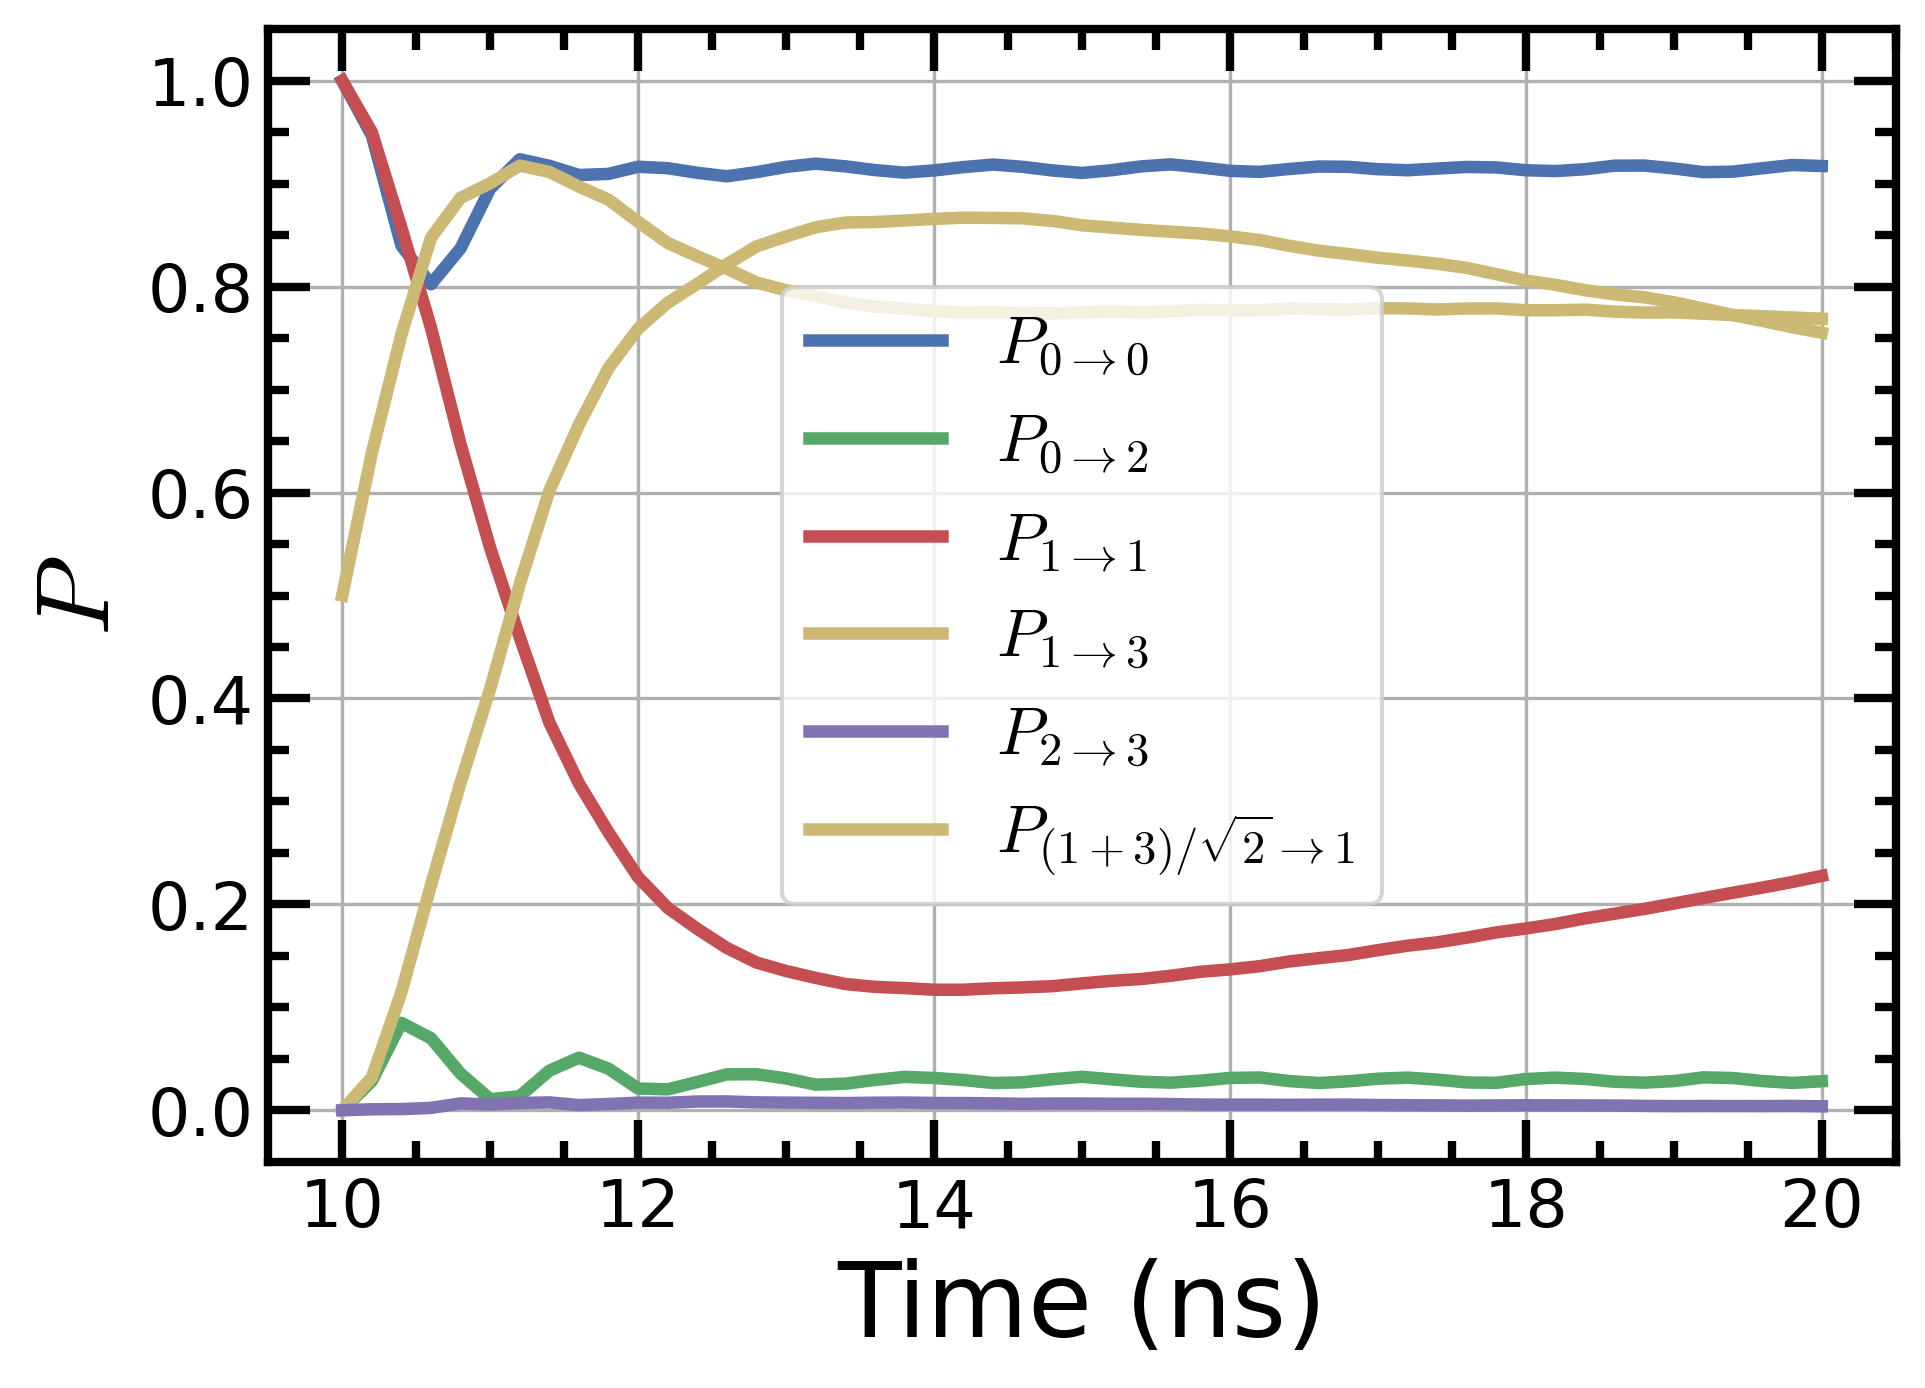

In [38]:
opt = minimize(infidelity_13, x0 = [0.0], method = 'Powell', tol = 1e-8)
print (opt.fun)
print (opt.x[0])

## Check
drag_coeff_13 = opt.x[0]
ini_state = 1
fin_state = 3
comp_space = [ini_state,fin_state]
omega_d = qubit.freq(ini_state,fin_state) + delta_omega_d
matr_el = np.abs(qubit.n_ij(ini_state,fin_state))

epsilon = drive_amplitude_factor/matr_el
H_drive = epsilon*(qubit.n())
H_dummy = 0*(qubit.n())
U13_t = gates.evolution_operator_microwave(
                qubit.H(), H_drive, t_points=t_points_13, DRAG = drag, DRAG_coefficient = drag_coeff_13,
                T_gate=T_gate_13, shape=shape, sigma=sigma, omega_d=omega_d)


trans_prob_00 = gates.prob_transition(U13_t, state_0, state_0)
trans_prob_02 = gates.prob_transition(U13_t, state_0, state_2)
trans_prob_11 = gates.prob_transition(U13_t, state_1, state_1)
trans_prob_13 = gates.prob_transition(U13_t, state_1, state_3)
trans_prob_23 = gates.prob_transition(U13_t, state_2, state_3)

trans_prob_sup02to0 = gates.prob_transition(U13_t, state_sup02, state_0)
trans_prob_sup13to1 = gates.prob_transition(U13_t, state_sup13, state_1)
trans_prob_sup23to2 = gates.prob_transition(U13_t, state_sup23, state_2)

plt.figure(figsize = [7,5])
plt.plot(t_points_13, trans_prob_00, label=r'$P_{0\rightarrow 0}$')
plt.plot(t_points_13, trans_prob_02, label=r'$P_{0\rightarrow 2}$')
plt.plot(t_points_13, trans_prob_11, label=r'$P_{1\rightarrow 1}$')
plt.plot(t_points_13, trans_prob_13, color = 'C4', label=r'$P_{1\rightarrow 3}$')
plt.plot(t_points_13, trans_prob_23, label=r'$P_{2\rightarrow 3}$')
plt.plot(t_points_13, trans_prob_sup13to1, label=r'$P_{(1+3)/\sqrt{2}\rightarrow 1}$')
plt.xlabel('Time (ns)')
plt.ylabel(r'$P$')
plt.legend()
plt.grid()

### 2-3 transition

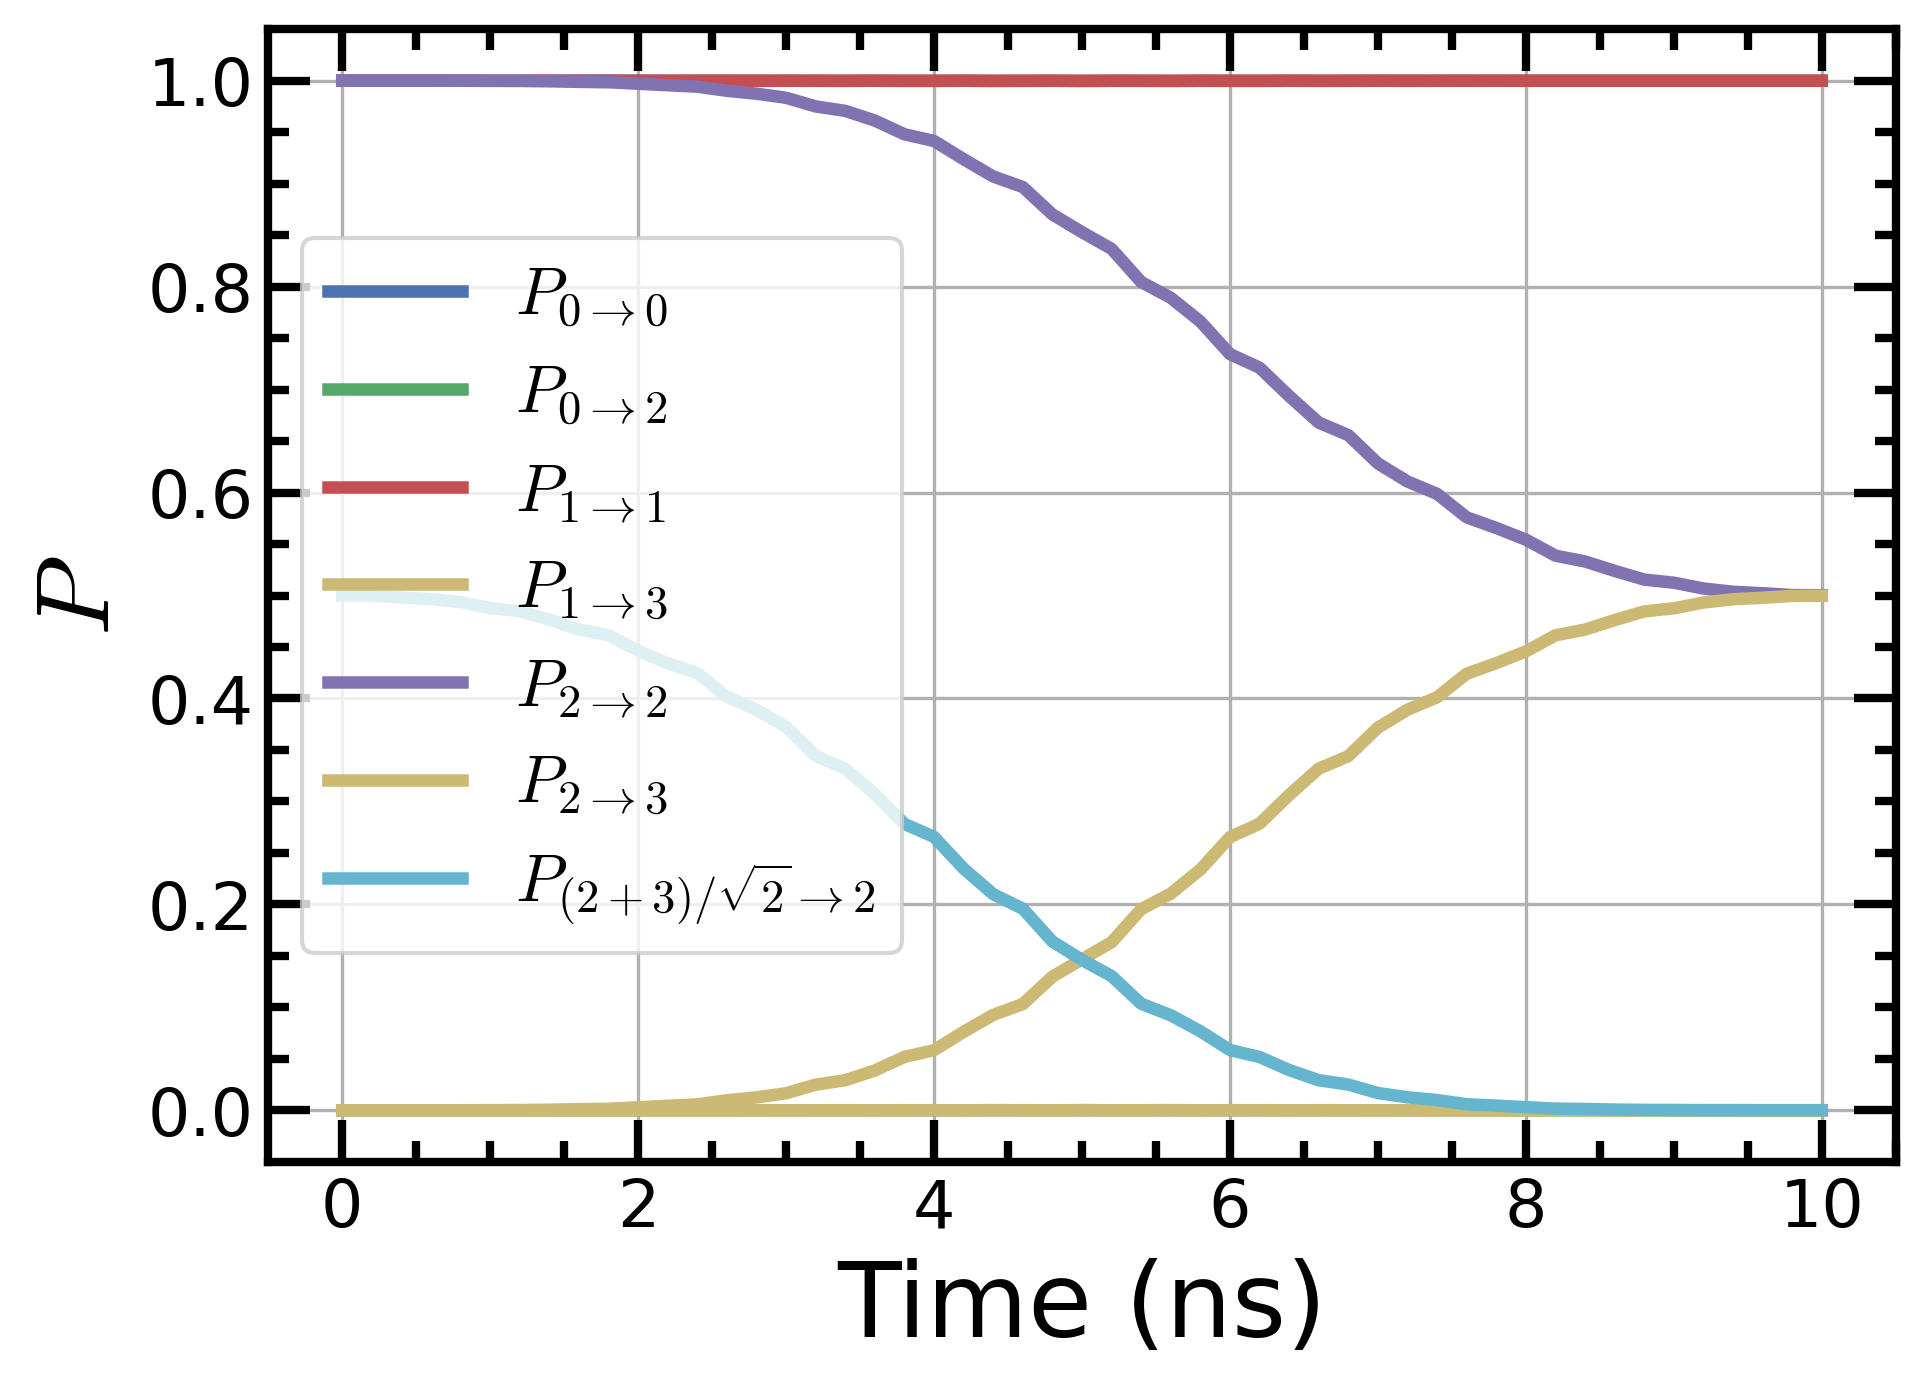

In [39]:
#Gate parameter
T_gate_23 = 10 #ns
t_points_23 = np.linspace(0, T_gate_23, 5 * int(T_gate_23) + 1)
drive_amplitude_factor = 0.25
delta_omega_d = 0
shape = 'gauss'
sigma = 0.25
drag = True
drag_coeff = 0.0

ini_state = 2
fin_state = 3
comp_space = [ini_state,fin_state]
omega_d = qubit.freq(ini_state,fin_state) + delta_omega_d
matr_el = np.abs(qubit.n_ij(ini_state,fin_state))

epsilon = drive_amplitude_factor/matr_el
H_drive = epsilon*(qubit.n())
H_dummy = 0*(qubit.n())
U_t = gates.evolution_operator_microwave(
                qubit.H(), H_drive, t_points=t_points_23, DRAG = drag, DRAG_coefficient = drag_coeff,
                T_gate=T_gate_23, shape=shape, sigma=sigma, omega_d=omega_d)
U_nothing = gates.evolution_operator_microwave(
                -qubit.H(), H_dummy, t_points=t_points_23, DRAG = drag, DRAG_coefficient = drag_coeff,
                T_gate=T_gate_23, shape=shape, sigma=sigma, omega_d=omega_d)

trans_prob_00 = gates.prob_transition(U_t, state_0, state_0)
trans_prob_02 = gates.prob_transition(U_t, state_0, state_2)
trans_prob_11 = gates.prob_transition(U_t, state_1, state_1)
trans_prob_13 = gates.prob_transition(U_t, state_1, state_3)
trans_prob_22 = gates.prob_transition(U_t, state_2, state_2)
trans_prob_23 = gates.prob_transition(U_t, state_2, state_3)

trans_prob_sup02to0 = gates.prob_transition(U_t, state_sup02, state_0)
trans_prob_sup13to1 = gates.prob_transition(U_t, state_sup13, state_1)
trans_prob_sup23to2 = gates.prob_transition(U_t, state_sup23, state_2)

plt.figure(figsize = [7,5])
plt.plot(t_points_23, trans_prob_00, label=r'$P_{0\rightarrow 0}$')
plt.plot(t_points_23, trans_prob_02, label=r'$P_{0\rightarrow 2}$')
plt.plot(t_points_23, trans_prob_11, label=r'$P_{1\rightarrow 1}$')
plt.plot(t_points_23, trans_prob_13, color = 'C4', label=r'$P_{1\rightarrow 3}$')
plt.plot(t_points_23, trans_prob_22, label=r'$P_{2\rightarrow 2}$')
plt.plot(t_points_23, trans_prob_23, label=r'$P_{2\rightarrow 3}$')
plt.plot(t_points_23, trans_prob_sup23to2, label=r'$P_{(2+3)/\sqrt{2}\rightarrow 2}$')
plt.xlabel('Time (ns)')
plt.ylabel(r'$P$')
plt.legend()
plt.grid()

In [40]:
U_ideal = ry(phi=np.pi/2)
def infidelity_23(drag_coeff):
    U_t = gates.evolution_operator_microwave(
                qubit.H(), H_drive, t_points=t_points_23, DRAG = drag, DRAG_coefficient = drag_coeff,
                T_gate=T_gate_23, shape=shape, sigma=sigma, omega_d=omega_d)
    U_f = U_nothing[-1]*U_t[-1]
    U_real = np.diag(np.zeros(2, dtype = complex))
    U_real[0,0] = U_f[2,2]
    U_real[0,1] = U_f[2,3]
    U_real[1,0] = U_f[3,2]
    U_real[1,1] = U_f[3,3]
    U_real = Qobj(U_real)

    op1 = U_real.dag() * U_real
    op2 = U_real * U_ideal.dag()
    fidel = (op1.tr() + (abs(op2.tr())) ** 2) / 6.0
    return abs(1 - fidel)
print (infidelity_23(0))

0.00018801529509338


<ipython-input-40-9bd096b2831b>:1: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  U_ideal = ry(phi=np.pi/2)


1.7641156868641872e-08
-0.10540068841319956


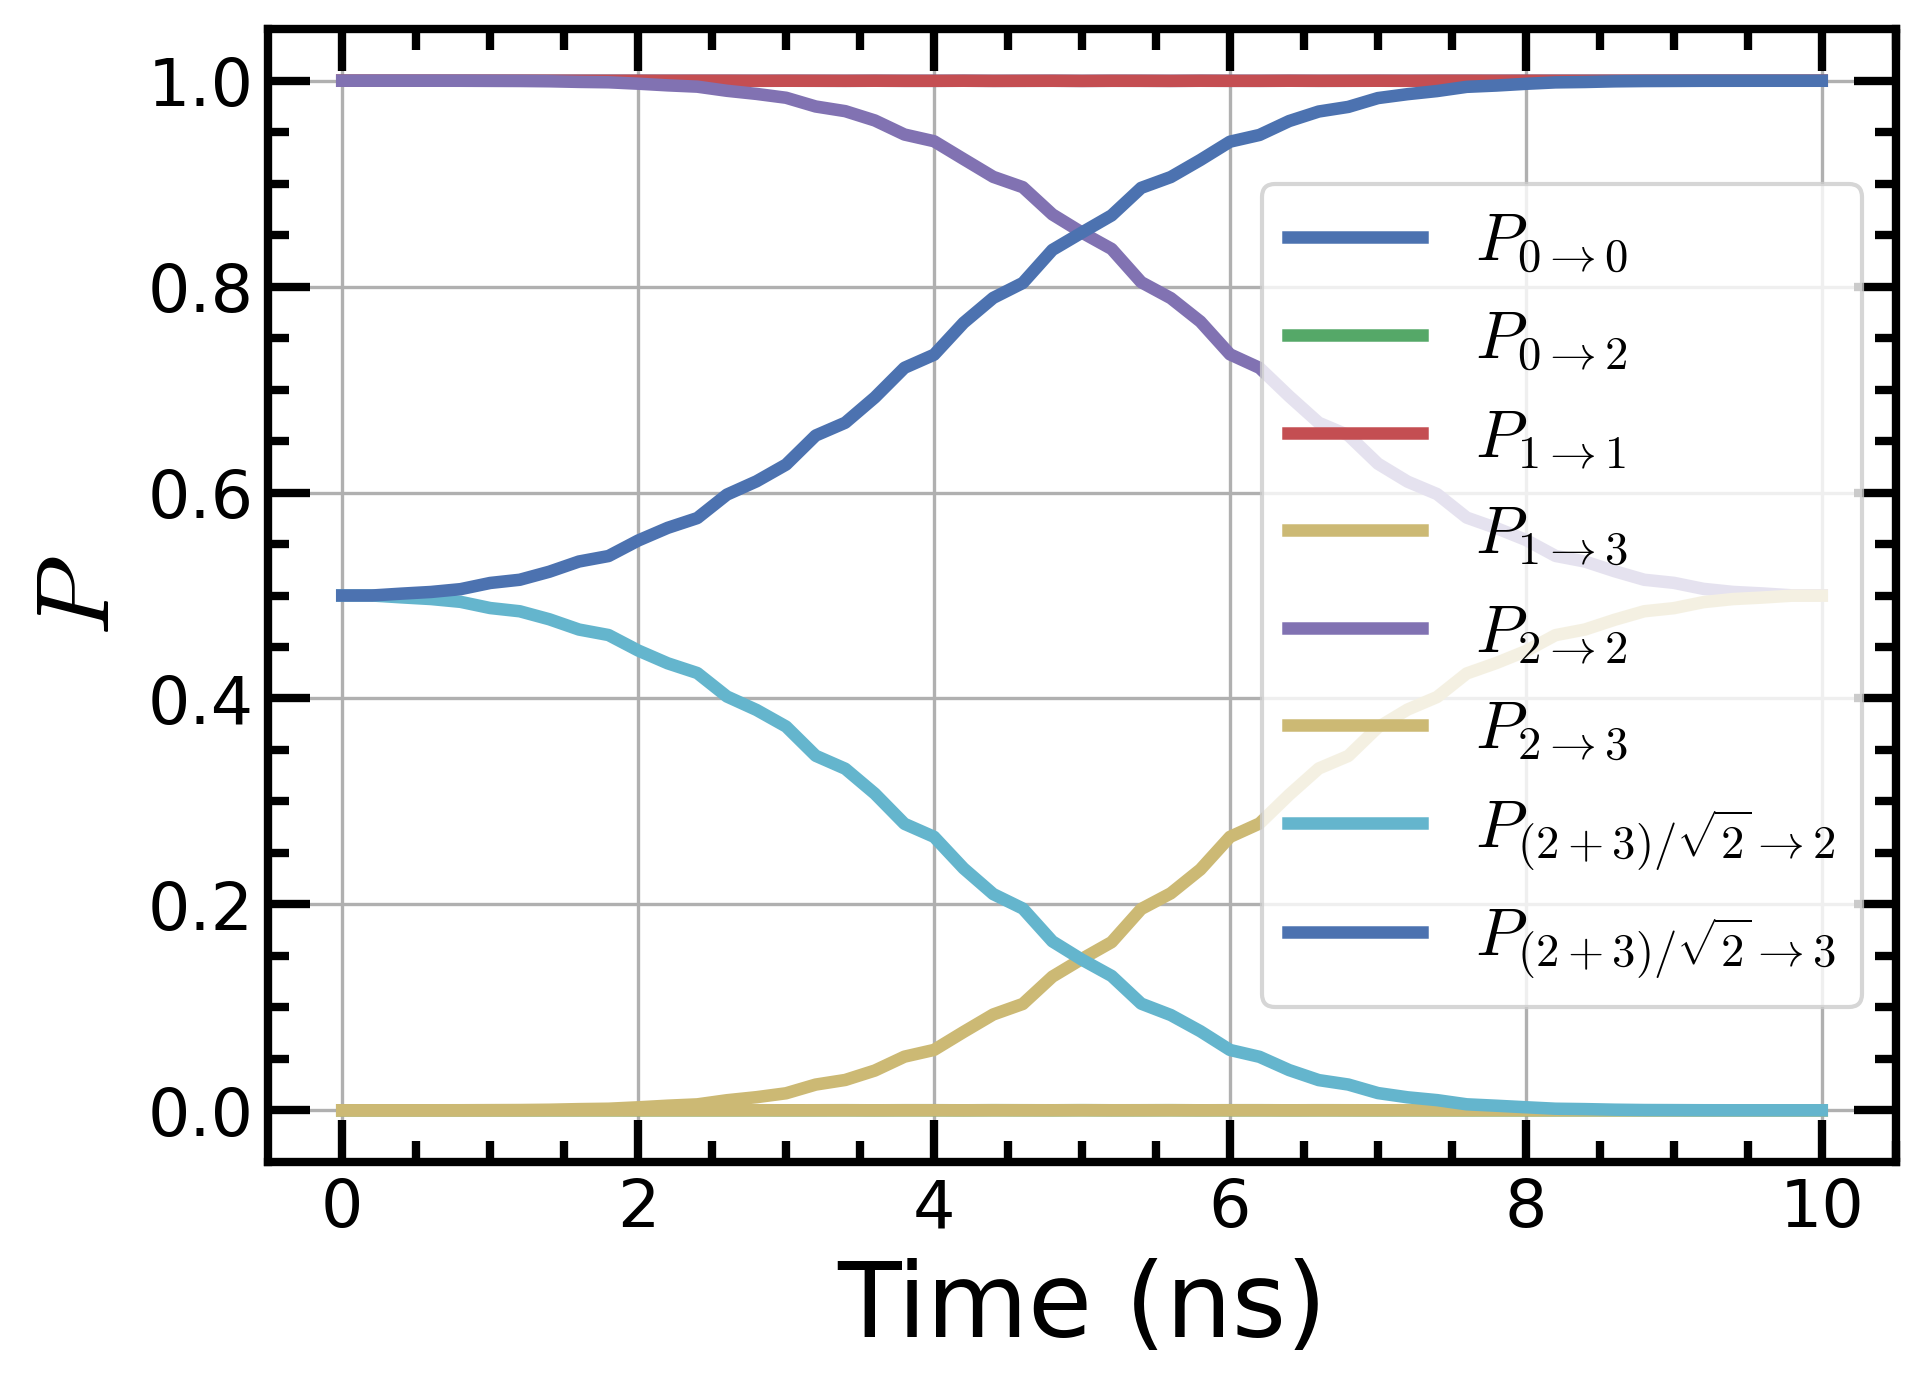

In [41]:
opt = minimize(infidelity_23, x0 = [0.0], method ='Powell', tol = 1e-6)
print (opt.fun)
print (opt.x[0])

## Check
drag_coeff_23 = opt.x[0]
ini_state = 2
fin_state = 3
comp_space = [ini_state,fin_state]
omega_d = qubit.freq(ini_state,fin_state) + delta_omega_d
matr_el = np.abs(qubit.n_ij(ini_state,fin_state))

epsilon = drive_amplitude_factor/matr_el
H_drive = epsilon*(qubit.n())
H_dummy = 0*(qubit.n())
U23_t = gates.evolution_operator_microwave(
                qubit.H(), H_drive, t_points=t_points_23, DRAG = drag, DRAG_coefficient = drag_coeff_23,
                T_gate=T_gate_23, shape=shape, sigma=sigma, omega_d=omega_d)


trans_prob_00 = gates.prob_transition(U23_t, state_0, state_0)
trans_prob_02 = gates.prob_transition(U23_t, state_0, state_2)
trans_prob_11 = gates.prob_transition(U23_t, state_1, state_1)
trans_prob_13 = gates.prob_transition(U23_t, state_1, state_3)
trans_prob_22 = gates.prob_transition(U23_t, state_2, state_2)
trans_prob_23 = gates.prob_transition(U23_t, state_2, state_3)

trans_prob_sup02to0 = gates.prob_transition(U23_t, state_sup02, state_0)
trans_prob_sup13to1 = gates.prob_transition(U23_t, state_sup13, state_1)
trans_prob_sup23to2 = gates.prob_transition(U23_t, state_sup23, state_2)
trans_prob_sup23to3 = gates.prob_transition(U23_t, state_sup23, state_3)

plt.figure(figsize = [7,5])
plt.plot(t_points_23, trans_prob_00, label=r'$P_{0\rightarrow 0}$')
plt.plot(t_points_23, trans_prob_02, label=r'$P_{0\rightarrow 2}$')
plt.plot(t_points_23, trans_prob_11, label=r'$P_{1\rightarrow 1}$')
plt.plot(t_points_23, trans_prob_13, color = 'C4', label=r'$P_{1\rightarrow 3}$')
plt.plot(t_points_23, trans_prob_22, label=r'$P_{2\rightarrow 2}$')
plt.plot(t_points_23, trans_prob_23, label=r'$P_{2\rightarrow 3}$')
plt.plot(t_points_23, trans_prob_sup23to2, label=r'$P_{(2+3)/\sqrt{2}\rightarrow 2}$')
plt.plot(t_points_23, trans_prob_sup23to3, label=r'$P_{(2+3)/\sqrt{2}\rightarrow 3}$')
plt.xlabel('Time (ns)')
plt.ylabel(r'$P$')
plt.legend()
plt.grid()

## Combine the gates together

<ipython-input-42-43c542f7130b>:6: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  sx2 = rx(np.pi/2)
<ipython-input-42-43c542f7130b>:7: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  sy2 = ry(np.pi/2)
<ipython-input-42-43c542f7130b>:11: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  gate = ry(np.pi/2)
<ipython-input-42-43c542f7130b>:20: FutureWarning: `rcond` parameter will cha

(<Figure size 2400x1800 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe98ec45e80>)

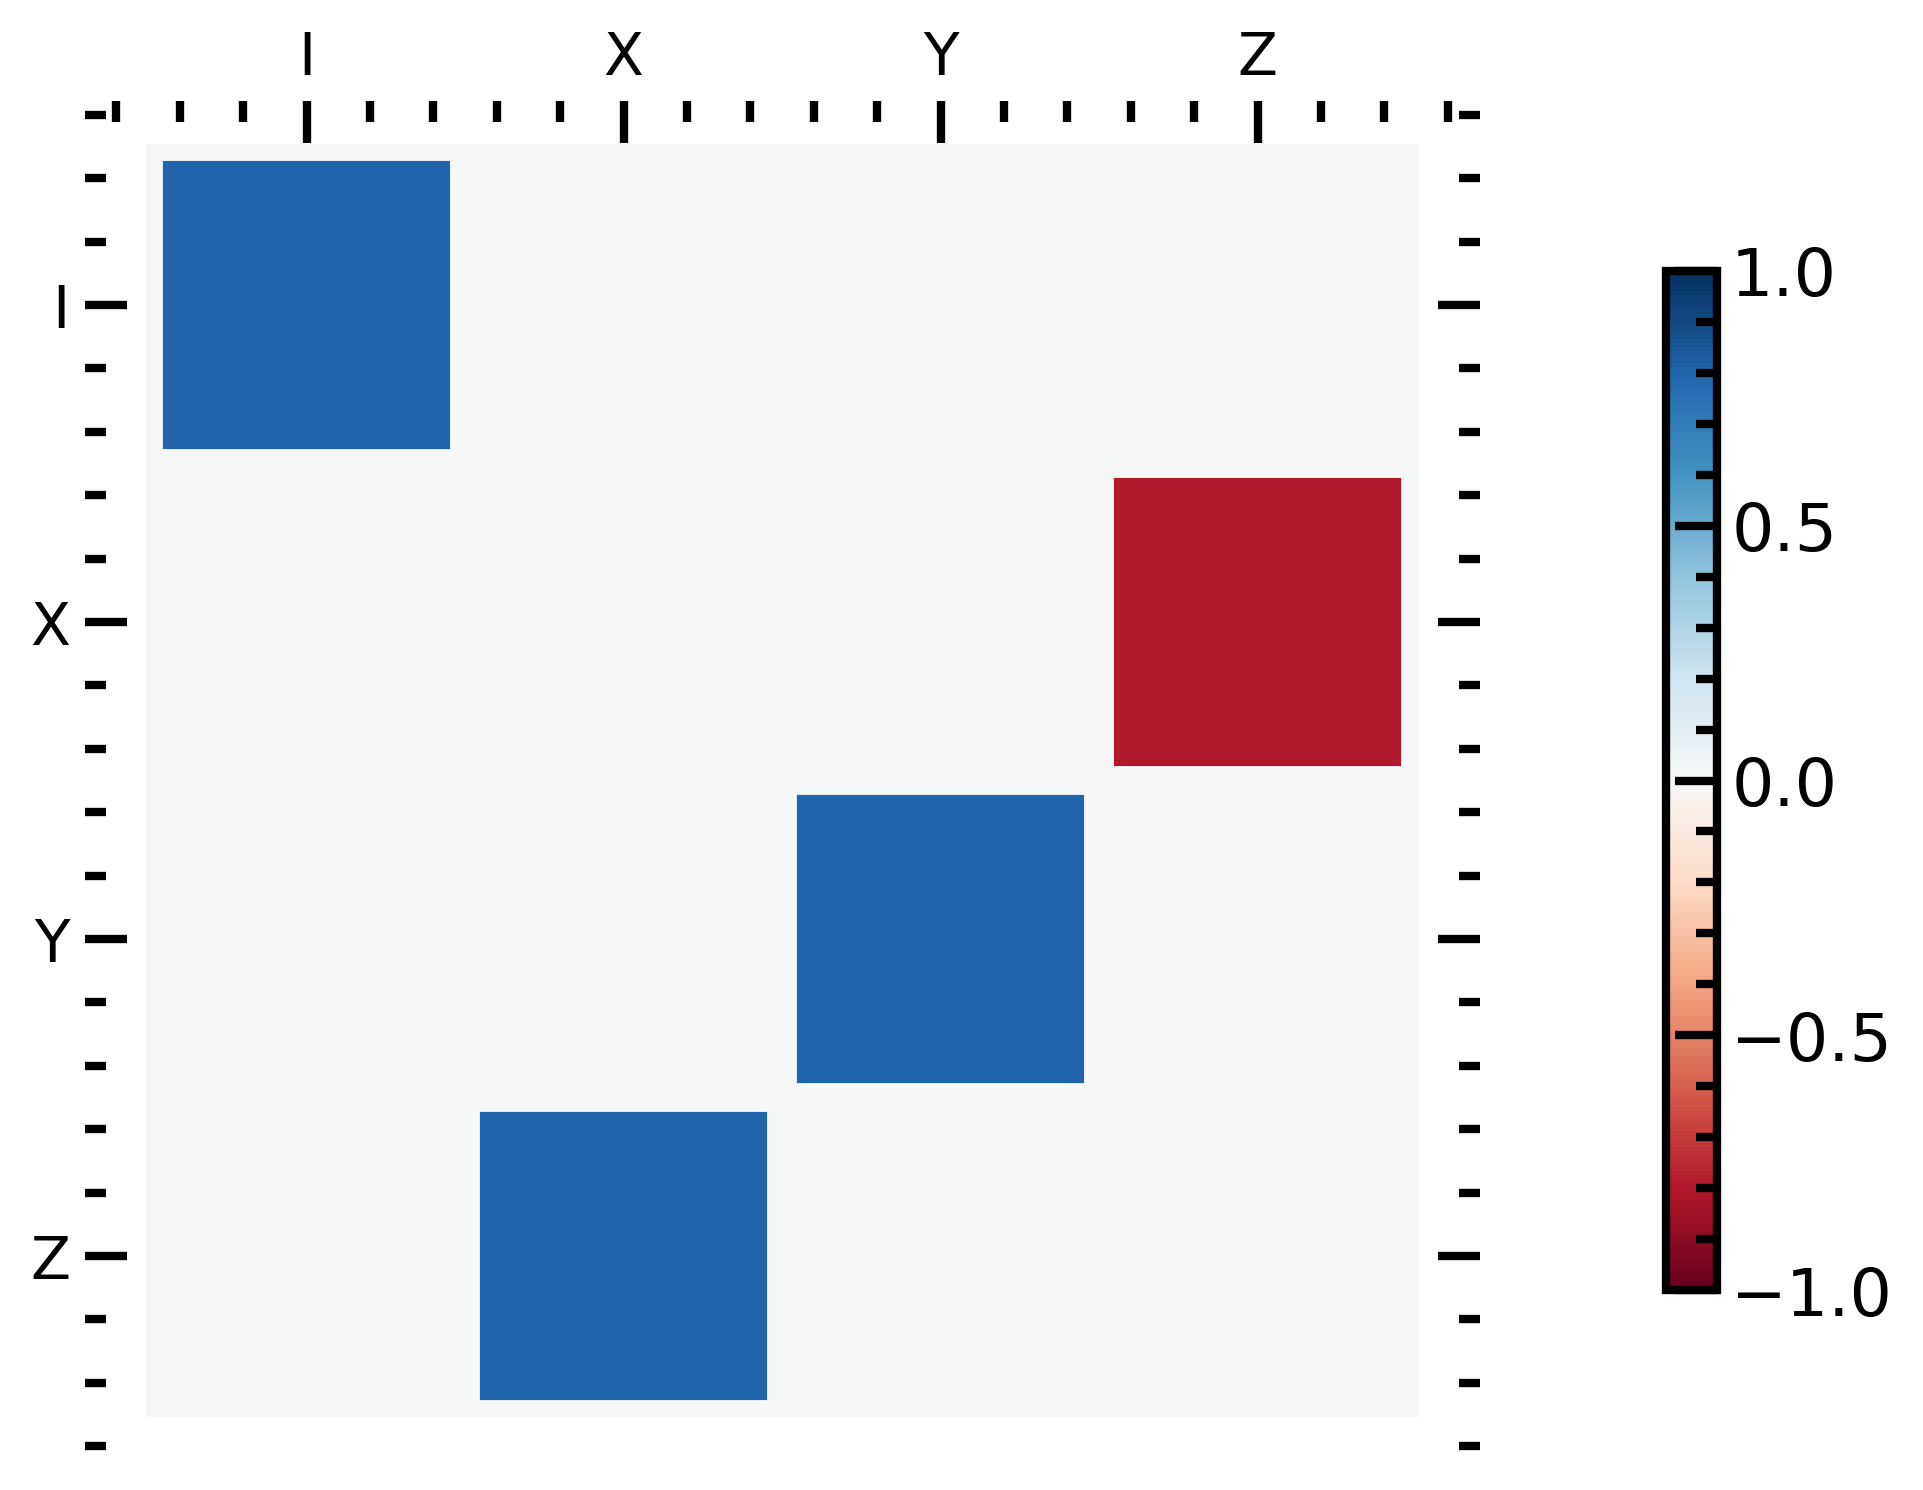

In [42]:
#Look at ideal case
I = qeye(2)
sx = sigmax()
sy = sigmay()
sz = sigmaz()
sx2 = rx(np.pi/2)
sy2 = ry(np.pi/2)
p_in = np.zeros((4,4))
p_out = np.zeros((4,4))

gate = ry(np.pi/2)

prep_rotations = [I, sx, sx2, sy2]
meas_rotations = [I, sx, sy, sz]
for i, prep in enumerate(prep_rotations):
    for j, meas in enumerate(meas_rotations):
        p_in[i,j] = expect(meas, prep*basis(2,0))
        p_out[i,j] = expect(meas, gate*prep*basis(2,0))
        
ptm_ideal =  Qobj(np.linalg.lstsq(p_out, p_in)[0]     ) 
op_label = ["I","X","Y","Z"]
qutip.hinton(ptm_ideal, xlabels = op_label, ylabels = op_label)

<ipython-input-43-794abe3a281e>:14: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  U_2[2,2] = ry(np.pi/2).data[0,0]
<ipython-input-43-794abe3a281e>:15: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  U_2[2,3] = ry(np.pi/2).data[0,1]
<ipython-input-43-794abe3a281e>:16: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  U_2[3,2] = ry(np.pi/2).data[1,0]
<ipython-input-43-794abe3a281e>

(<Figure size 2400x1800 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe98f9a7280>)

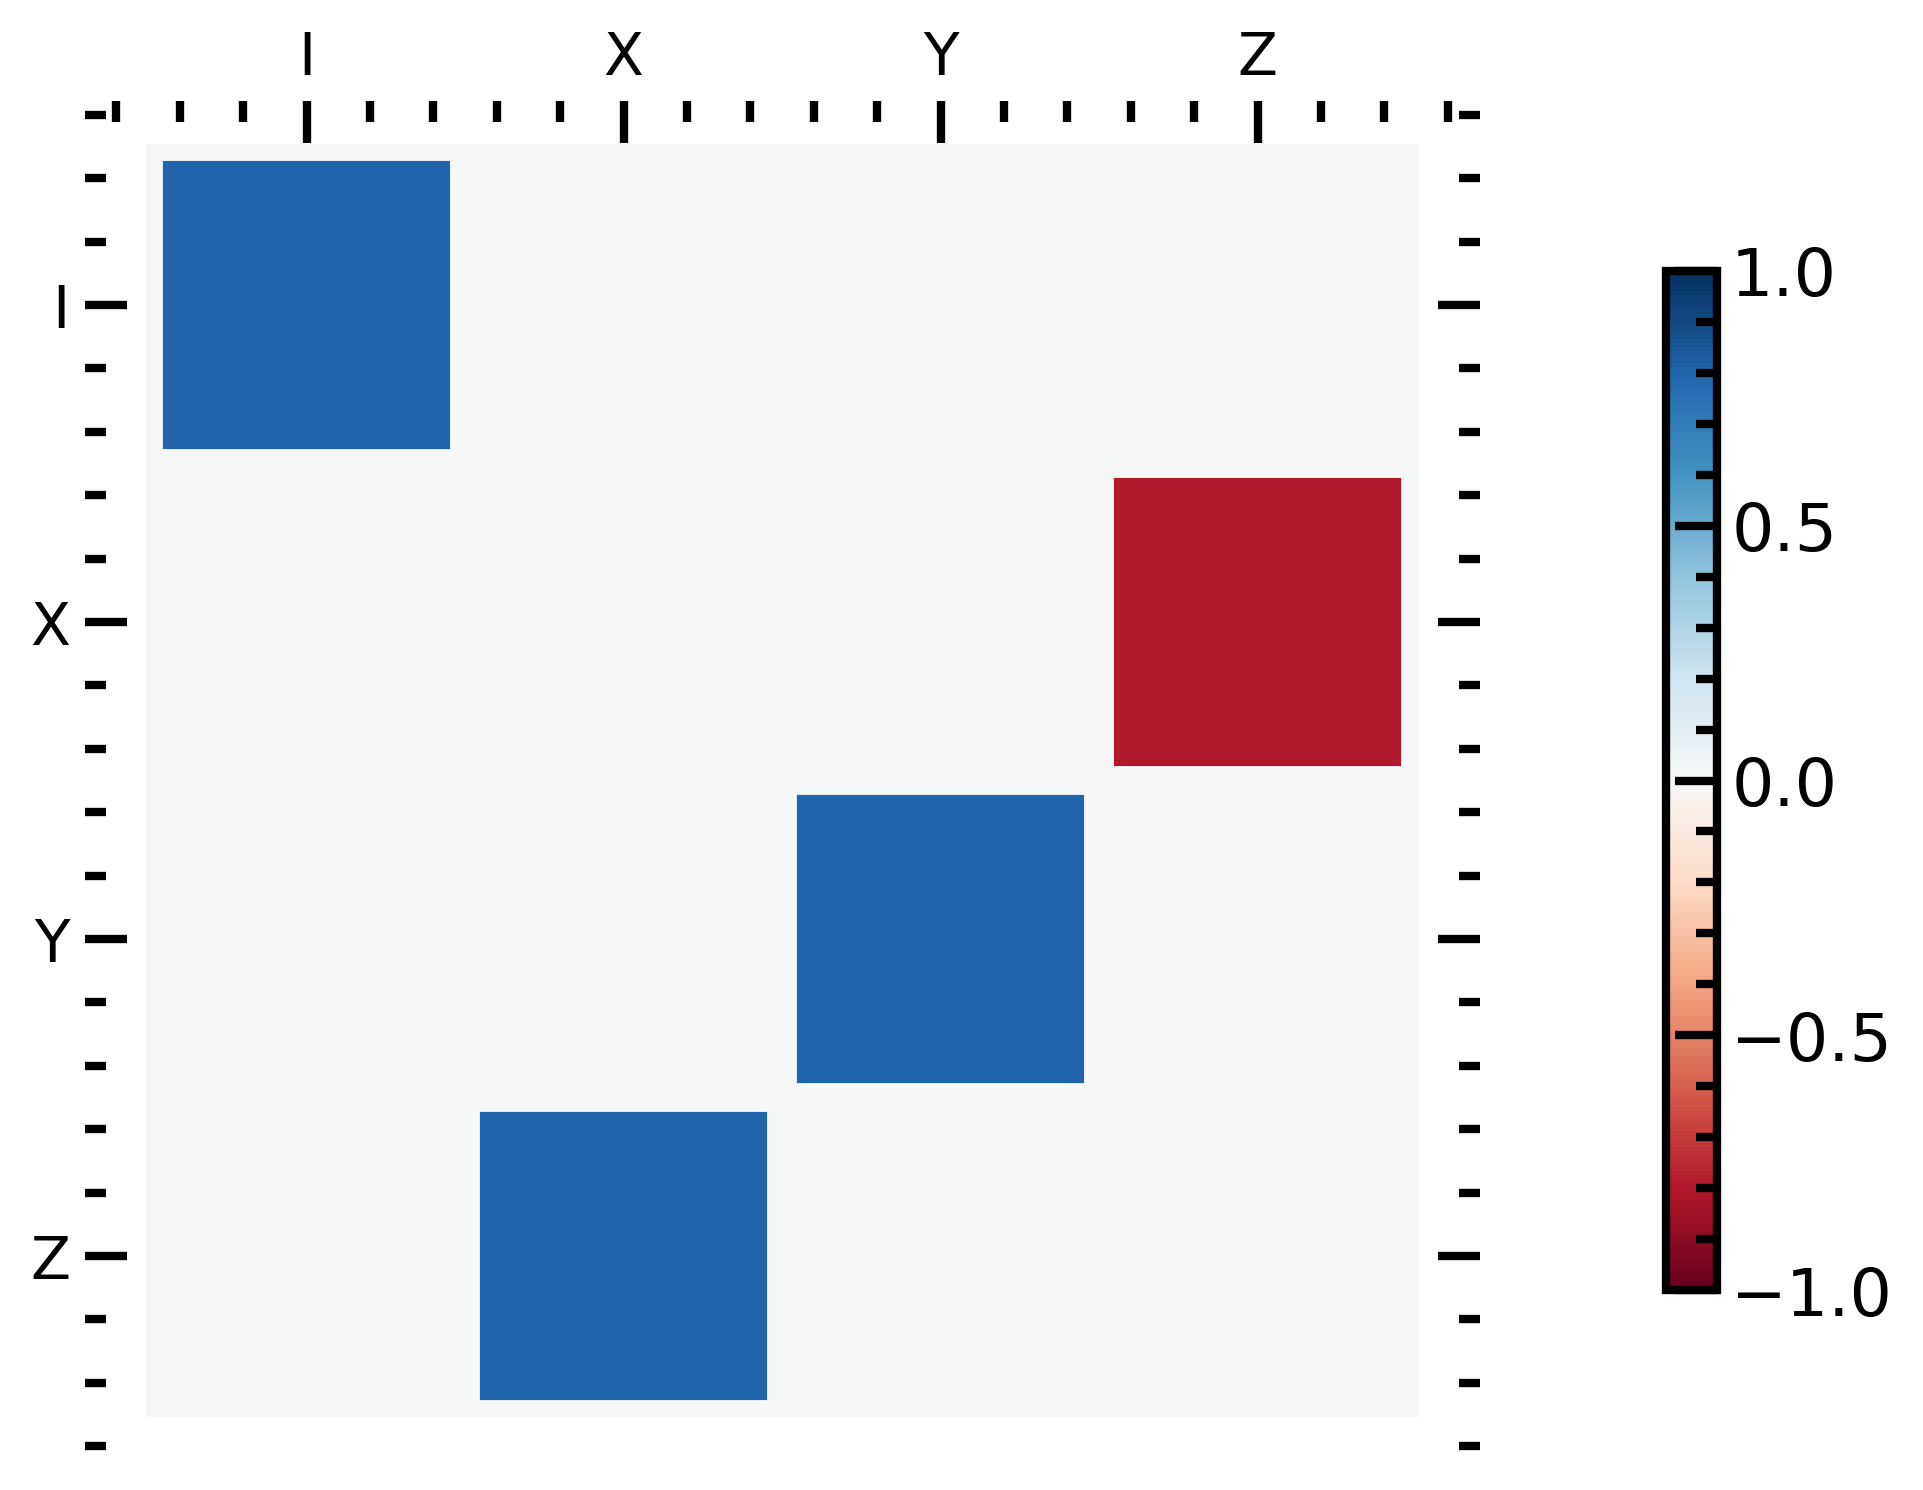

In [43]:
#Checking using unitary matrix of a multi-level qubit
prep_ops = [qeye(nlev_single), op.sx(phi=np.pi/2, N=nlev_single), op.sy(phi=-np.pi/2, N=nlev_single), op.sigx(N=nlev_single)]
meas_ops = [qeye(nlev_single), op.sigx(N=nlev_single), op.sigy(N=nlev_single), op.sigz(N=nlev_single)]
p_in = np.zeros((4,4), dtype = complex)
p_out = np.zeros((4,4), dtype = complex)

U_1 = np.diag(np.zeros(nlev_single, dtype = complex))
U_2 = np.diag(np.zeros(nlev_single, dtype = complex))
U_1[0,2] = -1j
U_1[2,0] = 1j
U_1[1,3] = -1j
U_1[3,1] = 1j
U_1 = Qobj(U_1)
U_2[2,2] = ry(np.pi/2).data[0,0]
U_2[2,3] = ry(np.pi/2).data[0,1]
U_2[3,2] = ry(np.pi/2).data[1,0]
U_2[3,3] = ry(np.pi/2).data[1,1]
U_2 = Qobj(U_2)

for i, prep in enumerate(prep_ops):
    psi_ini = prep*state_0
    psi_fin = U_1*U_2*U_1*psi_ini
    for j, meas in enumerate(meas_ops):
        p_in[i,j] = np.real(expect(meas, psi_ini))
        p_out[i,j] = np.real(expect(meas, psi_fin))
        
ptm_real =  Qobj(np.linalg.lstsq(p_out, p_in)[0])       
op_label = ["I","X","Y","Z"]
qutip.hinton(ptm_real, xlabels = op_label, ylabels = op_label)  

<ipython-input-44-46ff52ec5154>:18: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  ptm_real =  Qobj(np.linalg.lstsq(p_out, p_in)[0])


(<Figure size 2400x1800 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe98ec0f430>)

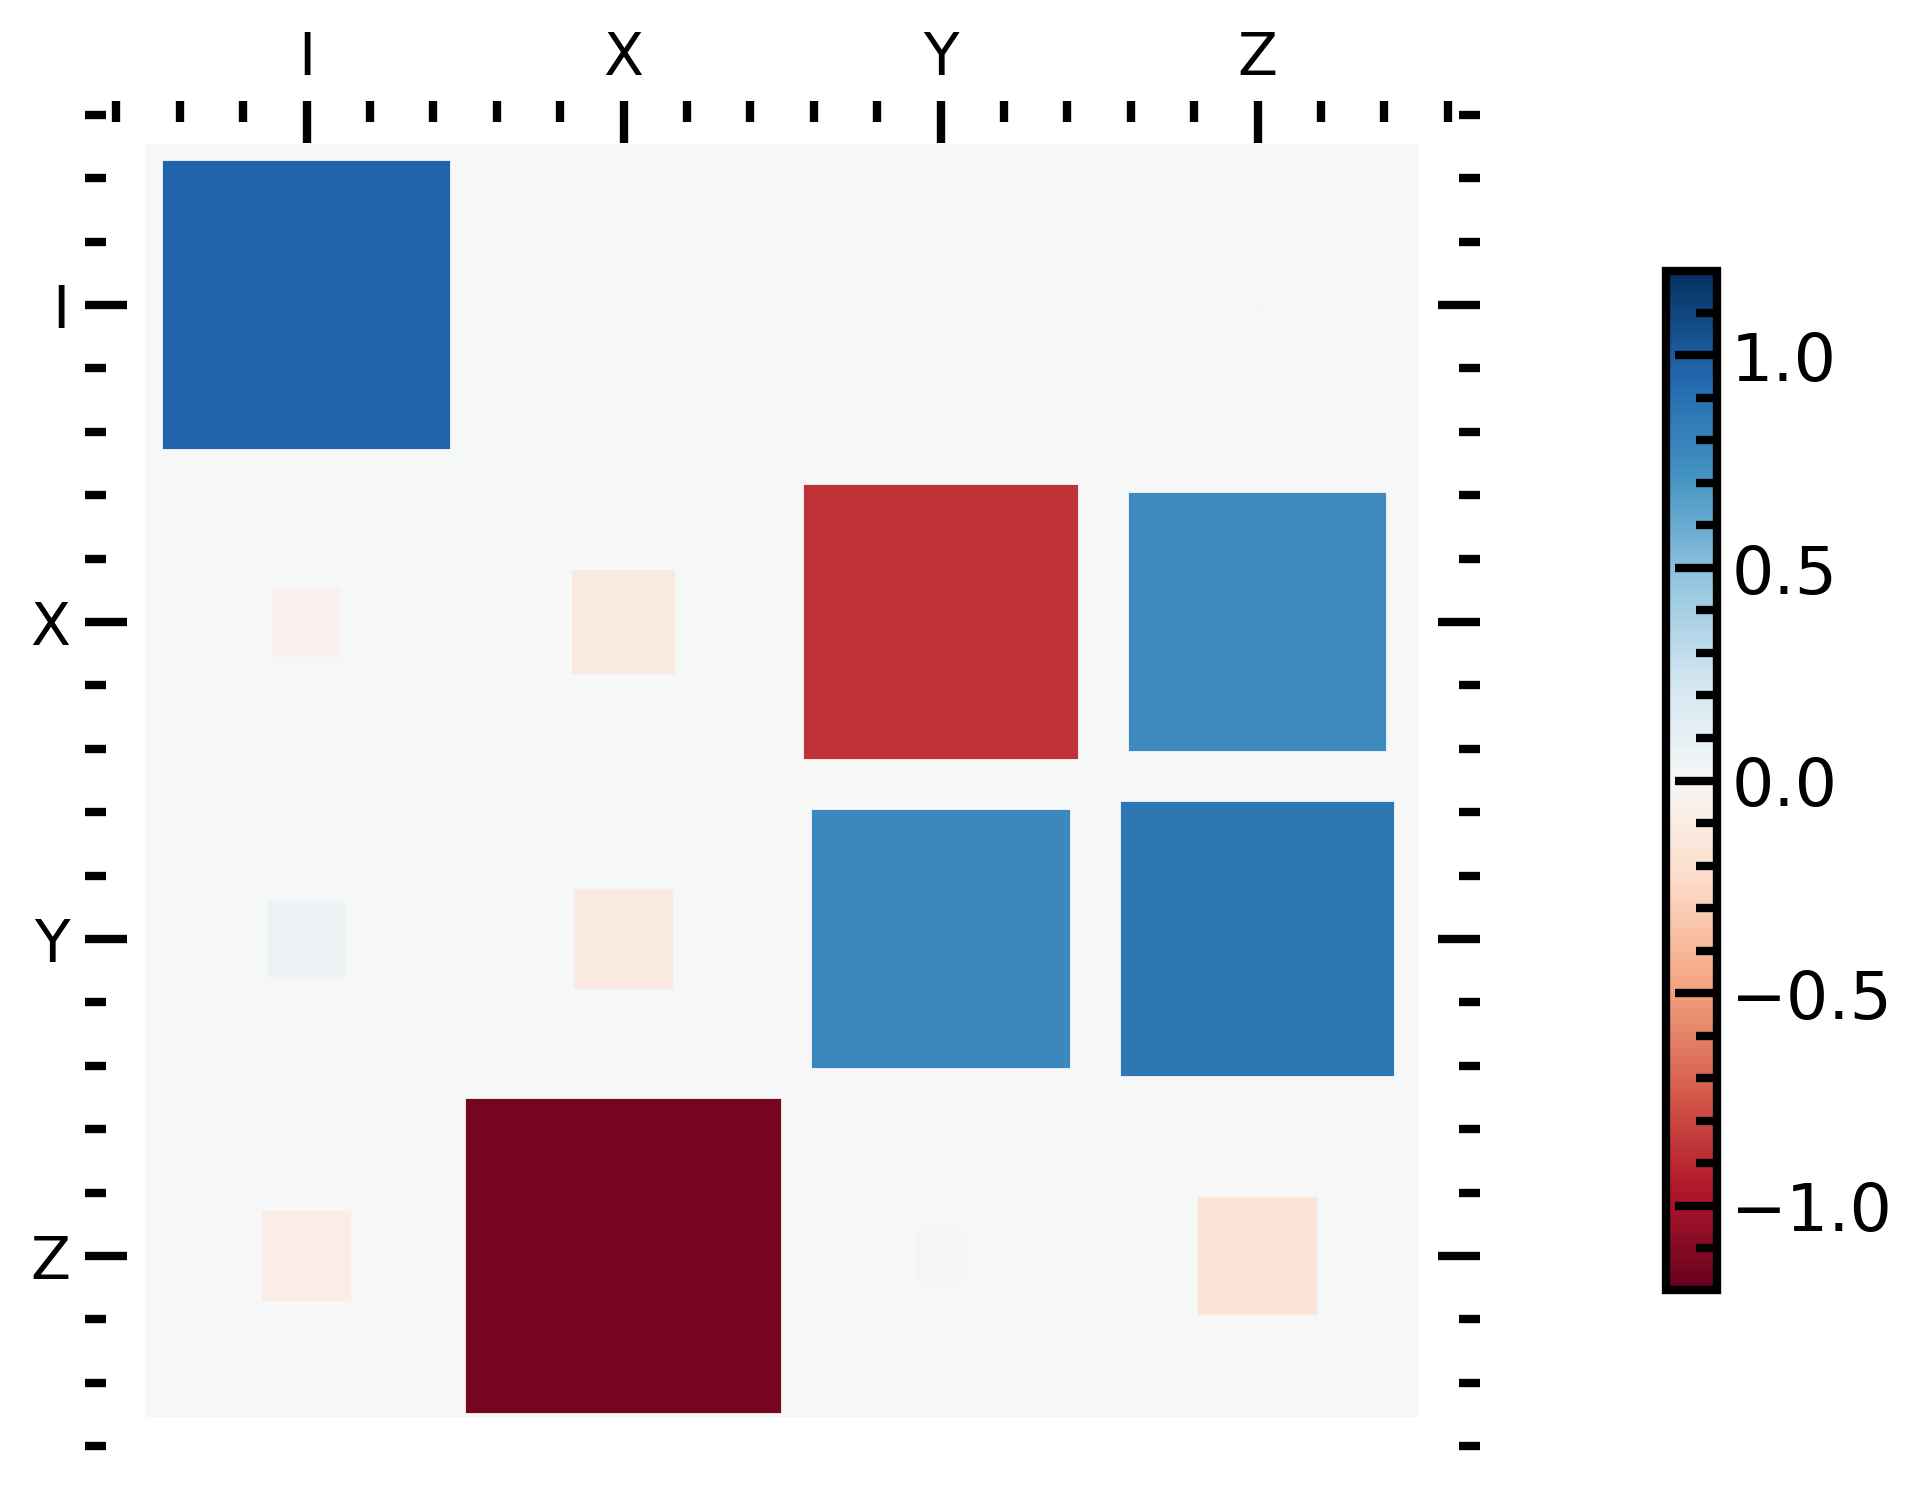

In [44]:
prep_ops = [qeye(nlev_single), op.sx(phi=np.pi/2, N=nlev_single), op.sy(phi=-np.pi/2, N=nlev_single), op.sigx(N=nlev_single)]
meas_ops = [qeye(nlev_single), op.sigx(N=nlev_single), op.sigy(N=nlev_single), op.sigz(N=nlev_single)]
p_in = np.zeros((4,4), dtype = complex)
p_out = np.zeros((4,4), dtype = complex)


for i, prep in enumerate(prep_ops):
    psi_ini = prep*state_0
    psi_fin = U_nothing[-1]*U02_t[-1]*psi_ini   
    psi_fin = U_nothing[-1]*U13_t[-1]*psi_fin
    psi_fin = U_nothing[-1]*U23_t[-1]*psi_fin
    psi_fin = U_nothing[-1]*U13_t[-1]*psi_fin
    psi_fin = U_nothing[-1]*U02_t[-1]*psi_fin
    for j, meas in enumerate(meas_ops):
        p_in[i,j] = np.real(expect(meas, psi_ini))
        p_out[i,j] = np.real(expect(meas, psi_fin))
        
ptm_real =  Qobj(np.linalg.lstsq(p_out, p_in)[0])       
op_label = ["I","X","Y","Z"]
qutip.hinton(ptm_real, xlabels = op_label, ylabels = op_label)       

# Applying two drives at the same time

-22.270865380811568


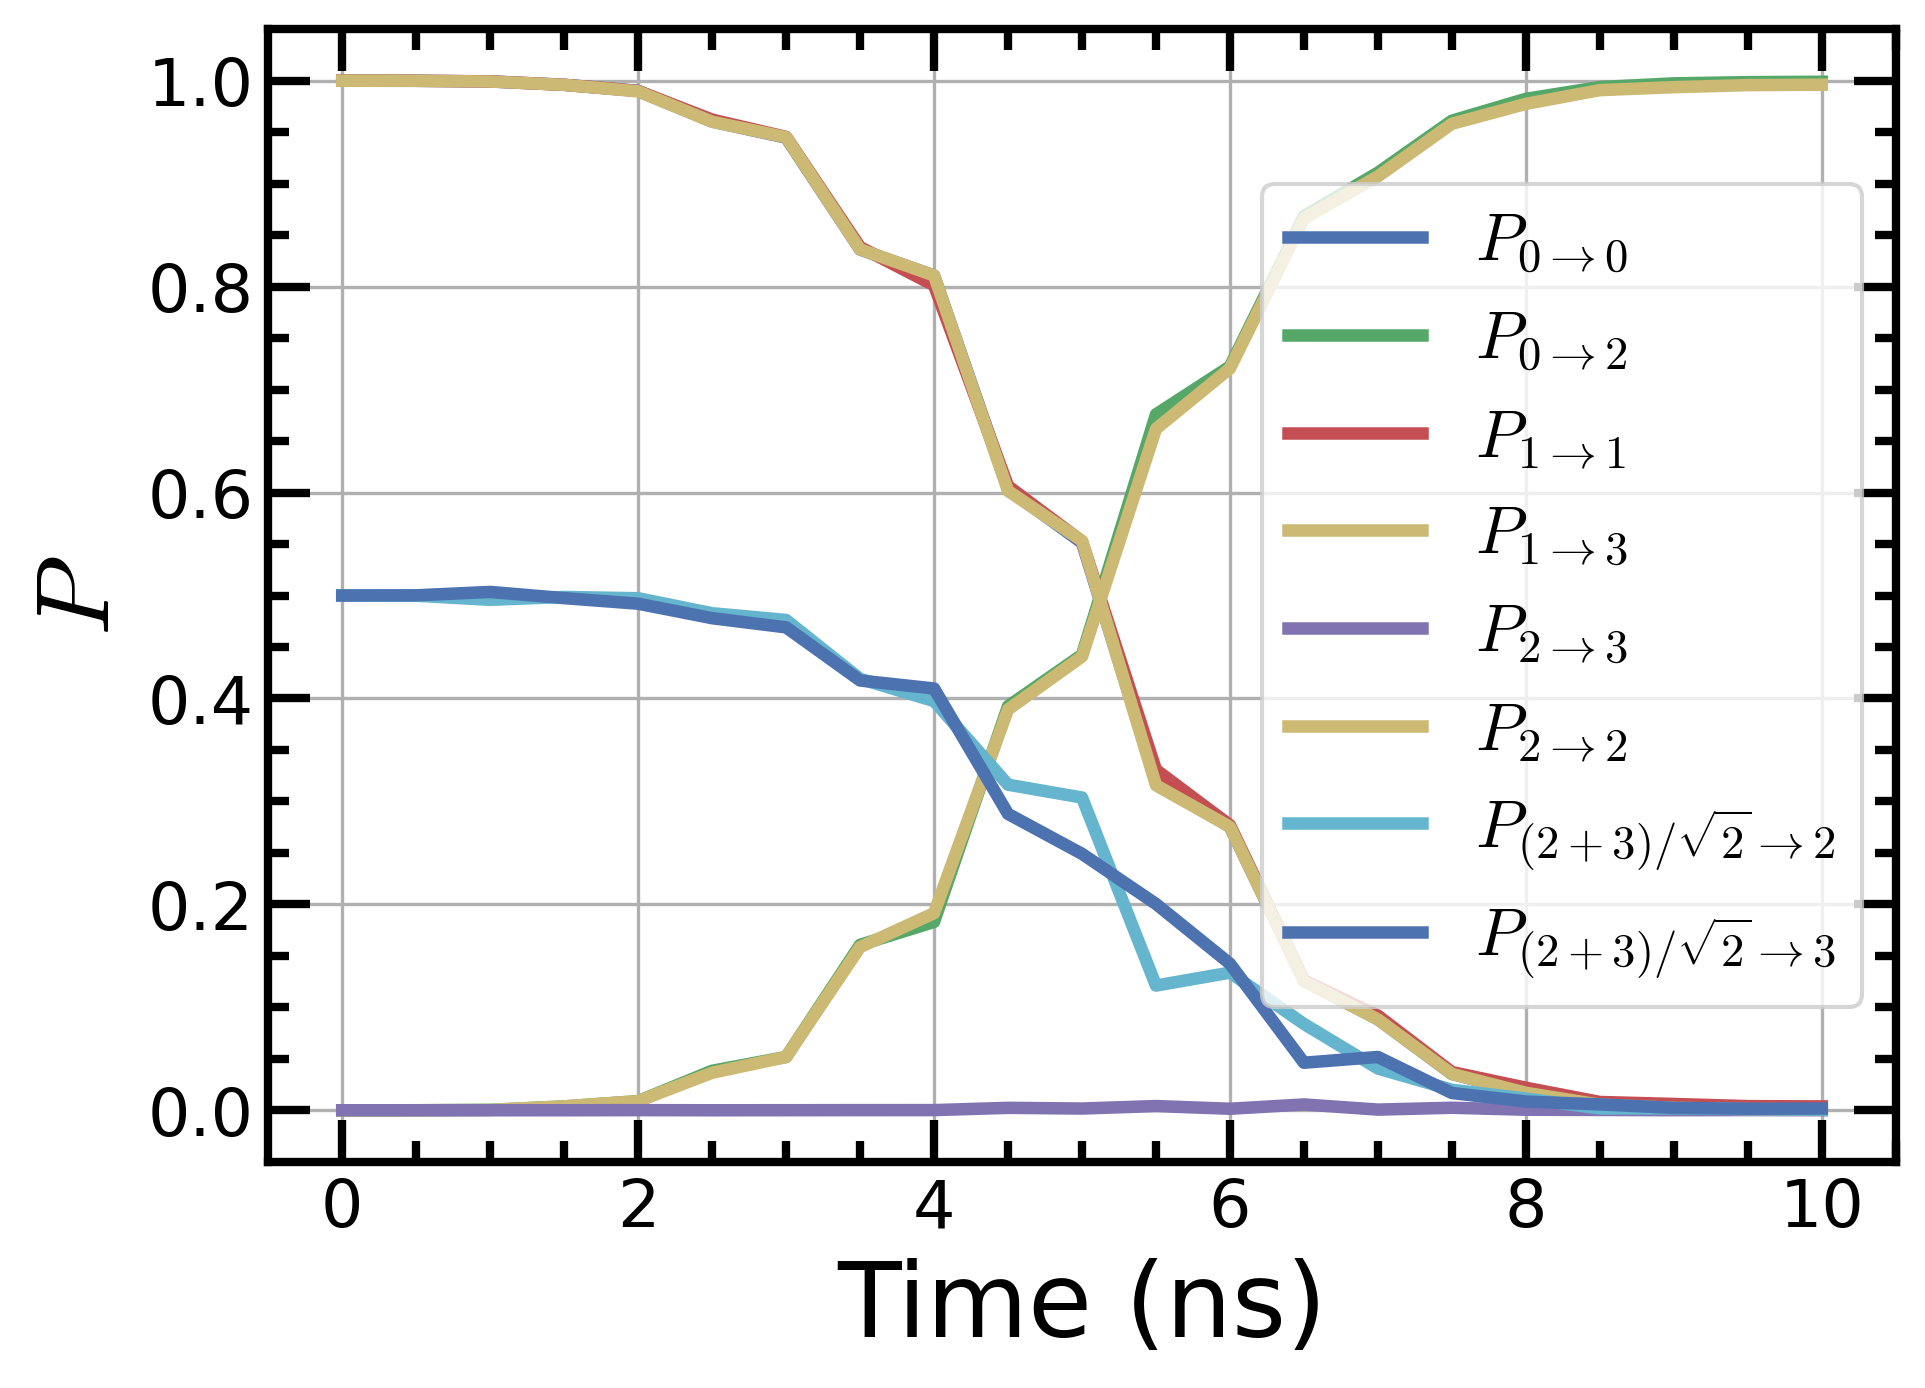

In [45]:
#Gate parameter
T_gate = 10 #ns
t_points = np.linspace(0, T_gate, 2 * int(T_gate) + 1)
drive_amplitude_factor = 0.5
delta_omega_d1 = 0
delta_omega_d2 = 0
shape = 'gauss'
sigma = 0.25
drag = True
drag_coeff = -0.0034568125403369636
drag_coeff_ratio =  -0.07799284736326904 / 0.0035020124287791334
print(-0.07799284736326904 / 0.0035020124287791334)

ini_state1 = 0
fin_state1 = 2
omega_d_1 = qubit.freq(ini_state1,fin_state1) + delta_omega_d1
matr_el_1 = np.abs(qubit.n_ij(ini_state1,fin_state1))

ini_state2 = 1
fin_state2 = 3
omega_d_2 = qubit.freq(ini_state2,fin_state2) + delta_omega_d2
matr_el_2 = np.abs(qubit.n_ij(ini_state2,fin_state2))

epsilon = drive_amplitude_factor/matr_el_1
drive_ratio = matr_el_1/matr_el_2

H_drive = epsilon*(qubit.n())
H_dummy = 0*(qubit.n())
U_t = gates_double.evolution_operator_microwave(
                qubit.H(), H_drive, t_points=t_points, drive_ratio=drive_ratio, DRAG = drag, DRAG_coefficient = drag_coeff,
                T_gate=T_gate, shape=shape, sigma=sigma, omega_d_1=omega_d_1,omega_d_2=omega_d_2,drag_coeff_ratio = drag_coeff_ratio)
U_nothing = gates_double.evolution_operator_microwave(
                -qubit.H(), H_dummy, t_points=t_points, drive_ratio=drive_ratio, DRAG = drag, DRAG_coefficient = drag_coeff,
                T_gate=T_gate, shape=shape, sigma=sigma, omega_d_1=omega_d_1,omega_d_2=omega_d_2,drag_coeff_ratio = drag_coeff_ratio)

trans_prob_00 = gates.prob_transition(U_t, state_0, state_0)
trans_prob_02 = gates.prob_transition(U_t, state_0, state_2)
trans_prob_11 = gates.prob_transition(U_t, state_1, state_1)
trans_prob_13 = gates.prob_transition(U_t, state_1, state_3)
trans_prob_22 = gates.prob_transition(U_t, state_2, state_2)
trans_prob_23 = gates.prob_transition(U_t, state_2, state_3)
trans_prob_sup02to0 = gates.prob_transition(U_t, state_sup02, state_0)
trans_prob_sup13to1 = gates.prob_transition(U_t, state_sup13, state_1)
trans_prob_sup23to2 = gates.prob_transition(U_t, state_sup23, state_2)
trans_prob_sup23to3 = gates.prob_transition(U_t, state_sup23, state_3)

plt.figure(figsize = [7,5])
plt.plot(t_points, trans_prob_00, label=r'$P_{0\rightarrow 0}$')
plt.plot(t_points, trans_prob_02, label=r'$P_{0\rightarrow 2}$')
plt.plot(t_points, trans_prob_11, label=r'$P_{1\rightarrow 1}$')
plt.plot(t_points, trans_prob_13, color = 'C4', label=r'$P_{1\rightarrow 3}$')
plt.plot(t_points, trans_prob_23, label=r'$P_{2\rightarrow 3}$')
plt.plot(t_points, trans_prob_22, label=r'$P_{2\rightarrow 2}$')
plt.plot(t_points, trans_prob_sup23to2, label=r'$P_{(2+3)/\sqrt{2}\rightarrow 2}$')
plt.plot(t_points, trans_prob_sup23to3, label=r'$P_{(2+3)/\sqrt{2}\rightarrow 3}$')
plt.xlabel('Time (ns)')
plt.ylabel(r'$P$')
plt.legend()
plt.grid()

In [46]:
def infidelity_02(drag_coeff):
    U_t = gates_double.evolution_operator_microwave(
                qubit.H(), H_drive, t_points=t_points, drive_ratio=drive_ratio, DRAG = drag, DRAG_coefficient = drag_coeff,
                T_gate=T_gate, shape=shape, sigma=sigma, omega_d_1=omega_d_1,omega_d_2=omega_d_2,drag_coeff_ratio = drag_coeff_ratio)
    U_f = U_nothing[-1]*U_t[-1]
    U_real = np.diag(np.zeros(2, dtype = complex))
    U_real[0,0] = U_f[0,0]
    U_real[0,1] = U_f[0,2]
    U_real[1,0] = U_f[2,0]
    U_real[1,1] = U_f[2,2]
    U_real = Qobj(U_real)

    op1 = U_real.dag() * U_real
    op2 = U_real * U_ideal.dag()
    fidel = (op1.tr() + (abs(op2.tr())) ** 2) / 6.0
    return abs(1 - fidel)

def infidelity_13(drag_coeff, drag_coeff_ratio):
    U_t = gates_double.evolution_operator_microwave(
                qubit.H(), H_drive, t_points=t_points, drive_ratio=drive_ratio, DRAG = drag, DRAG_coefficient = drag_coeff,
                T_gate=T_gate, shape=shape, sigma=sigma, omega_d_1=omega_d_1,omega_d_2=omega_d_2,drag_coeff_ratio = drag_coeff_ratio)
    U_f = U_nothing[-1]*U_t[-1]
    U_real = np.diag(np.zeros(2, dtype = complex))
    U_real[0,0] = U_f[1,1]
    U_real[0,1] = U_f[1,3]
    U_real[1,0] = U_f[3,1]
    U_real[1,1] = U_f[3,3]
    U_real = Qobj(U_real)

    op1 = U_real.dag() * U_real
    op2 = U_real * U_ideal.dag()
    fidel = (op1.tr() + (abs(op2.tr())) ** 2) / 6.0
    return abs(1 - fidel)

print (infidelity_02(0))
print (infidelity_13(0,1))
print (infidelity_02(-0.0034568125403369636))
print (infidelity_13(-0.0034568125403369636, -23))

0.32197053447010093
0.32606335271011355
0.32204121234430083
0.3244460922457426


In [47]:
## It appears that individual tuning of the gates do not give the best results. 
#So now, we tune them both at the same time.

U_ideal = sigmay()
def leakage_0213(x):
    drive_ratio = x[0]
    drag_coeff = x[1]
    delta_omega_d1 = x[2]
    delta_omega_d2 = x[3]
    drag_coeff_ratio = x[4]
    omega_d_1 = qubit.freq(ini_state1,fin_state1) + delta_omega_d1
    omega_d_2 = qubit.freq(ini_state2,fin_state2) + delta_omega_d2
    U_t = gates_double.evolution_operator_microwave(
                qubit.H(), H_drive, t_points=t_points, drive_ratio=drive_ratio, DRAG = drag, DRAG_coefficient = drag_coeff,
                T_gate=T_gate, shape=shape, sigma=sigma, omega_d_1=omega_d_1,omega_d_2=omega_d_2,drag_coeff_ratio = drag_coeff_ratio)
    trans_prob_02 = gates.prob_transition(U_t, state_0, state_2)
    trans_prob_13 = gates.prob_transition(U_t, state_1, state_3)
    return 2 - trans_prob_02[-1] - trans_prob_13[-1]

def infidelity_0213(x):
    drag_coeff = x[0]
    delta_omega_d1 = x[1]
    delta_omega_d2 = x[2]
    drag_coeff_ratio = x[3]
    omega_d_1 = qubit.freq(ini_state1,fin_state1) + delta_omega_d1
    omega_d_2 = qubit.freq(ini_state2,fin_state2) + delta_omega_d2
    U_t = gates_double.evolution_operator_microwave(
                qubit.H(), H_drive, t_points=t_points, drive_ratio=drive_ratio, DRAG = drag, DRAG_coefficient = drag_coeff,
                T_gate=T_gate, shape=shape, sigma=sigma, omega_d_1=omega_d_1,omega_d_2=omega_d_2,drag_coeff_ratio = drag_coeff_ratio)
    U_f = U_nothing[-1]*U_t[-1]
    U_real_02 = np.diag(np.zeros(2, dtype = complex))
    U_real_13 = np.diag(np.zeros(2, dtype = complex))
    U_real_02[0,0] = U_f[0,0]
    U_real_02[0,1] = U_f[0,2]
    U_real_02[1,0] = U_f[2,0]
    U_real_02[1,1] = U_f[2,2]
    U_real_02 = Qobj(U_real_02)
    U_real_13[0,0] = U_f[1,1]
    U_real_13[0,1] = U_f[1,3]
    U_real_13[1,0] = U_f[3,1]
    U_real_13[1,1] = U_f[3,3]
    U_real_13 = Qobj(U_real_13)

    op1_02 = U_real_02.dag() * U_real_02
    op2_02 = U_real_02 * U_ideal.dag()
    fidel_02 = (op1_02.tr() + (abs(op2_02.tr())) ** 2) / 6.0
    op1_13 = U_real_13.dag() * U_real_13
    op2_13 = U_real_13 * U_ideal.dag()
    fidel_13 = (op1_13.tr() + (abs(op2_13.tr())) ** 2) / 6.0

    return abs(1 - fidel_02*fidel_13)

opt0213 = minimize(infidelity_0213, x0 = [0,0,0,-20], method ='Powell', tol = 1e-6)
print (opt0213.fun)
print (opt0213.x)

0.0005304743098955012
[-5.16071264e-02  1.13019024e-06 -2.19682305e-05 -3.93361902e+00]


0.0002912153439567078
0.0002393286621389379


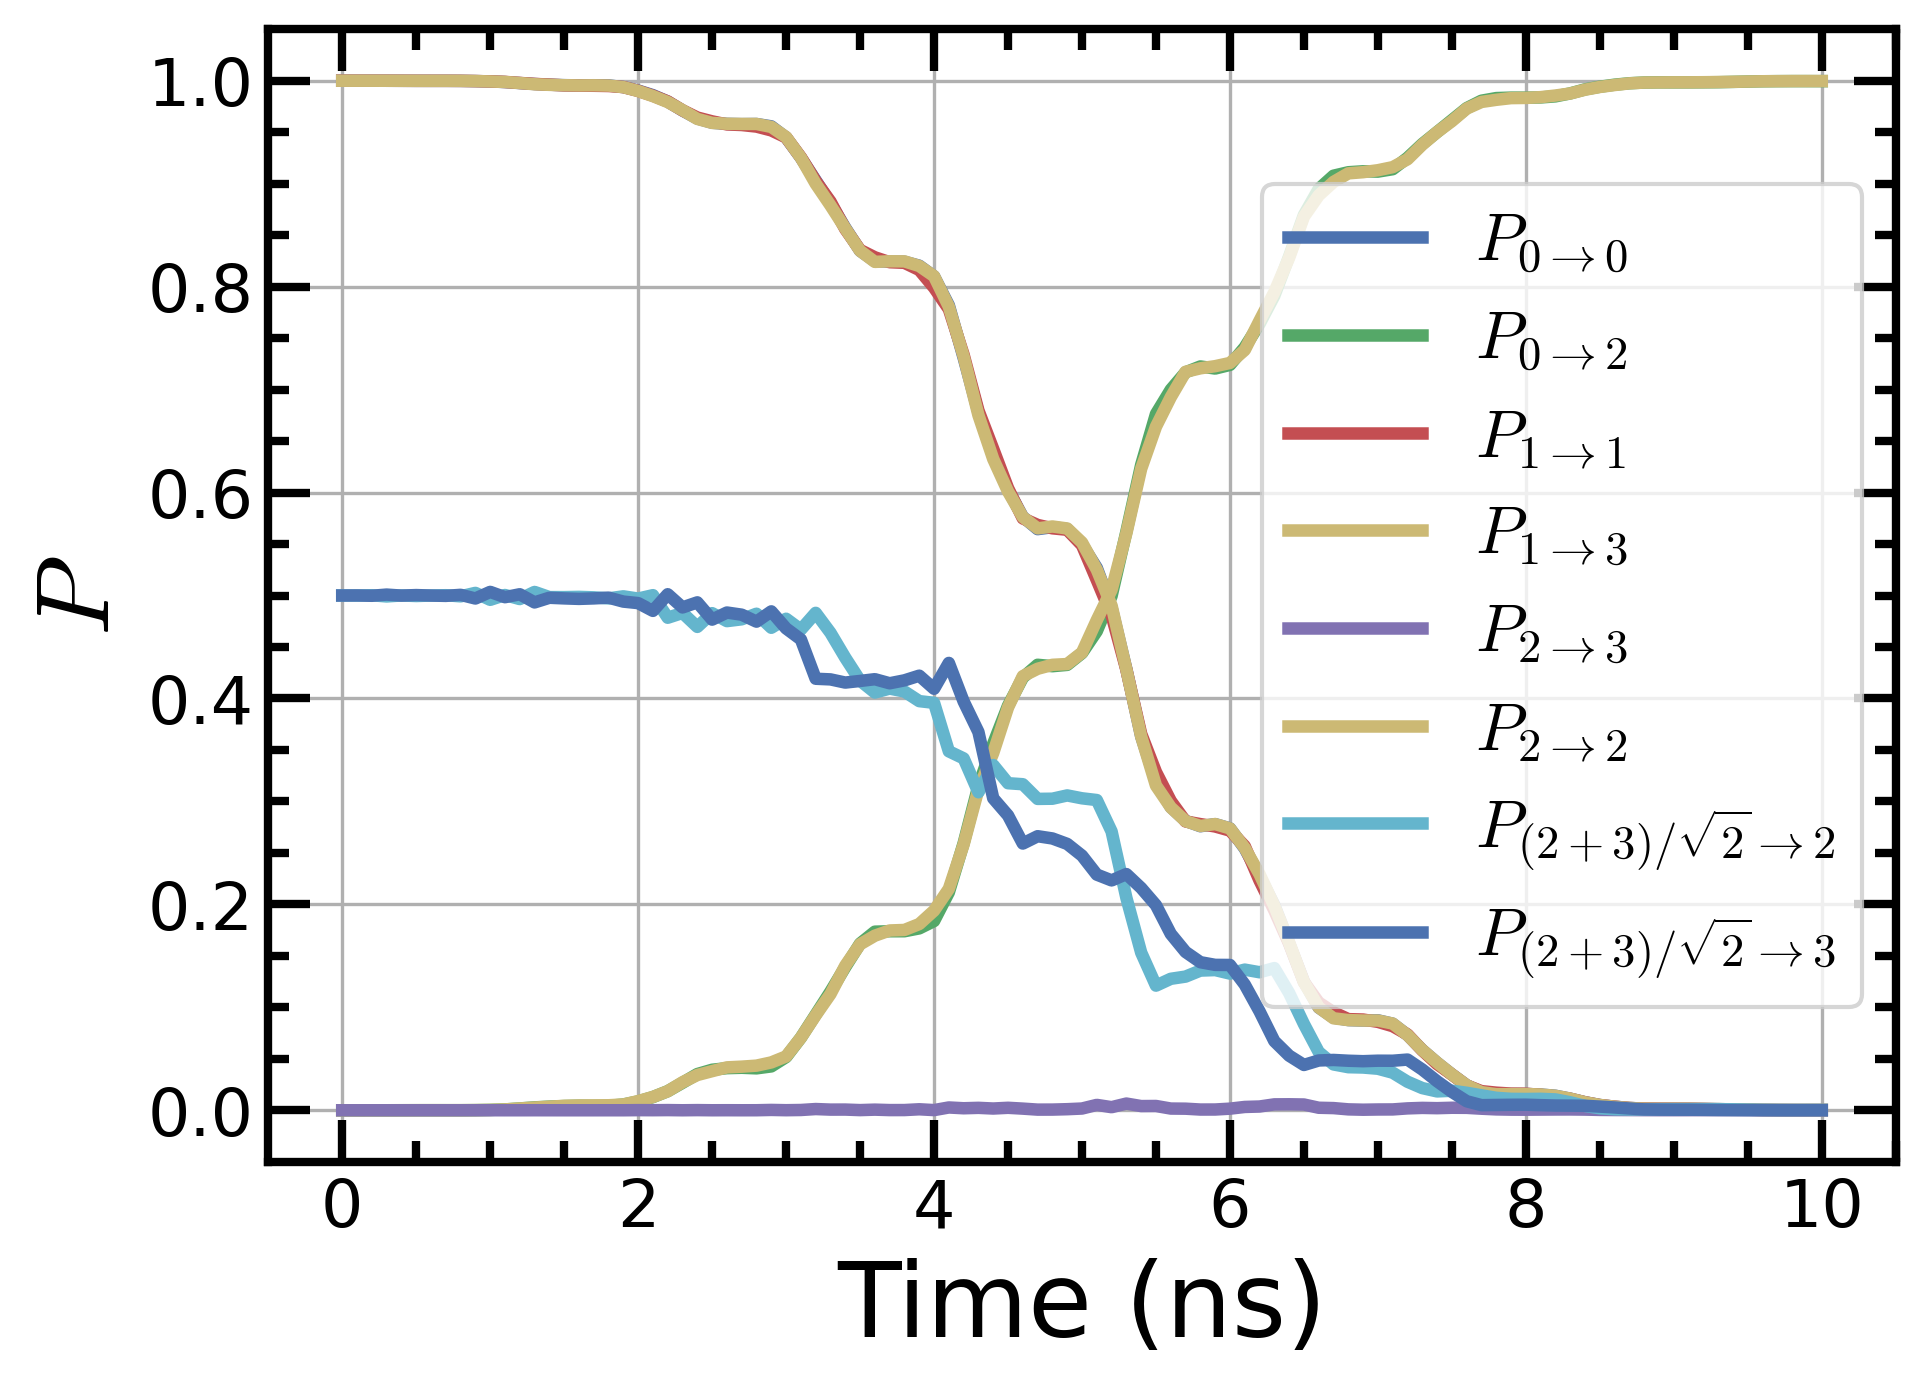

In [48]:
T_gate = 10 #ns
t_points = np.linspace(0, T_gate, 10 * int(T_gate) + 1)
drive_amplitude_factor_02 = 0.5
drag_coeff_02,delta_omega_d1,delta_omega_d2,drag_coeff_ratio = opt0213.x

shape = 'gauss'
sigma = 0.25
drag = True

ini_state1 = 0
fin_state1 = 2
omega_d_1 = qubit.freq(ini_state1,fin_state1) + delta_omega_d1
matr_el_1 = np.abs(qubit.n_ij(ini_state1,fin_state1))

ini_state2 = 1
fin_state2 = 3
omega_d_2 = qubit.freq(ini_state2,fin_state2) + delta_omega_d2
matr_el_2 = np.abs(qubit.n_ij(ini_state2,fin_state2))
epsilon = drive_amplitude_factor_02/matr_el_1

H_drive = epsilon*(qubit.n())
H_dummy = 0*(qubit.n())
U_t = gates_double.evolution_operator_microwave(
                qubit.H(), H_drive, t_points=t_points, drive_ratio=drive_ratio, DRAG = drag, DRAG_coefficient = drag_coeff_02,
                T_gate=T_gate, shape=shape, sigma=sigma, omega_d_1=omega_d_1,omega_d_2=omega_d_2,drag_coeff_ratio = drag_coeff_ratio)

U_f = U_nothing[-1]*U_t[-1]
U_real_02 = np.diag(np.zeros(2, dtype = complex))
U_real_13 = np.diag(np.zeros(2, dtype = complex))
U_real_02[0,0] = U_f[0,0]
U_real_02[0,1] = U_f[0,2]
U_real_02[1,0] = U_f[2,0]
U_real_02[1,1] = U_f[2,2]
U_real_02 = Qobj(U_real_02)
U_real_13[0,0] = U_f[1,1]
U_real_13[0,1] = U_f[1,3]
U_real_13[1,0] = U_f[3,1]
U_real_13[1,1] = U_f[3,3]
U_real_13 = Qobj(U_real_13)

op1_02 = U_real_02.dag() * U_real_02
op2_02 = U_real_02 * U_ideal.dag()
fidel_02 = (op1_02.tr() + (abs(op2_02.tr())) ** 2) / 6.0
op1_13 = U_real_13.dag() * U_real_13
op2_13 = U_real_13 * U_ideal.dag()
fidel_13 = (op1_13.tr() + (abs(op2_13.tr())) ** 2) / 6.0

print (1-fidel_02)
print (1-fidel_13)

trans_prob_00 = gates.prob_transition(U_t, state_0, state_0)
trans_prob_02 = gates.prob_transition(U_t, state_0, state_2)
trans_prob_11 = gates.prob_transition(U_t, state_1, state_1)
trans_prob_13 = gates.prob_transition(U_t, state_1, state_3)
trans_prob_22 = gates.prob_transition(U_t, state_2, state_2)
trans_prob_23 = gates.prob_transition(U_t, state_2, state_3)
trans_prob_sup02to0 = gates.prob_transition(U_t, state_sup02, state_0)
trans_prob_sup13to1 = gates.prob_transition(U_t, state_sup13, state_1)
trans_prob_sup23to2 = gates.prob_transition(U_t, state_sup23, state_2)
trans_prob_sup23to3 = gates.prob_transition(U_t, state_sup23, state_3)

plt.figure(figsize = [7,5])
plt.plot(t_points, trans_prob_00, label=r'$P_{0\rightarrow 0}$')
plt.plot(t_points, trans_prob_02, label=r'$P_{0\rightarrow 2}$')
plt.plot(t_points, trans_prob_11, label=r'$P_{1\rightarrow 1}$')
plt.plot(t_points, trans_prob_13, color = 'C4', label=r'$P_{1\rightarrow 3}$')
plt.plot(t_points, trans_prob_23, label=r'$P_{2\rightarrow 3}$')
plt.plot(t_points, trans_prob_22, label=r'$P_{2\rightarrow 2}$')
plt.plot(t_points, trans_prob_sup23to2, label=r'$P_{(2+3)/\sqrt{2}\rightarrow 2}$')
plt.plot(t_points, trans_prob_sup23to3, label=r'$P_{(2+3)/\sqrt{2}\rightarrow 3}$')
plt.xlabel('Time (ns)')
plt.ylabel(r'$P$')
plt.legend()
plt.grid()

In [49]:
T_gate_array = np.linspace(5,50,10)
error_array = np.zeros_like(T_gate_array)
for idx, T_gate in enumerate(T_gate_array):
    t_points = np.linspace(0, T_gate, 2 * int(T_gate) + 1)
    
    def infidelity_0213(x):
    drive_ratio = x[0]
    drag_coeff = x[1]
    delta_omega_d1 = x[2]
    delta_omega_d2 = x[3]
    drag_coeff_ratio = x[4]
    omega_d_1 = qubit.freq(ini_state1,fin_state1) + delta_omega_d1
    omega_d_2 = qubit.freq(ini_state2,fin_state2) + delta_omega_d2
    U_t = gates_double.evolution_operator_microwave(
                qubit.H(), H_drive, t_points=t_points, drive_ratio=drive_ratio, DRAG = drag, DRAG_coefficient = drag_coeff,
                T_gate=T_gate, shape=shape, sigma=sigma, omega_d_1=omega_d_1,omega_d_2=omega_d_2,drag_coeff_ratio = drag_coeff_ratio)
    U_f = U_nothing[-1]*U_t[-1]
    U_real_02 = np.diag(np.zeros(2, dtype = complex))
    U_real_13 = np.diag(np.zeros(2, dtype = complex))
    U_real_02[0,0] = U_f[0,0]
    U_real_02[0,1] = U_f[0,2]
    U_real_02[1,0] = U_f[2,0]
    U_real_02[1,1] = U_f[2,2]
    U_real_02 = Qobj(U_real_02)
    U_real_13[0,0] = U_f[1,1]
    U_real_13[0,1] = U_f[1,3]
    U_real_13[1,0] = U_f[3,1]
    U_real_13[1,1] = U_f[3,3]
    U_real_13 = Qobj(U_real_13)

    op1 = U_real_02.dag() * U_real_02
    op2 = U_real_02 * U_ideal.dag()
    fidel_02 = (op1.tr() + (abs(op2.tr())) ** 2) / 6.0
    op1 = U_real_13.dag() * U_real_13
    op2 = U_real_13 * U_ideal.dag()
    fidel_13 = (op1.tr() + (abs(op2.tr())) ** 2) / 6.0

    return abs(1 - fidel_02*fidel_13)

    opt0213 = minimize(infidelity_0213, x0 = [matr_el_1/matr_el_2,0,0,0,1], method ='Powell', tol = 1e-8)
    error_array[idx] = opt0213.fun

IndentationError: expected an indented block (<ipython-input-49-0b6955fccf59>, line 7)

## Combined, use state vectors

(-0.1, 1.1)

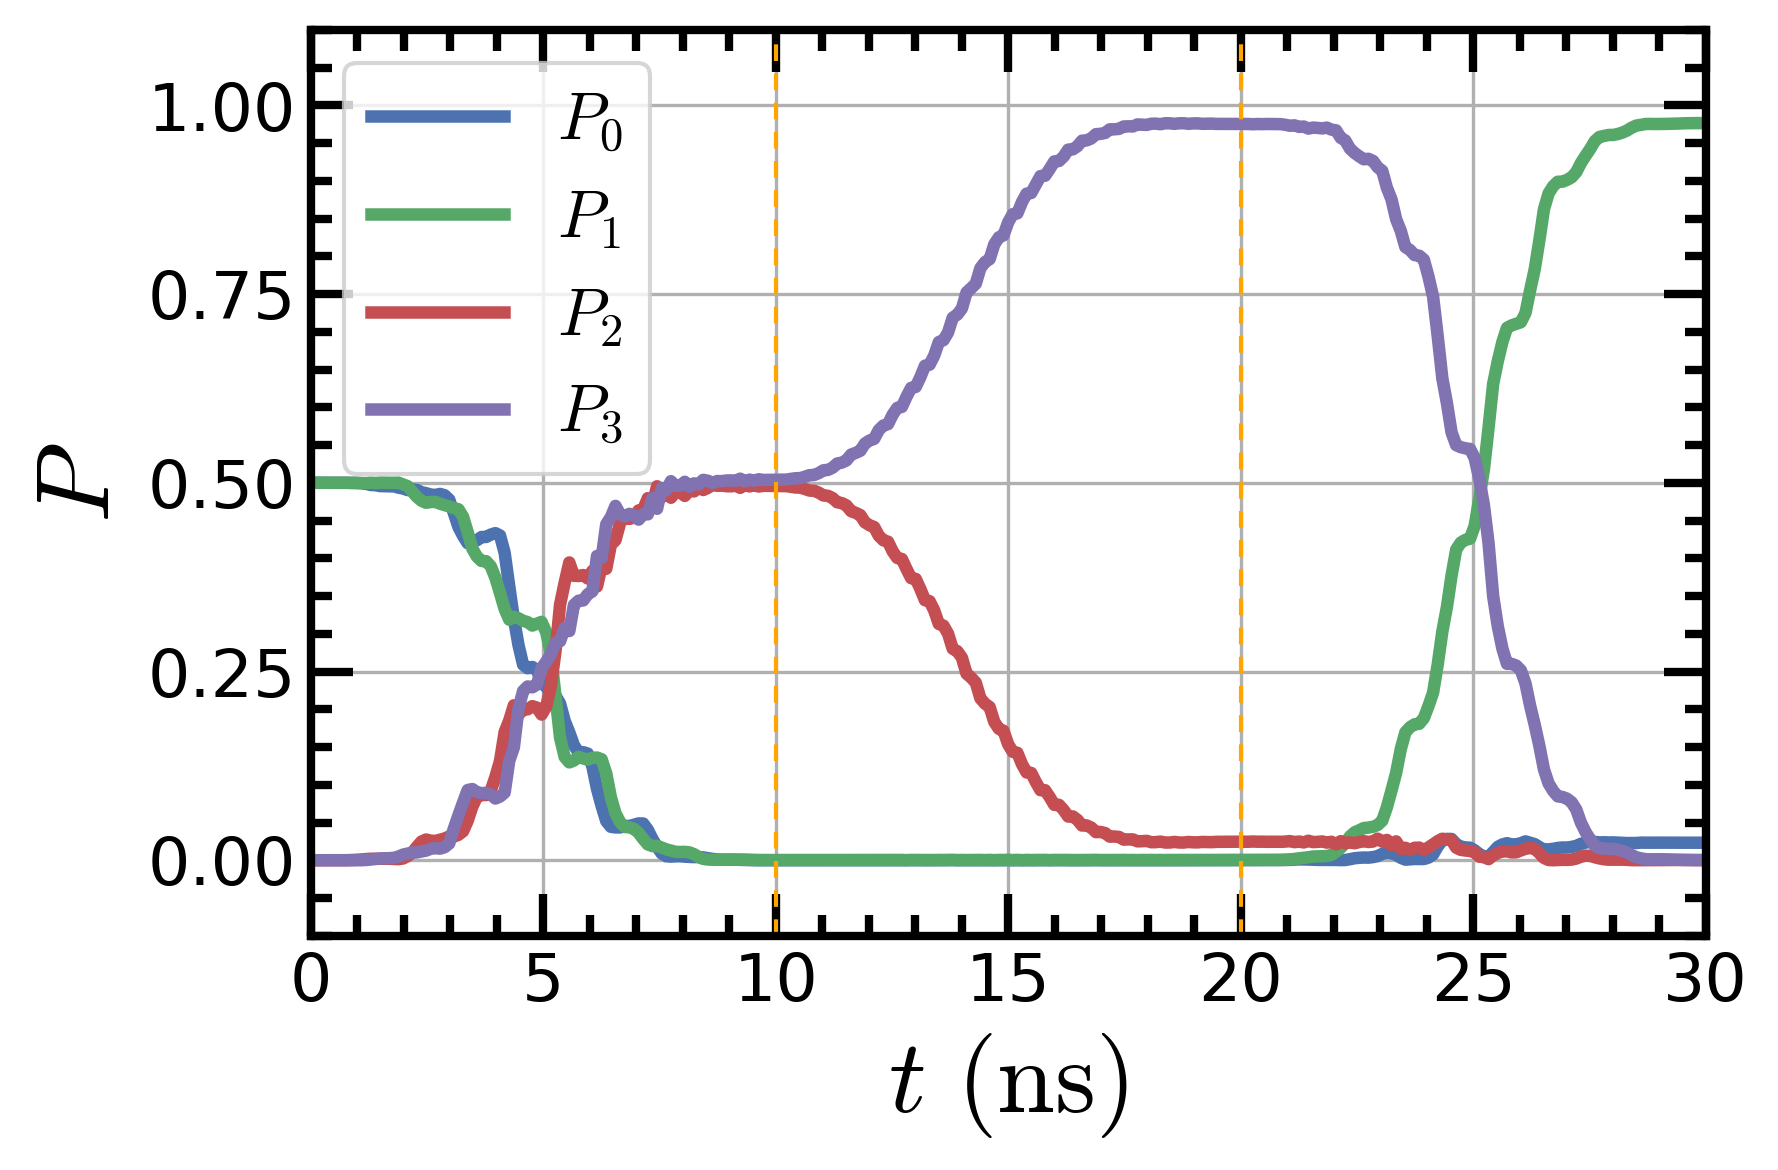

In [50]:
#First pulse
T_gate_02 = 10 #ns
t_points_02 = np.linspace(0, T_gate_02, 10 * int(T_gate_02) + 1)
drive_amplitude_factor_02 = 0.5
# drive_ratio,drag_coeff_02,delta_omega_d1,delta_omega_d2,drag_coeff_ratio =[ 1.06949707e+00, -2.61610930e-02,  9.07668388e-03,  7.40791843e-03,
#   1.01133428e+01] 
drag_coeff_02,delta_omega_d1,delta_omega_d2,drag_coeff_ratio = opt0213.x
shape = 'gauss'
sigma = 0.25
drag = True

ini_state1 = 0
fin_state1 = 2
omega_d_1 = qubit.freq(ini_state1,fin_state1) + delta_omega_d1
matr_el_1 = np.abs(qubit.n_ij(ini_state1,fin_state1))

ini_state2 = 1
fin_state2 = 3
omega_d_2 = qubit.freq(ini_state2,fin_state2) + delta_omega_d2
matr_el_2 = np.abs(qubit.n_ij(ini_state2,fin_state2))
epsilon_02 = drive_amplitude_factor_02/matr_el_1

H_drive_02 = epsilon_02*(qubit.n())
H_dummy = 0*(qubit.n())

#Second pulse parameters
T_gate_23 = 10 #ns
t_points_23 = np.linspace(0, T_gate_23, 10 * int(T_gate_23) + 1)
drive_amplitude_factor_23 = 0.25
delta_omega_d_23 = 0
drag_coeff_23 = -0.10540066781753755

ini_state3 = 2
fin_state3 = 3

omega_d_23 = qubit.freq(ini_state3,fin_state3) + delta_omega_d_23
matr_el_23 = np.abs(qubit.n_ij(ini_state3,fin_state3))

epsilon_23 = drive_amplitude_factor_23/matr_el_23
H_drive_23 = epsilon_23*(qubit.n())

#Evolve states
psi_ini = (state_0+state_1)/np.sqrt(2)
evol_states_1 = gates_double.evolution_psi_microwave(
                qubit.H(), H_drive_02,psi0 =psi_ini, t_points=t_points_02, drive_ratio=drive_ratio, DRAG = drag, DRAG_coefficient = drag_coeff_02,
                T_gate=T_gate_02, shape=shape, sigma=sigma, omega_d_1=omega_d_1,omega_d_2=omega_d_2,drag_coeff_ratio = drag_coeff_ratio)
evol_states_2 = gates.evolution_psi_microwave(H_nodrive, H_drive_23, psi0 = evol_states_1[-1], t_points=t_points_23, DRAG = drag,
                                            T_gate=T_gate_23, shape=shape, omega_d=omega_d_23, DRAG_coefficient= drag_coeff_23)
evol_states_3 = gates_double.evolution_psi_microwave(
                qubit.H(), H_drive_02,psi0 = evol_states_2[-1], t_points=t_points_02, drive_ratio=drive_ratio, DRAG = drag, DRAG_coefficient = drag_coeff_02,
                T_gate=T_gate_02, shape=shape, sigma=sigma, omega_d_1=omega_d_1,omega_d_2=omega_d_2,drag_coeff_ratio = drag_coeff_ratio)
evol_states = evol_states_1 +evol_states_2 +evol_states_3

y0_points = np.real(expect(P0,evol_states))
y1_points = np.real(expect(P1,evol_states))
y2_points = np.real(expect(P2,evol_states))
y3_points = np.real(expect(P3,evol_states))

T_gate = T_gate_23 + T_gate_02*2
t_points = np.linspace(0, T_gate, 10*(T_gate)+3)
plt.plot(t_points, y0_points, label = r'$P_0$')
plt.plot(t_points, y1_points, label = r'$P_1$')
plt.plot(t_points, y2_points, label = r'$P_2$')
plt.plot(t_points, y3_points, label = r'$P_3$')
plt.axvline(x=10, linestyle ='--', linewidth = 1.0, color ='orange')
plt.axvline(x=20, linestyle ='--', linewidth = 1.0, color ='orange')
plt.grid()
plt.legend()
plt.xlim([t_points[0], t_points[-1]])
plt.ylabel(r'$P$')
plt.xlabel(r'$t~\mathrm{(ns)}$')
plt.ylim([-0.1, 1.1])

## Get the Pauli transfer matrix (PTM)

<ipython-input-51-ba7e9d17ff1c>:30: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  ptm_real =  np.linalg.lstsq(p_out, p_in)[0]


(<Figure size 2400x1800 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe989568940>)

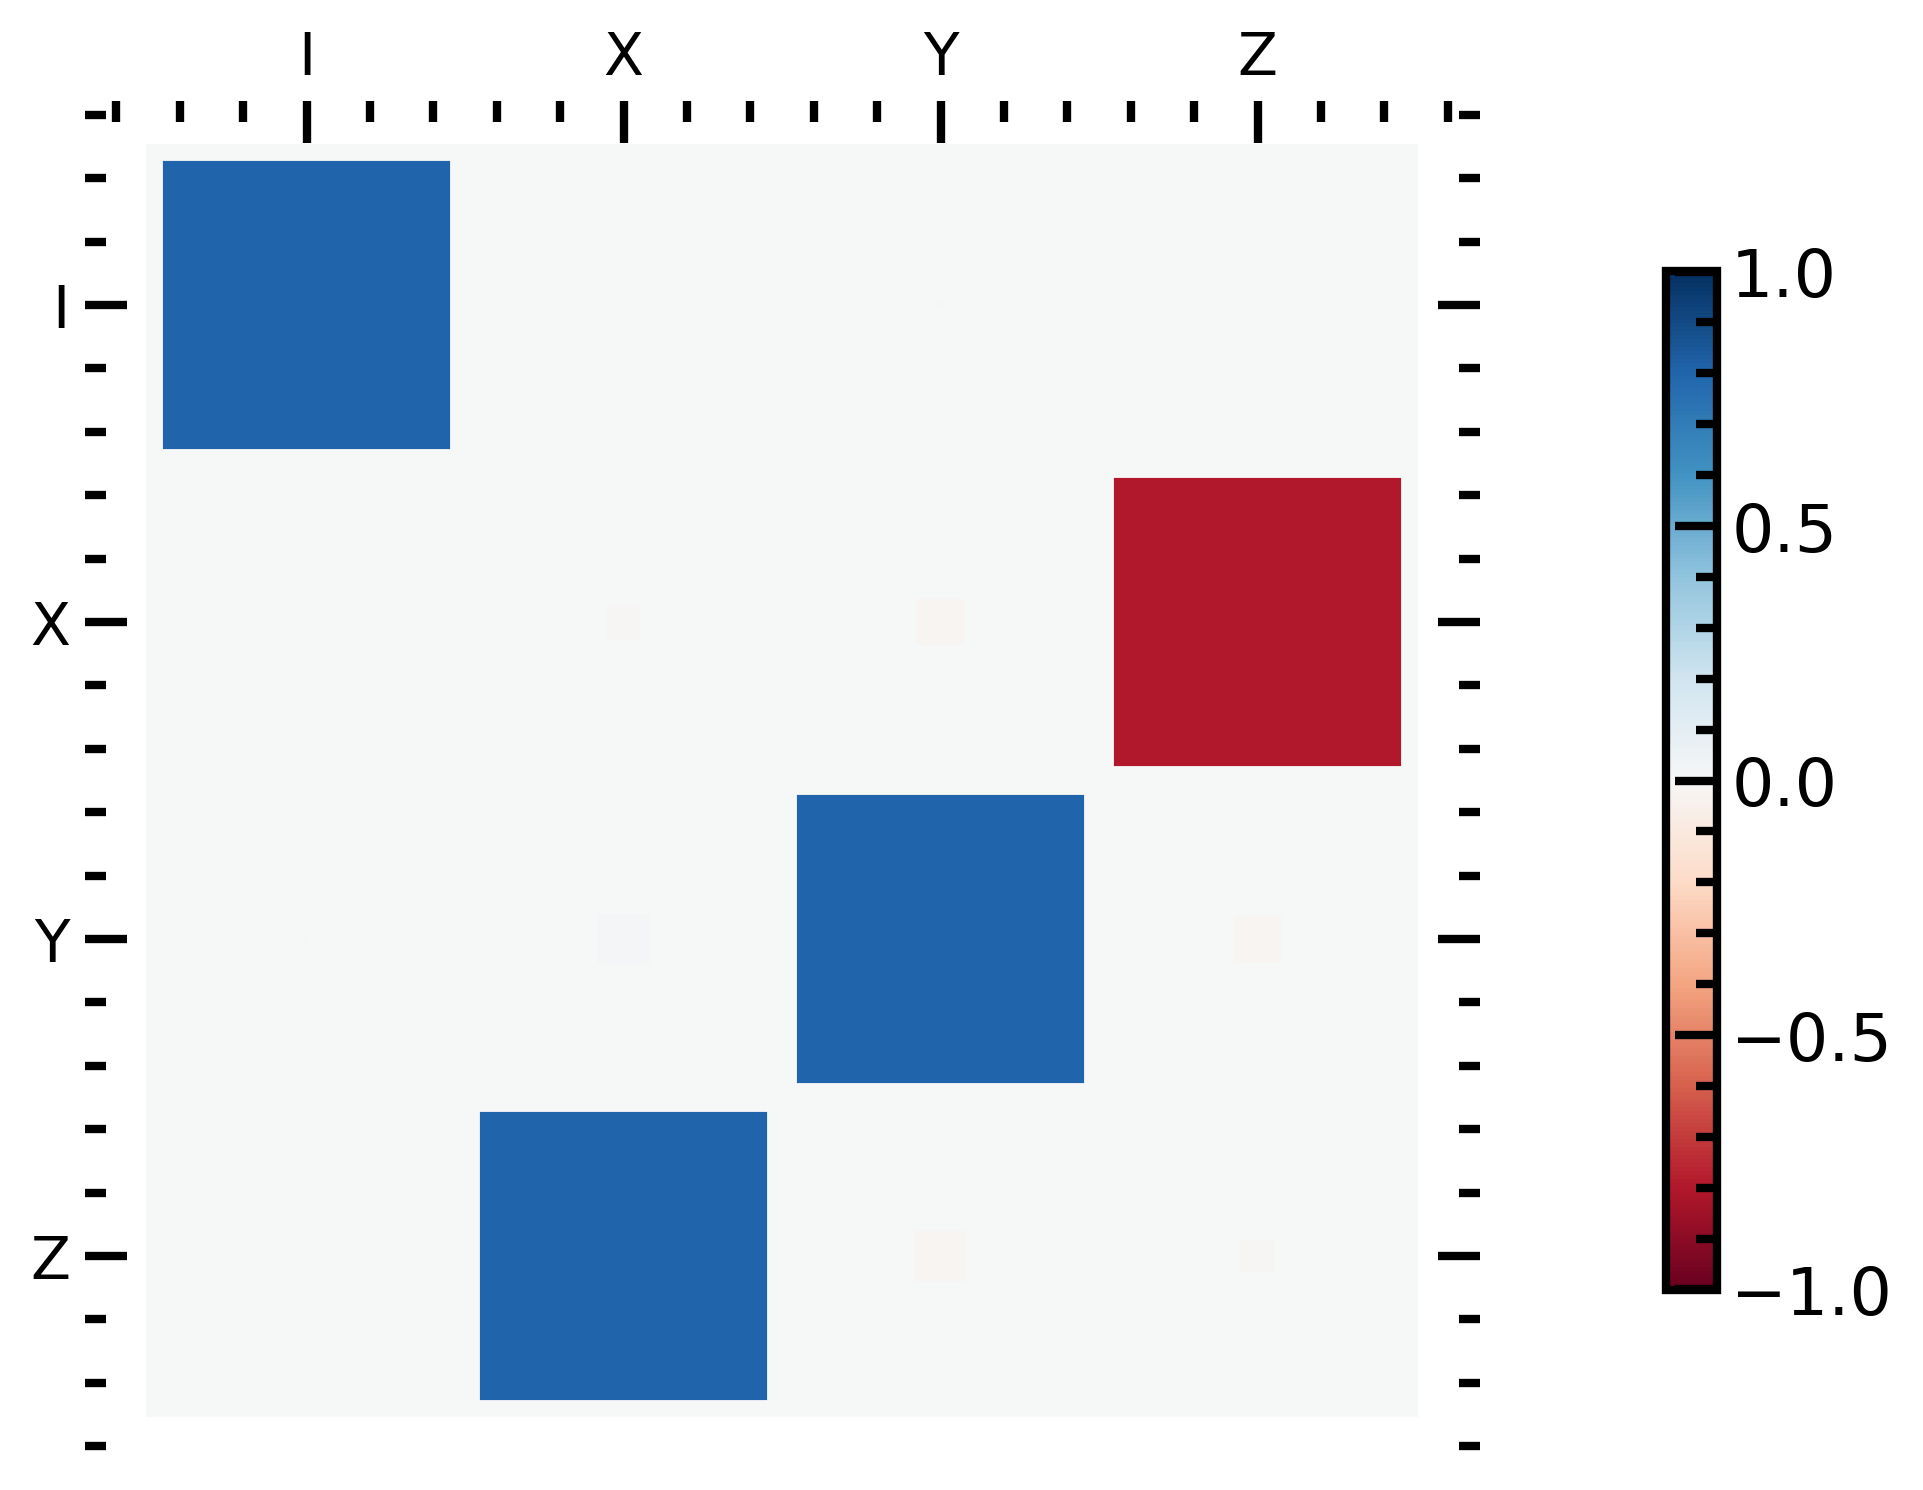

In [51]:
prep_ops = [qeye(nlev_single), op.sx(phi=np.pi/2, N=nlev_single), op.sy(phi=-np.pi/2, N=nlev_single), op.sigx(N=nlev_single)]
meas_ops = [qeye(nlev_single), op.sigx(N=nlev_single), op.sigy(N=nlev_single), op.sigz(N=nlev_single)]
p_in = np.zeros((4,4), dtype = complex)
p_out = np.zeros((4,4), dtype = complex)

T_gate = T_gate_23 + T_gate_02*2
t_points = np.linspace(0, T_gate, 10*(T_gate)+3)
U_nothing_1 = gates_double.evolution_operator_microwave(
                -qubit.H(), H_dummy, t_points=t_points_02, drive_ratio=drive_ratio, DRAG = drag, DRAG_coefficient = drag_coeff_02,
                T_gate=T_gate_02, shape=shape, sigma=sigma, omega_d_1=omega_d_1,omega_d_2=omega_d_2,drag_coeff_ratio = drag_coeff_ratio)

U_nothing_2 = gates.evolution_operator_microwave(
                -qubit.H(), H_dummy, t_points=t_points_23, DRAG = drag, DRAG_coefficient = drag_coeff,
                T_gate=T_gate_23, shape=shape, sigma=sigma, omega_d=omega_d)

for i, prep in enumerate(prep_ops):
    psi_ini = prep*state_0
    evol_states_1 = gates_double.evolution_psi_microwave(
                qubit.H(), H_drive_02,psi0 = psi_ini, t_points=t_points_02, drive_ratio=drive_ratio, DRAG = drag, DRAG_coefficient = drag_coeff_02,
                T_gate=T_gate_02, shape=shape, sigma=sigma, omega_d_1=omega_d_1,omega_d_2=omega_d_2,drag_coeff_ratio = drag_coeff_ratio)
    evol_states_2 = gates.evolution_psi_microwave(H_nodrive, H_drive_23, psi0 = U_nothing_1[-1]*evol_states_1[-1], t_points=t_points_23, DRAG = drag,
                                            T_gate=T_gate_23, shape=shape, omega_d=omega_d_23, DRAG_coefficient= drag_coeff_23)
    evol_states_3 = gates_double.evolution_psi_microwave(
                qubit.H(), H_drive_02 ,psi0 = U_nothing_2[-1]*evol_states_2[-1], t_points=t_points_02, drive_ratio=drive_ratio, DRAG = drag, DRAG_coefficient = drag_coeff_02,
                T_gate=T_gate_02, shape=shape, sigma=sigma, omega_d_1=omega_d_1,omega_d_2=omega_d_2,drag_coeff_ratio = drag_coeff_ratio)
    for j, meas in enumerate(meas_ops):
        p_in[i,j] = np.real(expect(meas, psi_ini))
        p_out[i,j] = np.real(expect(meas, op.sx(phi=0.2, N=nlev_single)*op.sz(phi=0.2, N=nlev_single)*U_nothing_1[-1]*evol_states_3[-1]))
        
ptm_real =  np.linalg.lstsq(p_out, p_in)[0]       
op_label = ["I","X","Y","Z"]
qutip.hinton(ptm_real, xlabels = op_label, ylabels = op_label)       

In [52]:
d = 2
process_fidelity = ((ptm_real.dag()*ptm_ideal).tr() + d)/(d**2+d)
print (process_fidelity)

AttributeError: 'numpy.ndarray' object has no attribute 'dag'

## Estimate the error channel

In [53]:
#List of collapse operators
gamma1_01 = (50e6)**-1.0
gamma2_01 = (2e3)**-1.0
L1_01 = np.sqrt(gamma1_01)*state_0*state_1.dag()
L2_01 = np.sqrt(2*gamma2_01)*state_1*state_1.dag()

gamma1_02 = (53e3)**-1
gamma2_02 = (25e3)**-1
L1_02 = np.sqrt(gamma1_02)*state_0*state_2.dag()
L2_02 = np.sqrt(2*gamma2_02)*state_2*state_2.dag()

gamma1_13 = (58e3)**-1
gamma2_13 = (16e3)**-1
L1_13 = np.sqrt(gamma1_13)*state_1*state_3.dag()
L2_13 = np.sqrt(2*gamma2_13)*state_3*state_3.dag()

gamma1_23 = (306e3)**-1
gamma2_23 = (3e3)**-1
L1_23 = np.sqrt(gamma1_23)*state_2*state_3.dag()
L2_23 = np.sqrt(2*gamma2_23)*state_3*state_3.dag()

gamma1_12 = (786e3)**-1
gamma2_12 = (3e3)**-1
L1_12 = np.sqrt(gamma1_12)*state_1*state_2.dag()
L2_12 = np.sqrt(2*gamma2_12)*state_2*state_2.dag()

gamma1_03 = (697e3)**-1
gamma2_03 = (3e3)**-1
L1_03 = np.sqrt(gamma1_03)*state_0*state_3.dag()
L2_03 = np.sqrt(2*gamma2_03)*state_3*state_3.dag()

c_ops = [L1_01,L2_01, L1_02,L2_02, L1_13,L2_13, L1_23,L2_23, L1_12,L2_12, L1_03,L2_03]

<ipython-input-54-58b4b85d13cf>:32: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  ptm_real_diss =  np.linalg.lstsq(p_out, p_in)[0]


(<Figure size 2400x1800 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe98fb9a1f0>)

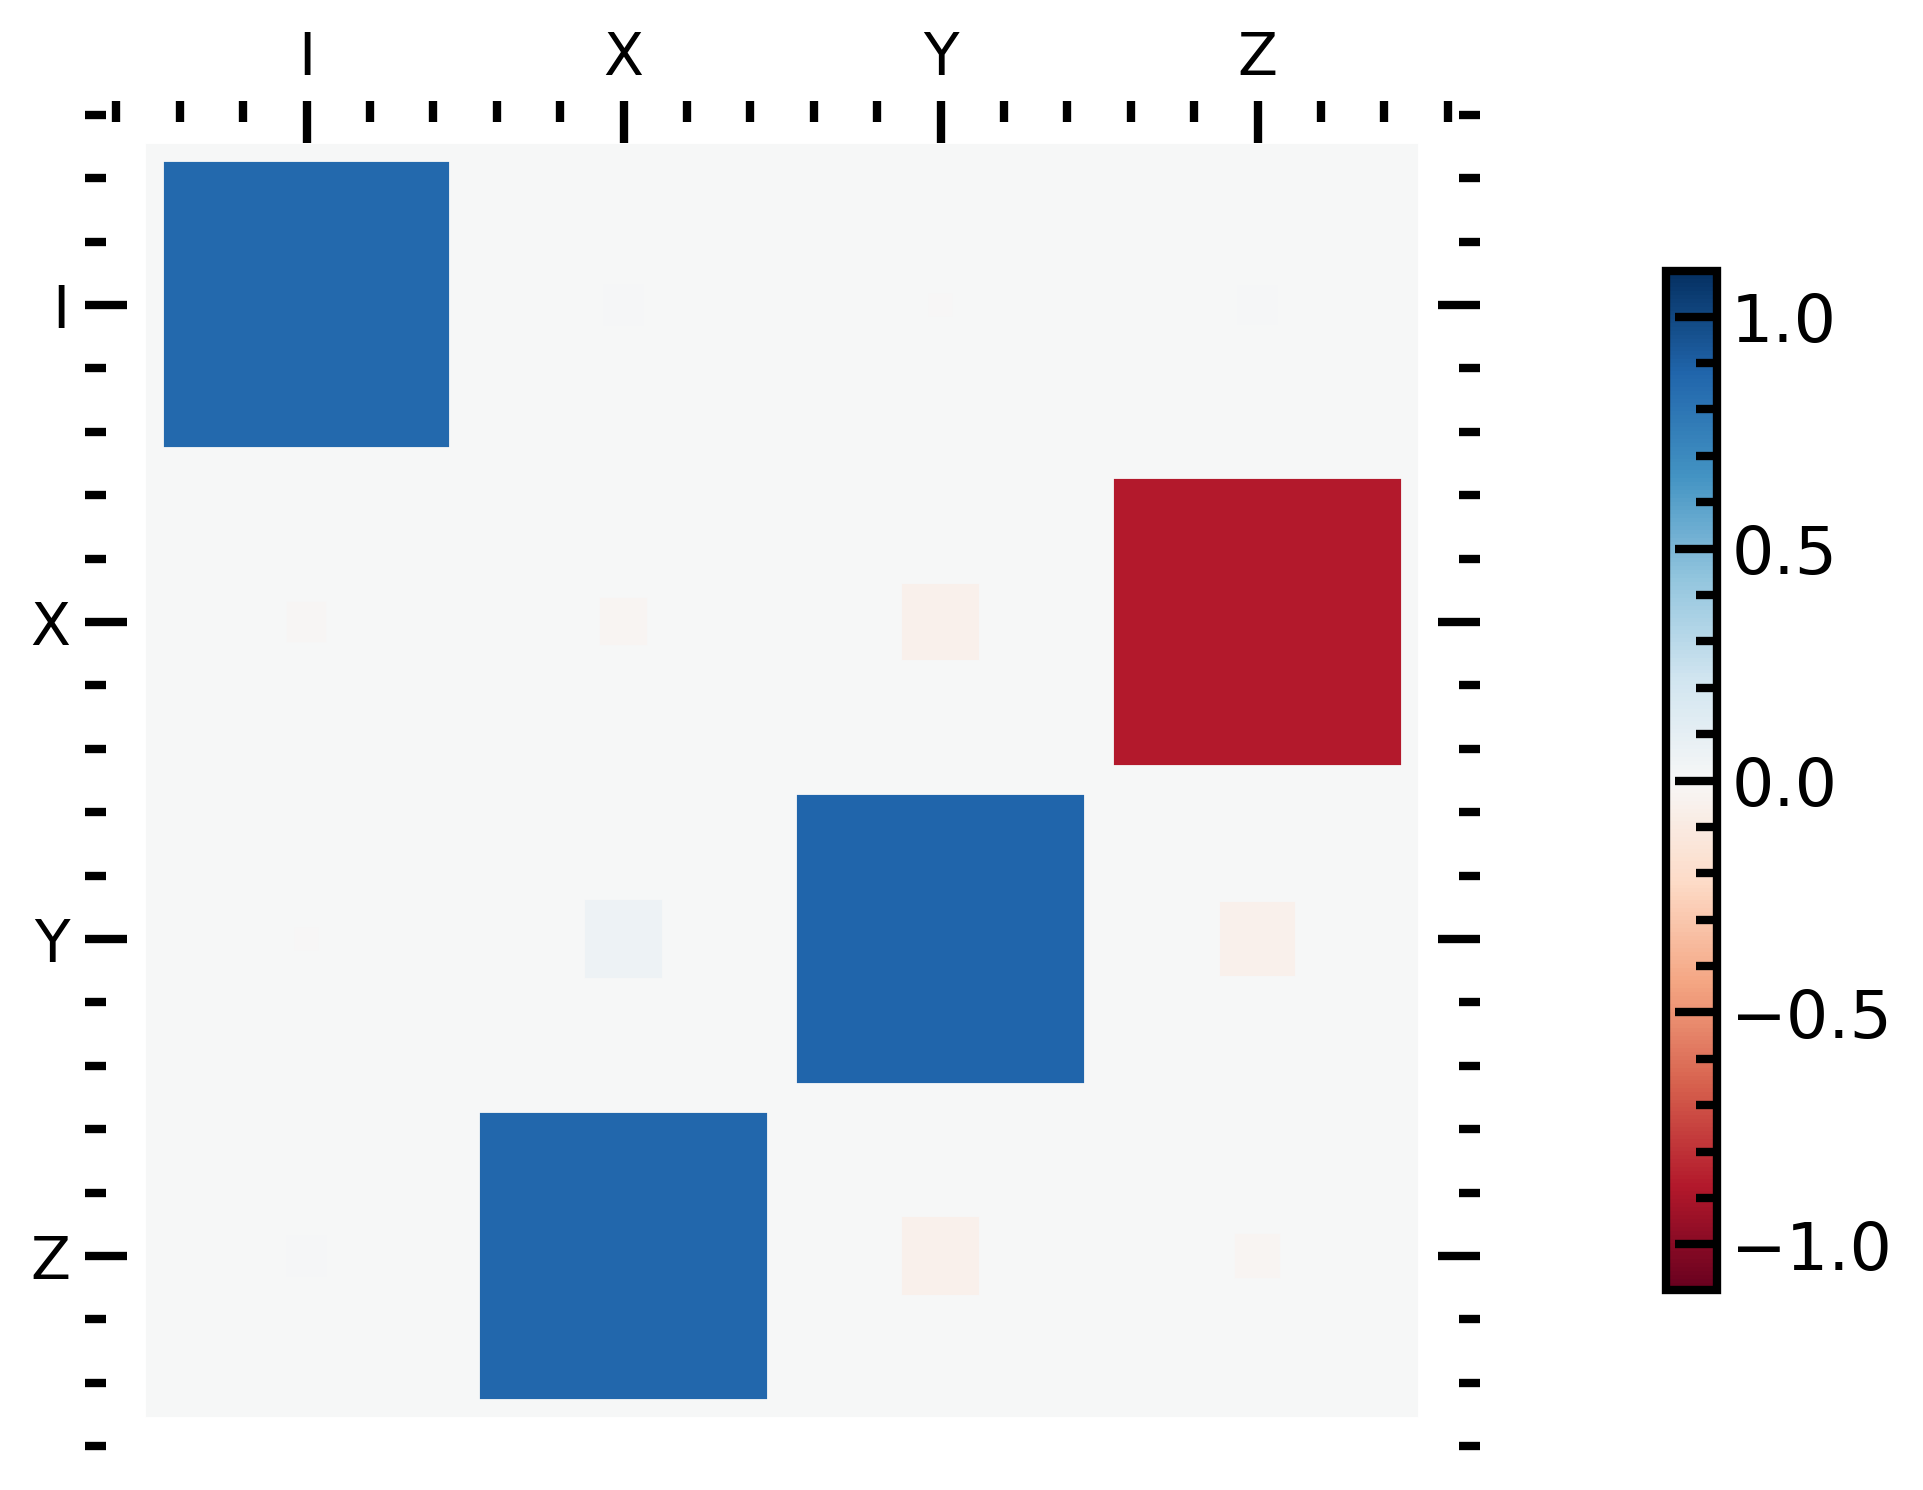

In [54]:
prep_ops = [qeye(nlev_single), op.sx(phi=np.pi/2, N=nlev_single), op.sy(phi=-np.pi/2, N=nlev_single), op.sigx(N=nlev_single)]
meas_ops = [qeye(nlev_single), op.sigx(N=nlev_single), op.sigy(N=nlev_single), op.sigz(N=nlev_single)]
p_in = np.zeros((4,4), dtype = complex)
p_out = np.zeros((4,4), dtype = complex)

T_gate = T_gate_23 + T_gate_02*2
t_points = np.linspace(0, T_gate, 10*(T_gate)+3)
U_nothing_1 = gates_double.evolution_operator_microwave(
                -qubit.H(), H_dummy, t_points=t_points_02, drive_ratio=drive_ratio, DRAG = drag, DRAG_coefficient = drag_coeff_02,
                T_gate=T_gate_02, shape=shape, sigma=sigma, omega_d_1=omega_d_1,omega_d_2=omega_d_2,drag_coeff_ratio = drag_coeff_ratio)

U_nothing_2 = gates.evolution_operator_microwave(
                -qubit.H(), H_dummy, t_points=t_points_23, DRAG = drag, DRAG_coefficient = drag_coeff,
                T_gate=T_gate_23, shape=shape, sigma=sigma, omega_d=omega_d)

for i, prep in enumerate(prep_ops):
    psi_ini = prep*state_0
    evol_states_1 = gates_double.evolution_psi_microwave_diss(
                qubit.H(), H_drive_02,psi0 = psi_ini, t_points=t_points_02, drive_ratio=drive_ratio, DRAG = drag, DRAG_coefficient = drag_coeff_02,
                T_gate=T_gate_02, shape=shape, sigma=sigma, omega_d_1=omega_d_1,omega_d_2=omega_d_2,drag_coeff_ratio = drag_coeff_ratio, c_ops = c_ops)
    evol_states_2 = gates.evolution_psi_microwave_diss(H_nodrive, H_drive_23, psi0 = U_nothing_1[-1]*evol_states_1[-1], t_points=t_points_23, DRAG = drag,
                                            T_gate=T_gate_23, shape=shape, omega_d=omega_d_23, DRAG_coefficient= drag_coeff_23, c_ops = c_ops)
    evol_states_3 = gates_double.evolution_psi_microwave_diss(
                qubit.H(), H_drive_02 ,psi0 = U_nothing_2[-1]*evol_states_2[-1], t_points=t_points_02, drive_ratio=drive_ratio, DRAG = drag, DRAG_coefficient = drag_coeff_02,
                T_gate=T_gate_02, shape=shape, sigma=sigma, omega_d_1=omega_d_1,omega_d_2=omega_d_2,drag_coeff_ratio = drag_coeff_ratio, c_ops = c_ops)
    psi_fin = U_nothing_1[-1]*evol_states_3[-1]*U_nothing_1[-1].dag()
    psi_fin = op.sx(phi=0.2, N=nlev_single)*op.sz(phi=0.2, N=nlev_single)*psi_fin*op.sz(phi=0.2, N=nlev_single).dag()*op.sx(phi=0.2, N=nlev_single).dag()
    for j, meas in enumerate(meas_ops):
        p_in[i,j] = np.real(expect(meas, psi_ini))
        p_out[i,j] = np.real(expect(meas, psi_fin))
        
ptm_real_diss =  np.linalg.lstsq(p_out, p_in)[0]       
op_label = ["I","X","Y","Z"]
qutip.hinton(ptm_real_diss, xlabels = op_label, ylabels = op_label)

In [60]:
n=1
d = 2**n
process_fidelity = ((Qobj(ptm_real).dag()*ptm_ideal).tr() + d)/(d**2+d)
print (process_fidelity)

1.0006431501446922


(<Figure size 2400x1800 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe989805f40>)

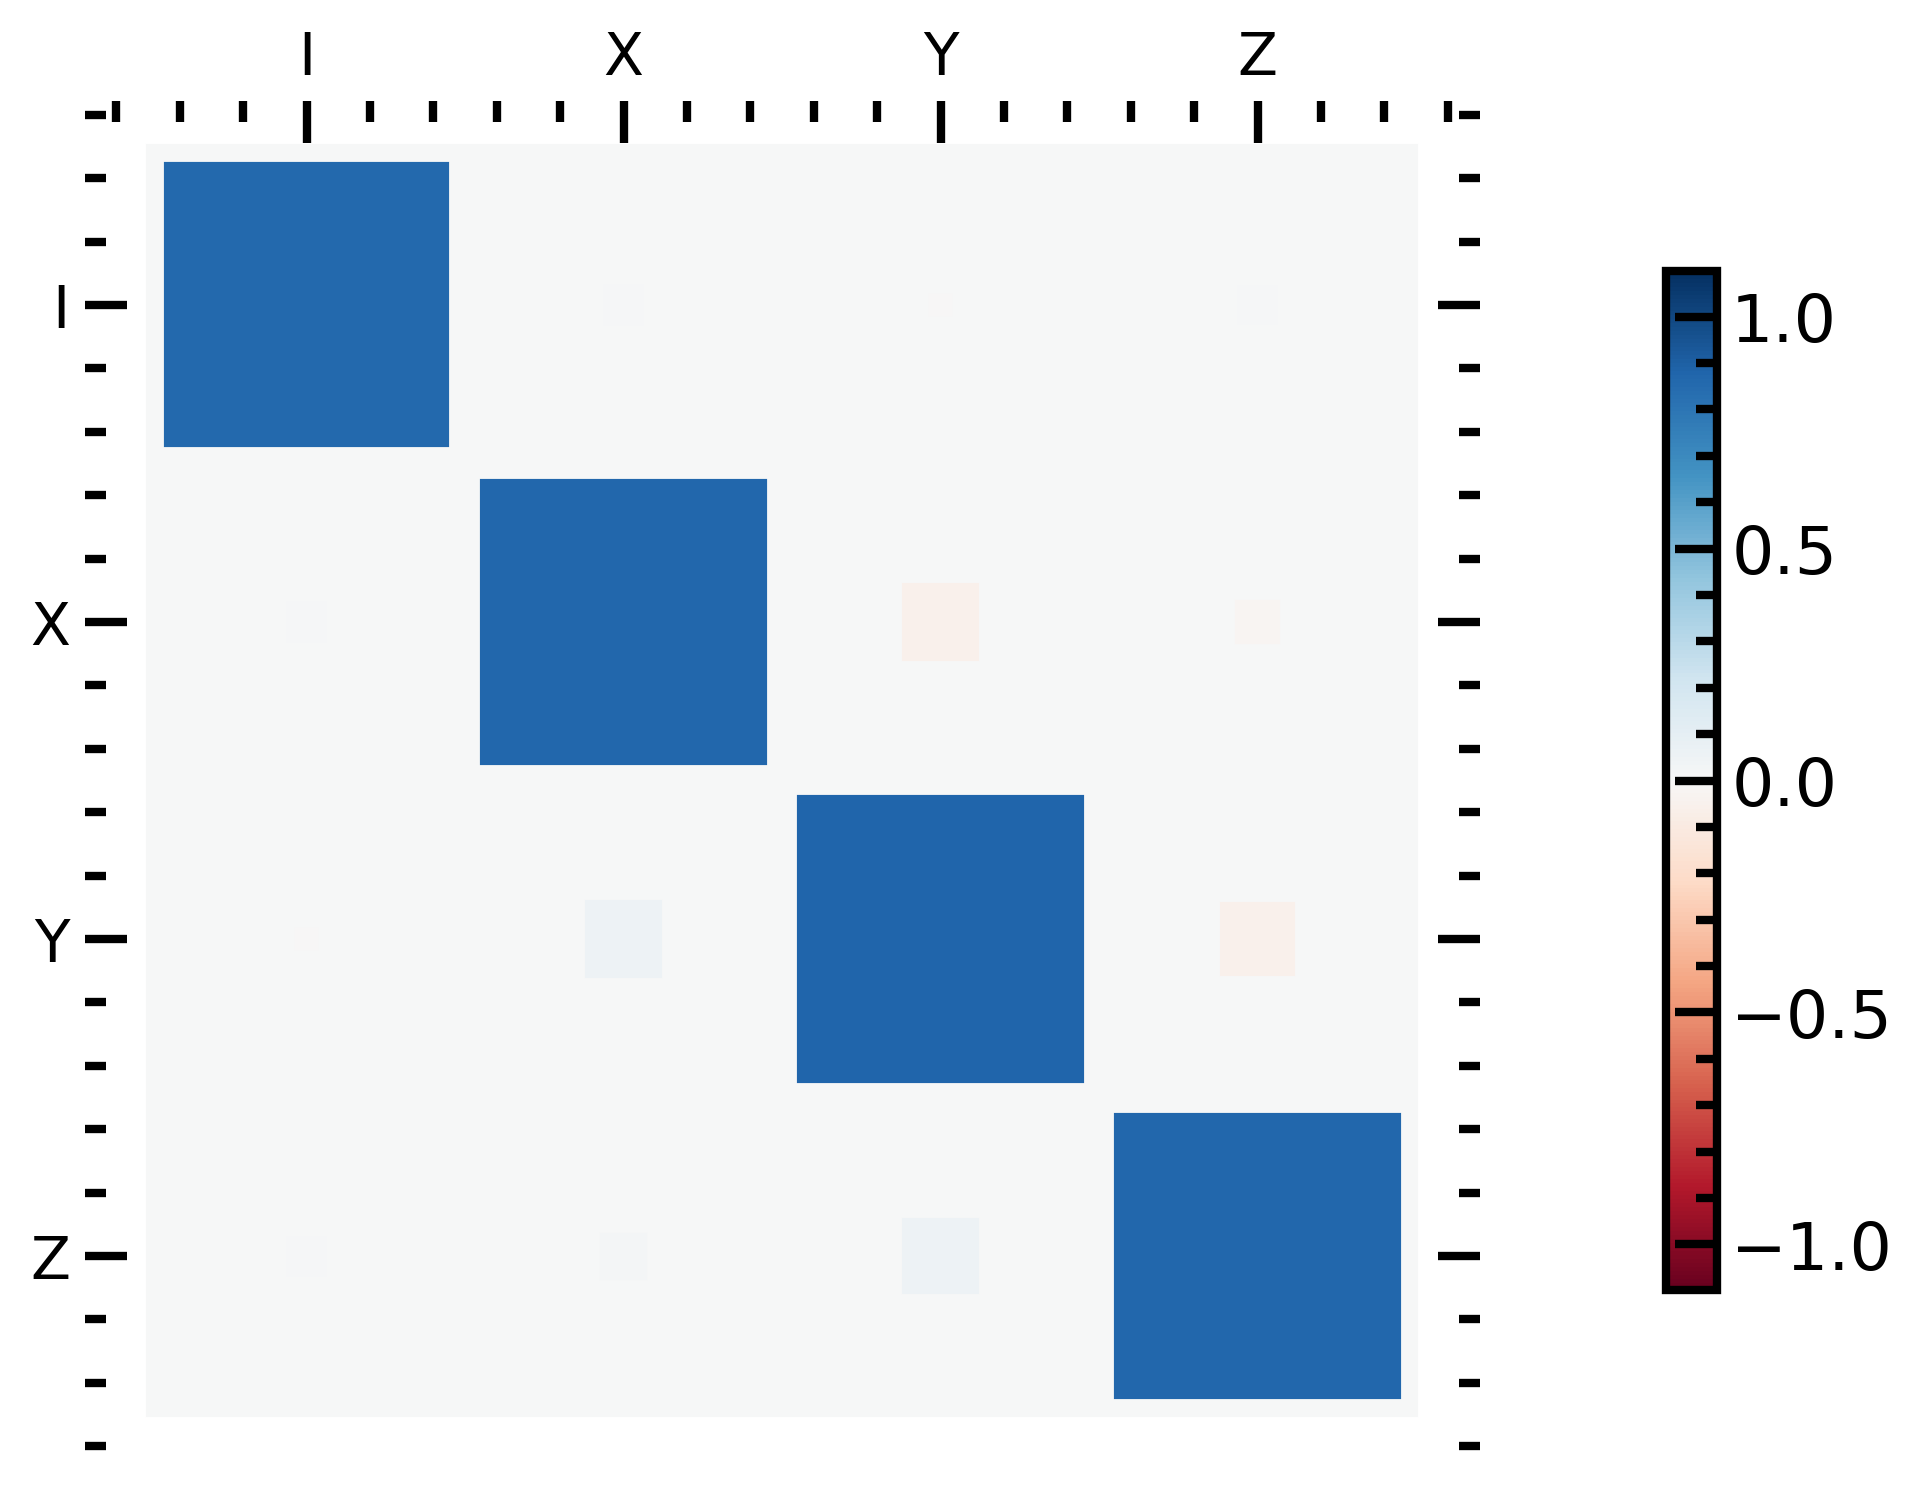

In [61]:
ptm_error = ptm_real_diss*Qobj(np.linalg.inv(ptm_ideal))
hinton(ptm_error, xlabels = op_label, ylabels = op_label) 

<ipython-input-62-c386a6fd144b>:1: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  prep_generator = [qeye(2), ry(np.pi/2.0), rx(np.pi/2.0), sigmax()]
<ipython-input-62-c386a6fd144b>:14: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  gate = ry(np.pi/2)


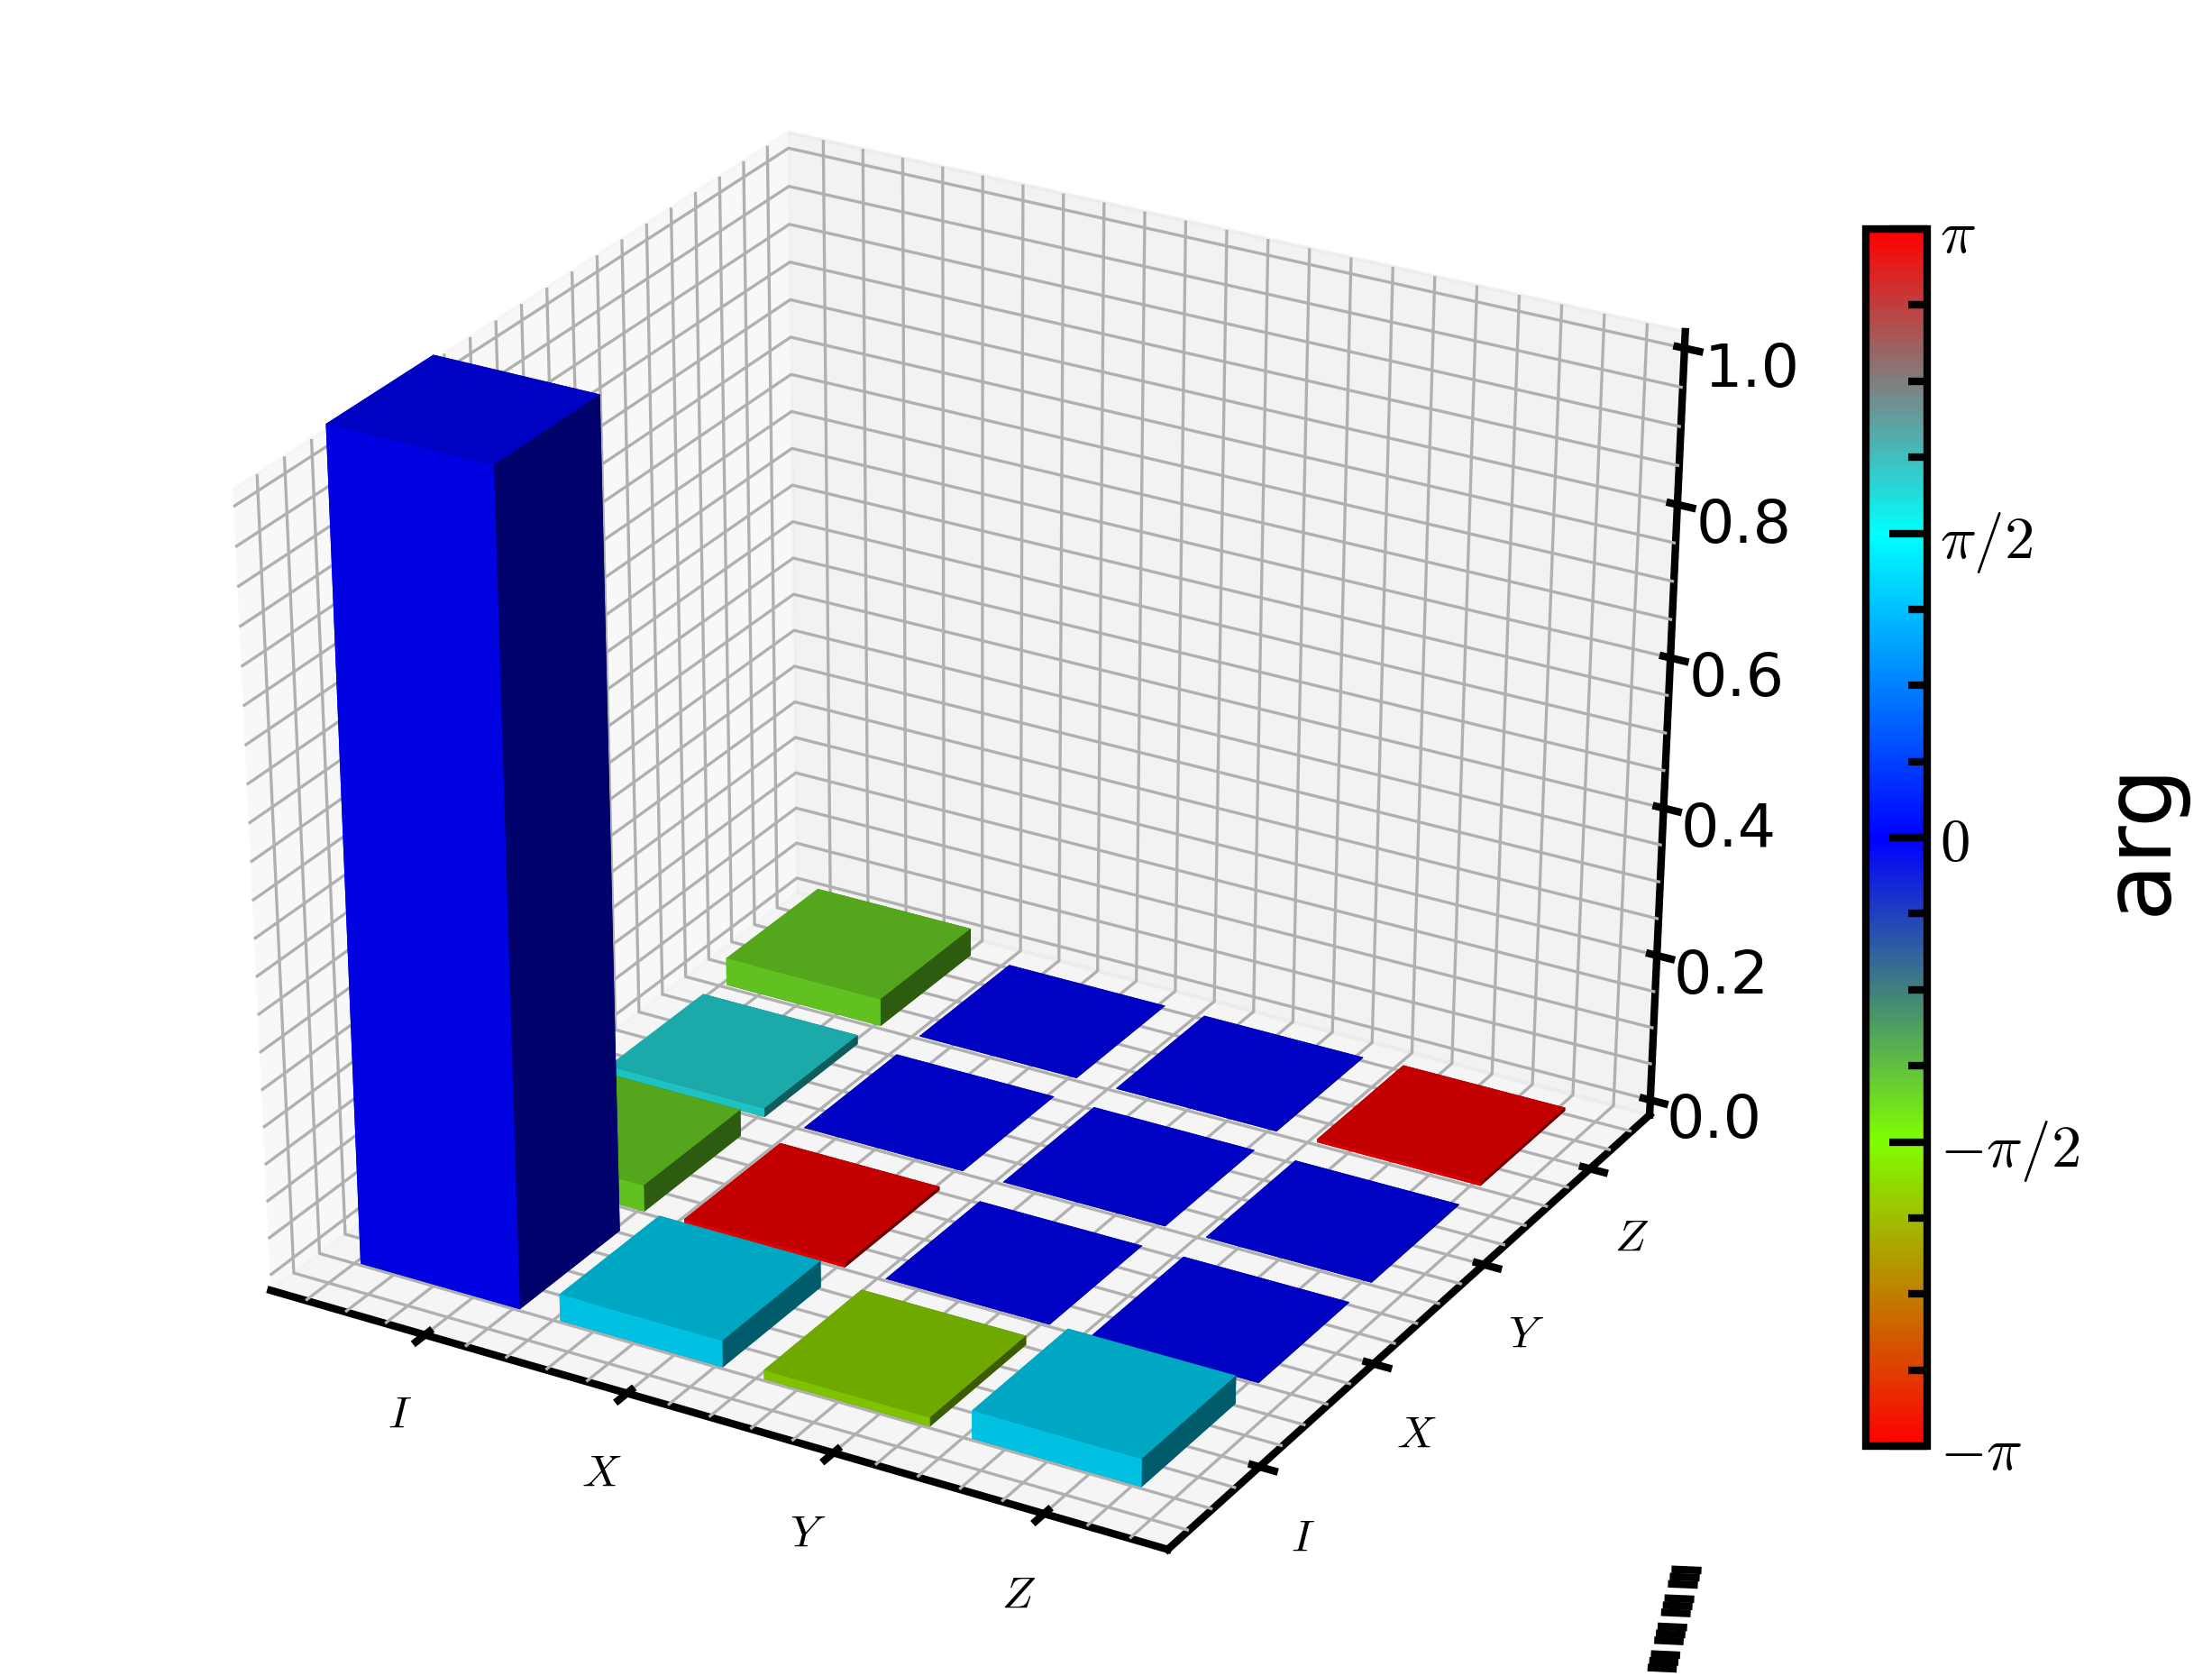

In [62]:
prep_generator = [qeye(2), ry(np.pi/2.0), rx(np.pi/2.0), sigmax()]
prep_rotations = prep_generator

meas_generator = [qeye(2), sigmax(), sigmay(), sigmaz()]
meas_rotations = meas_generator

# Define set of input states
rho_input = []
for i, prep in enumerate(prep_rotations):
    rho = prep*basis(2,0)
    rho = ket2dm(rho)
    rho_input.append(rho)

    gate = ry(np.pi/2)
# Reconstruct the output states from PTM data
p_in = np.zeros((4,4))
for i, prep in enumerate(prep_rotations):
    for j, meas in enumerate(meas_rotations):
        p_in[i,j] = expect(meas, prep*basis(2,0))
#         p_out[i,j] = expect(meas, gate*prep*basis(2,0))

p_out = p_in@ptm_error
rho_output = []
for idx in range (len(rho_input)):
    rho = 0
    for j, meas in enumerate(meas_rotations):
        rho = rho + 0.5*p_out[idx,j]*meas
    rho_output.append(rho)
    
# Quantum process tomography
n = 1
d =2**n
la = np.zeros(d**4, dtype = complex)
chi = np.zeros(d**4, dtype = complex)
beta = np.zeros((d**4,d**4), dtype = complex)
for j in range(4):
    for k in range(4):
        la[k+4*j] = (rho_output[j]*rho_input[k]).tr()
        for m in range(4):
            for n in range(4):
                 beta[k+4*j, n+4*m] = (meas_rotations[m]*rho_input[j]*meas_rotations[n]*rho_input[k]).tr()

kappa = np.linalg.inv(beta)
chi = kappa.dot(la)
chi = np.reshape(chi, (4,4)).transpose()
op_label = [["","$I$", "$X$", "$Y$", "$Z$"] for i in range (1)]

# chi = Qobj(chi)
qpt_plot_combined(chi, op_label)
fname = '/Users/longnguyen/Downloads/singleQ_chi.txt'
np.savetxt(fname, chi)

In [69]:
print (abs(chi[3,0]))
print (abs(chi[0,3]))

0.03768188217281707
0.03768188217281715


#  Raman type gate

## Drive 0-2 detuned 

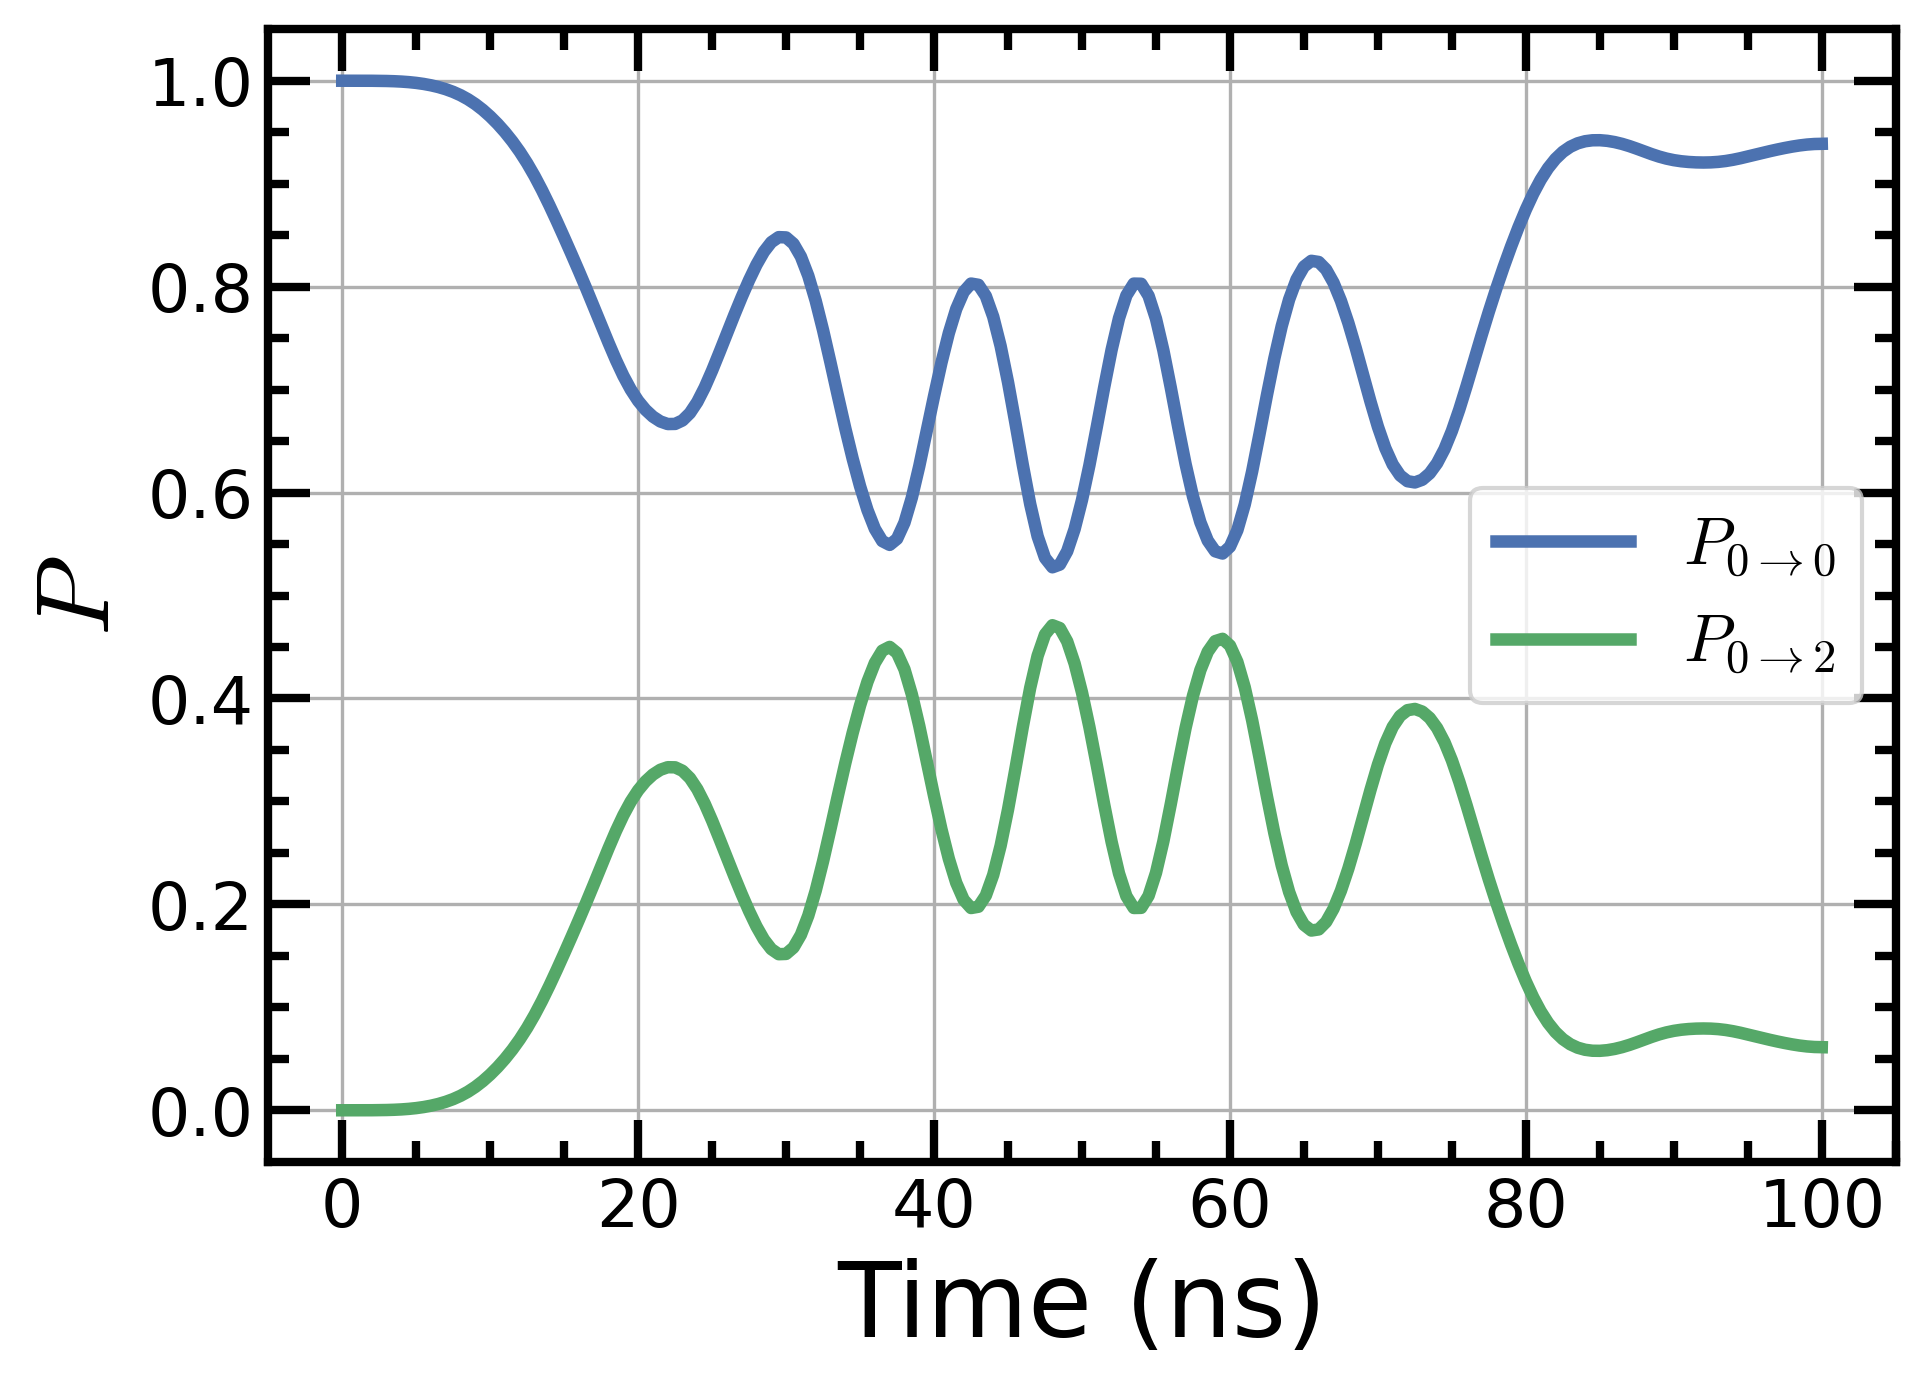

In [102]:
from Fluxonium_hamiltonians import qchard_evolgates_twod as gates_2d

#Gate parameter
T_gate = 100 #ns
t_points = np.linspace(0, T_gate, 2 * int(T_gate) + 1)
drive_amplitude_factor = 100 # MHz
drive_amplitude_factor = drive_amplitude_factor*1e-3  * 2*np.pi
delta_omega_d = -30e-3
shape = 'gauss'
sigma = 0.25
drag = True
drag_coeff = 0.0

ini_state = 0
fin_state = 2
comp_space = [ini_state,fin_state]
omega_d = qubit.freq(ini_state,fin_state) + delta_omega_d
matr_el = np.abs(qubit.n_ij(ini_state,fin_state))

epsilon = drive_amplitude_factor/matr_el
H_drive = epsilon*(qubit.n())
H_dummy = 0*(qubit.n())
U_t = gates.evolution_operator_microwave_nonorm(
                qubit.H(), H_drive, t_points=t_points, DRAG = drag, DRAG_coefficient = drag_coeff,
                T_gate=T_gate, shape=shape, sigma=sigma, omega_d=omega_d)

trans_prob_00 = gates.prob_transition(U_t, state_0, state_0)
trans_prob_02 = gates.prob_transition(U_t, state_0, state_2)

plt.figure(figsize = [7,5])
plt.plot(t_points, trans_prob_00, label=r'$P_{0\rightarrow 0}$')
plt.plot(t_points, trans_prob_02, label=r'$P_{0\rightarrow 2}$')
plt.xlabel('Time (ns)')
plt.ylabel(r'$P$')
plt.legend()
plt.grid()

In [112]:
#Gate parameter
T_gate = 100 #ns
t_points = np.linspace(0, T_gate, 2 * int(T_gate) + 1)
drive_amplitude_factor = 10 # MHz
# drive_amplitude_factor = drive_amplitude_factor*1e-3  * 2*np.pi
drive_amplitude_factor1 = drive_amplitude_factor
drive_amplitude_factor2 = drive_amplitude_factor
delta_omega_d = -30e-3
shape = 'square'
sigma = 0.25
drag = True
drag_coeff = 0.0

ini_state = 0
fin_state = 2
omega_d1 = qubit.freq(ini_state,fin_state) + delta_omega_d
matr_el1 = np.abs(qubit.n_ij(ini_state,fin_state))

ini_state = 1
fin_state = 2
omega_d2 = qubit.freq(ini_state,fin_state) + delta_omega_d
matr_el2 = np.abs(qubit.n_ij(ini_state,fin_state))

epsilon1 = drive_amplitude_factor1/matr_el1
H_drive1 = epsilon1*(qubit.n())
epsilon2 = drive_amplitude_factor2/matr_el2
H_drive2 = epsilon2*(qubit.n())
U_t = gates.evolution_operator_microwave_nonorm(
                qubit.H(), H_drive1, H_drive2, t_points=t_points, DRAG = drag, DRAG_coefficient = drag_coeff,
                T_gate=T_gate, shape=shape, sigma=sigma, omega_d1=omega_d1, omega_d2=omega_d2)

trans_prob_11 = gates.prob_transition(U_t, state_1, state_1)
trans_prob_12 = gates.prob_transition(U_t, state_1, state_2)

plt.figure(figsize = [7,5])
plt.plot(t_points, trans_prob_11, label=r'$P_{1\rightarrow 1}$')
plt.plot(t_points, trans_prob_12, label=r'$P_{1\rightarrow 2}$')
plt.xlabel('Time (ns)')
plt.ylabel(r'$P$')
plt.legend()
plt.grid()

TypeError: evolution_operator_microwave_nonorm() got multiple values for argument 't_points'

## Two drives at the same time

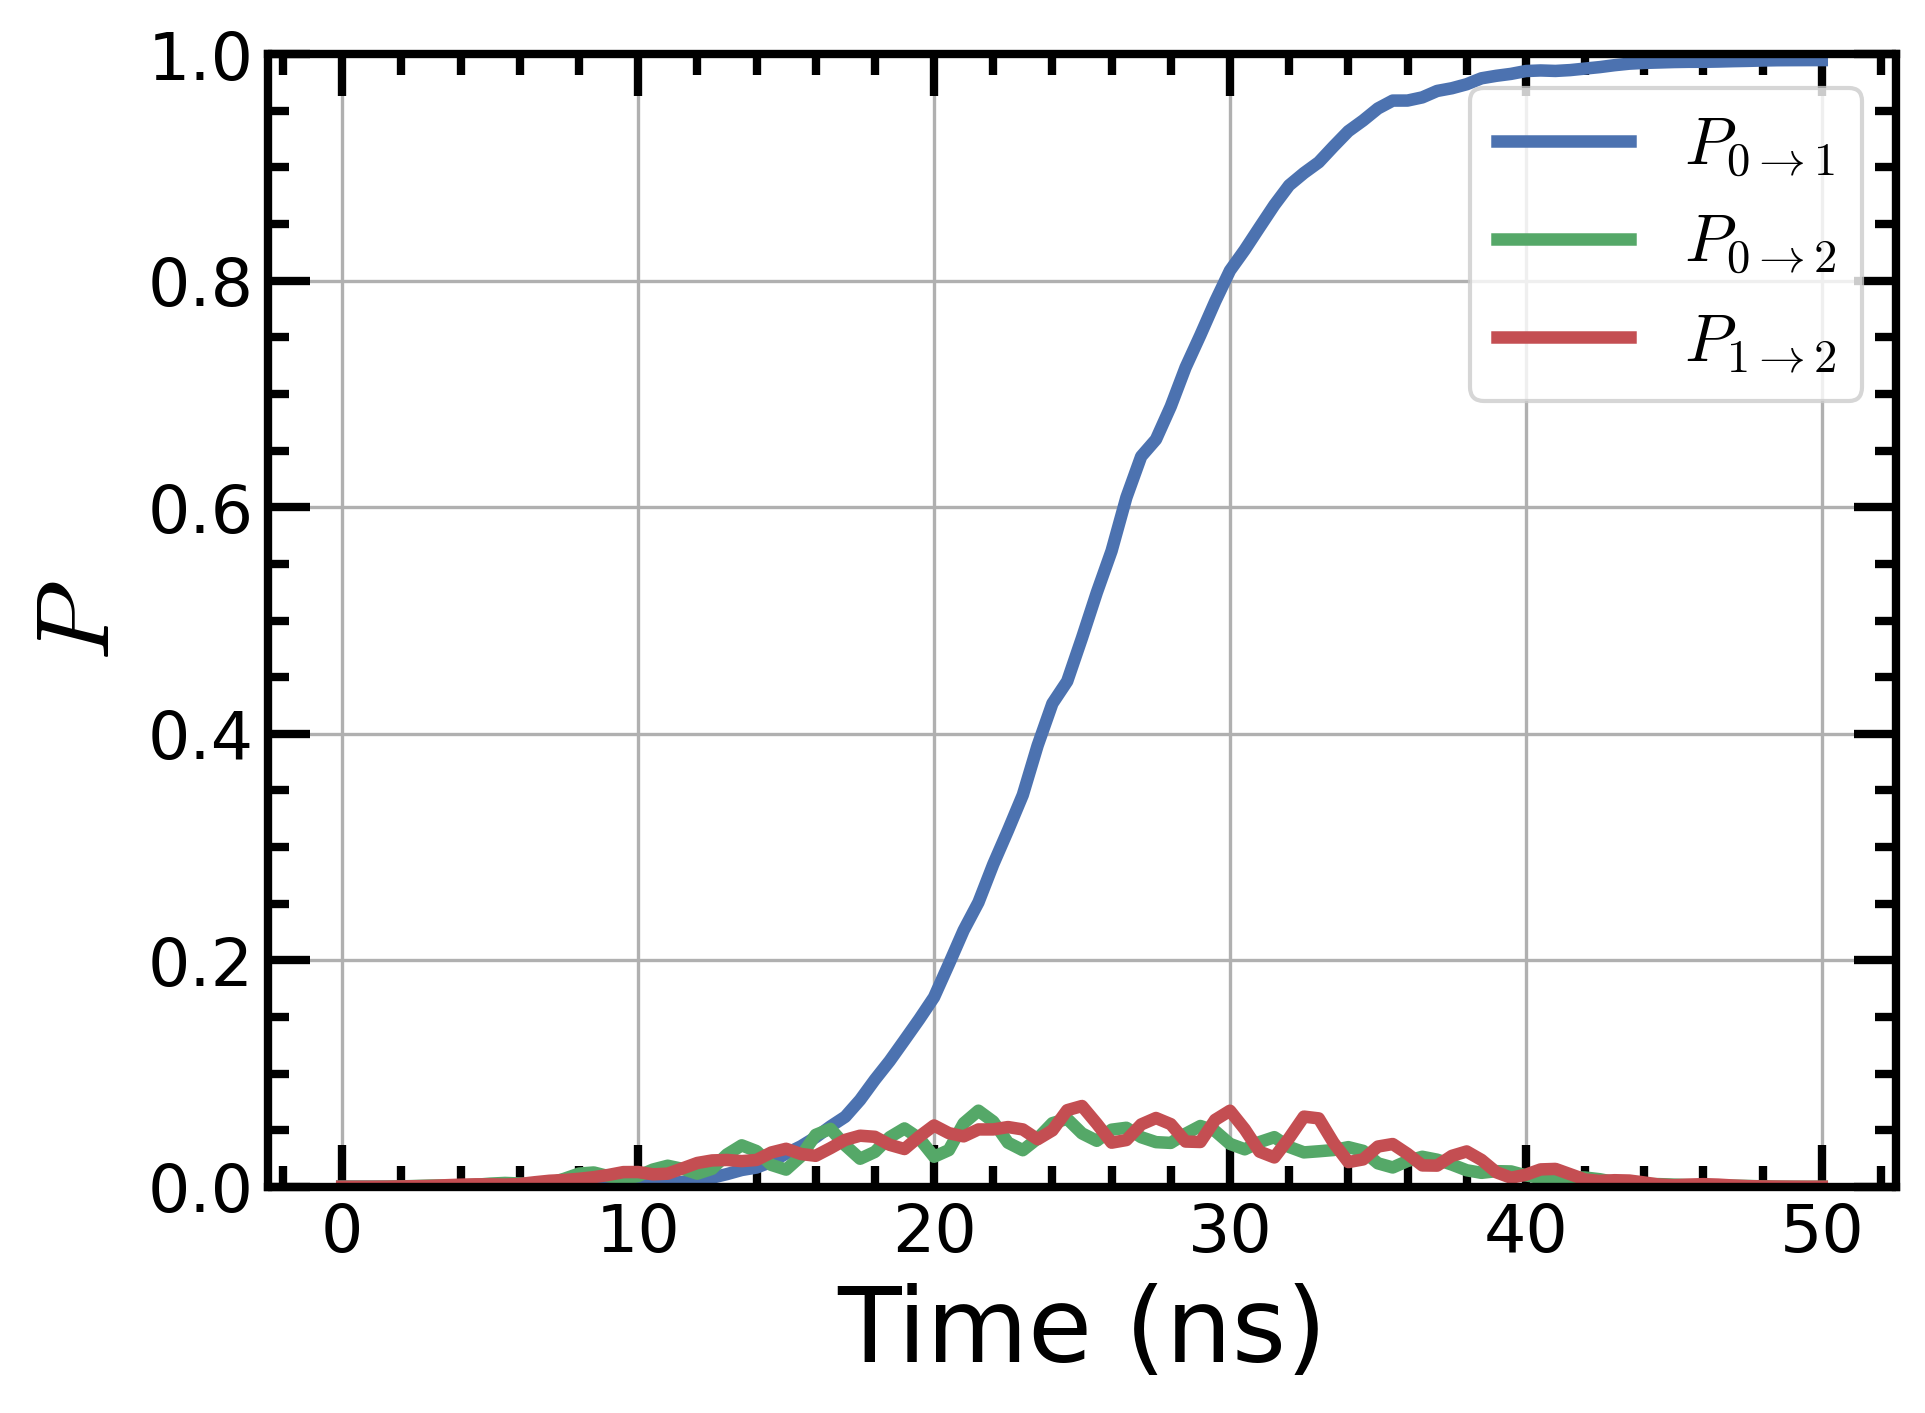

In [180]:
#Gate parameter
T_gate = 50 #ns
t_points = np.linspace(0, T_gate, 2 * int(T_gate) + 1)
drive_amplitude_factor = 3.01 # MHz
# drive_amplitude_factor = drive_amplitude_factor*1e-3  * 2*np.pi
drive_amplitude_factor1 = drive_amplitude_factor
drive_amplitude_factor2 = drive_amplitude_factor
delta_omega_d = -200e-3
shape = 'gauss'
sigma = 0.25
drag = True
drag_coeff = 0.0

ini_state = 0
fin_state = 2
omega_d1 = qubit.freq(ini_state,fin_state) + delta_omega_d
matr_el1 = np.abs(qubit.n_ij(ini_state,fin_state))

ini_state = 1
fin_state = 2
omega_d2 = qubit.freq(ini_state,fin_state) + delta_omega_d
matr_el2 = np.abs(qubit.n_ij(ini_state,fin_state))

epsilon1 = drive_amplitude_factor1/matr_el1
H_drive1 = epsilon1*(qubit.n())
epsilon2 = drive_amplitude_factor2/matr_el2
H_drive2 = epsilon2*(qubit.n())

U_t = gates_2d.evolution_operator_microwave(
                qubit.H(), H_drive1, H_drive2, t_points=t_points, DRAG = drag, DRAG_coefficient = drag_coeff,
                T_gate=T_gate, shape=shape, sigma=sigma, omega_d1=omega_d1,omega_d2=omega_d2)

trans_prob_02 = gates.prob_transition(U_t, state_0, state_2)
trans_prob_01 = gates.prob_transition(U_t, state_0, state_1)
trans_prob_12 = gates.prob_transition(U_t, state_1, state_2)

plt.figure(figsize = [7,5])
plt.plot(t_points, trans_prob_01, label=r'$P_{0\rightarrow 1}$')
plt.plot(t_points, trans_prob_02, label=r'$P_{0\rightarrow 2}$')
plt.plot(t_points, trans_prob_12, label=r'$P_{1\rightarrow 2}$')
plt.xlabel('Time (ns)')
plt.ylabel(r'$P$')
plt.legend()
plt.ylim([0,1])
plt.grid()

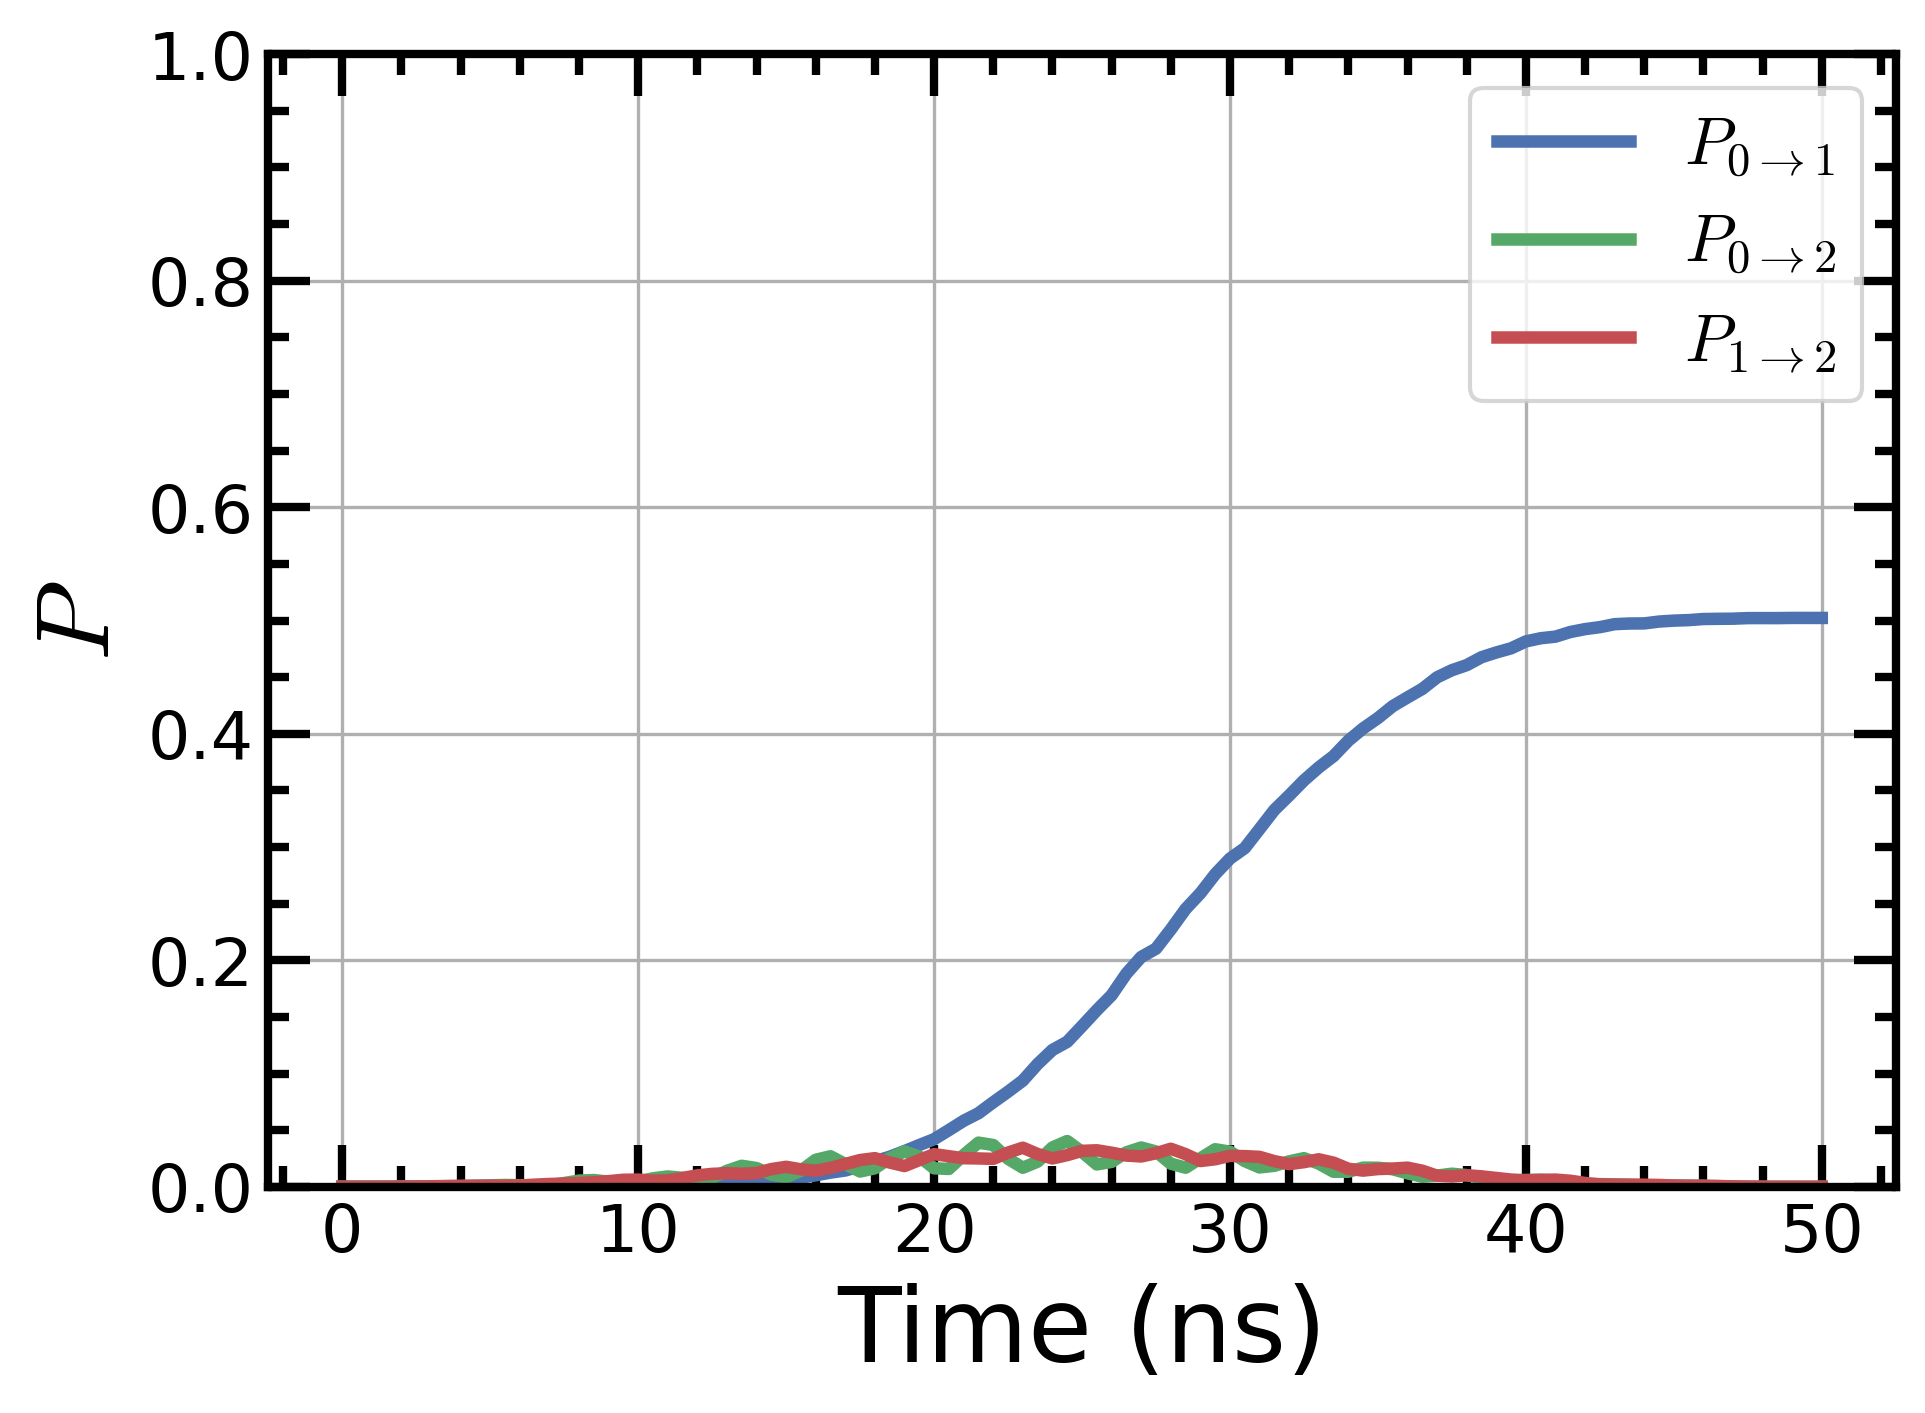

In [153]:
#Gate parameter
T_gate = 50 #ns
t_points = np.linspace(0, T_gate, 2 * int(T_gate) + 1)
drive_amplitude_factor = 2.036 # MHz
# drive_amplitude_factor = drive_amplitude_factor*1e-3  * 2*np.pi
drive_amplitude_factor1 = drive_amplitude_factor
drive_amplitude_factor2 = drive_amplitude_factor
delta_omega_d = -200e-3
shape = 'gauss'
sigma = 0.25
drag = True
drag_coeff = 0.0

ini_state = 0
fin_state = 2
omega_d1 = qubit.freq(ini_state,fin_state) + delta_omega_d
matr_el1 = np.abs(qubit.n_ij(ini_state,fin_state))

ini_state = 1
fin_state = 2
omega_d2 = qubit.freq(ini_state,fin_state) + delta_omega_d
matr_el2 = np.abs(qubit.n_ij(ini_state,fin_state))

epsilon1 = drive_amplitude_factor1/matr_el1
H_drive1 = epsilon1*(qubit.n())
epsilon2 = drive_amplitude_factor2/matr_el2
H_drive2 = epsilon2*(qubit.n())

U_t = gates_2d.evolution_operator_microwave(
                qubit.H(), H_drive1, H_drive2, t_points=t_points, DRAG = drag, DRAG_coefficient = drag_coeff,
                T_gate=T_gate, shape=shape, sigma=sigma, omega_d1=omega_d1,omega_d2=omega_d2)

trans_prob_02 = gates.prob_transition(U_t, state_0, state_2)
trans_prob_01 = gates.prob_transition(U_t, state_0, state_1)
trans_prob_12 = gates.prob_transition(U_t, state_1, state_2)

plt.figure(figsize = [7,5])
plt.plot(t_points, trans_prob_01, label=r'$P_{0\rightarrow 1}$')
plt.plot(t_points, trans_prob_02, label=r'$P_{0\rightarrow 2}$')
plt.plot(t_points, trans_prob_12, label=r'$P_{1\rightarrow 2}$')
plt.xlabel('Time (ns)')
plt.ylabel(r'$P$')
plt.legend()
plt.ylim([0,1])
plt.grid()

## Tomography

In [197]:
u0 = U_t[-1].matrix_element(state_0, state_0)
u1 = U_t[-1].matrix_element(state_1, state_1)
phase = np.angle(u0/u1)
print (phase)
single_qu_z = 0
single_qu_z = single_qu_z + state_0*state_0.dag()
single_qu_z = single_qu_z + np.exp(-1j*phase)*state_1*state_1.dag()
U = single_qu_z*U_t[-1]
u0 = U.matrix_element(state_0, state_0)
u1 = U.matrix_element(state_1, state_1)
phase = np.angle(u0/u1)
print (phase)

-0.6329269294488096
-1.2658538588976191


In [191]:
print (U[0,0])
print (U[1,1])

(0.05455463392193628+0.046580690102776684j)
(0.054549724381710823+0.04657649816241619j)


<ipython-input-198-5ef613d17320>:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  ptm_real =  np.linalg.lstsq(p_out, p_in)[0]


(<Figure size 2400x1800 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe97a258bb0>)

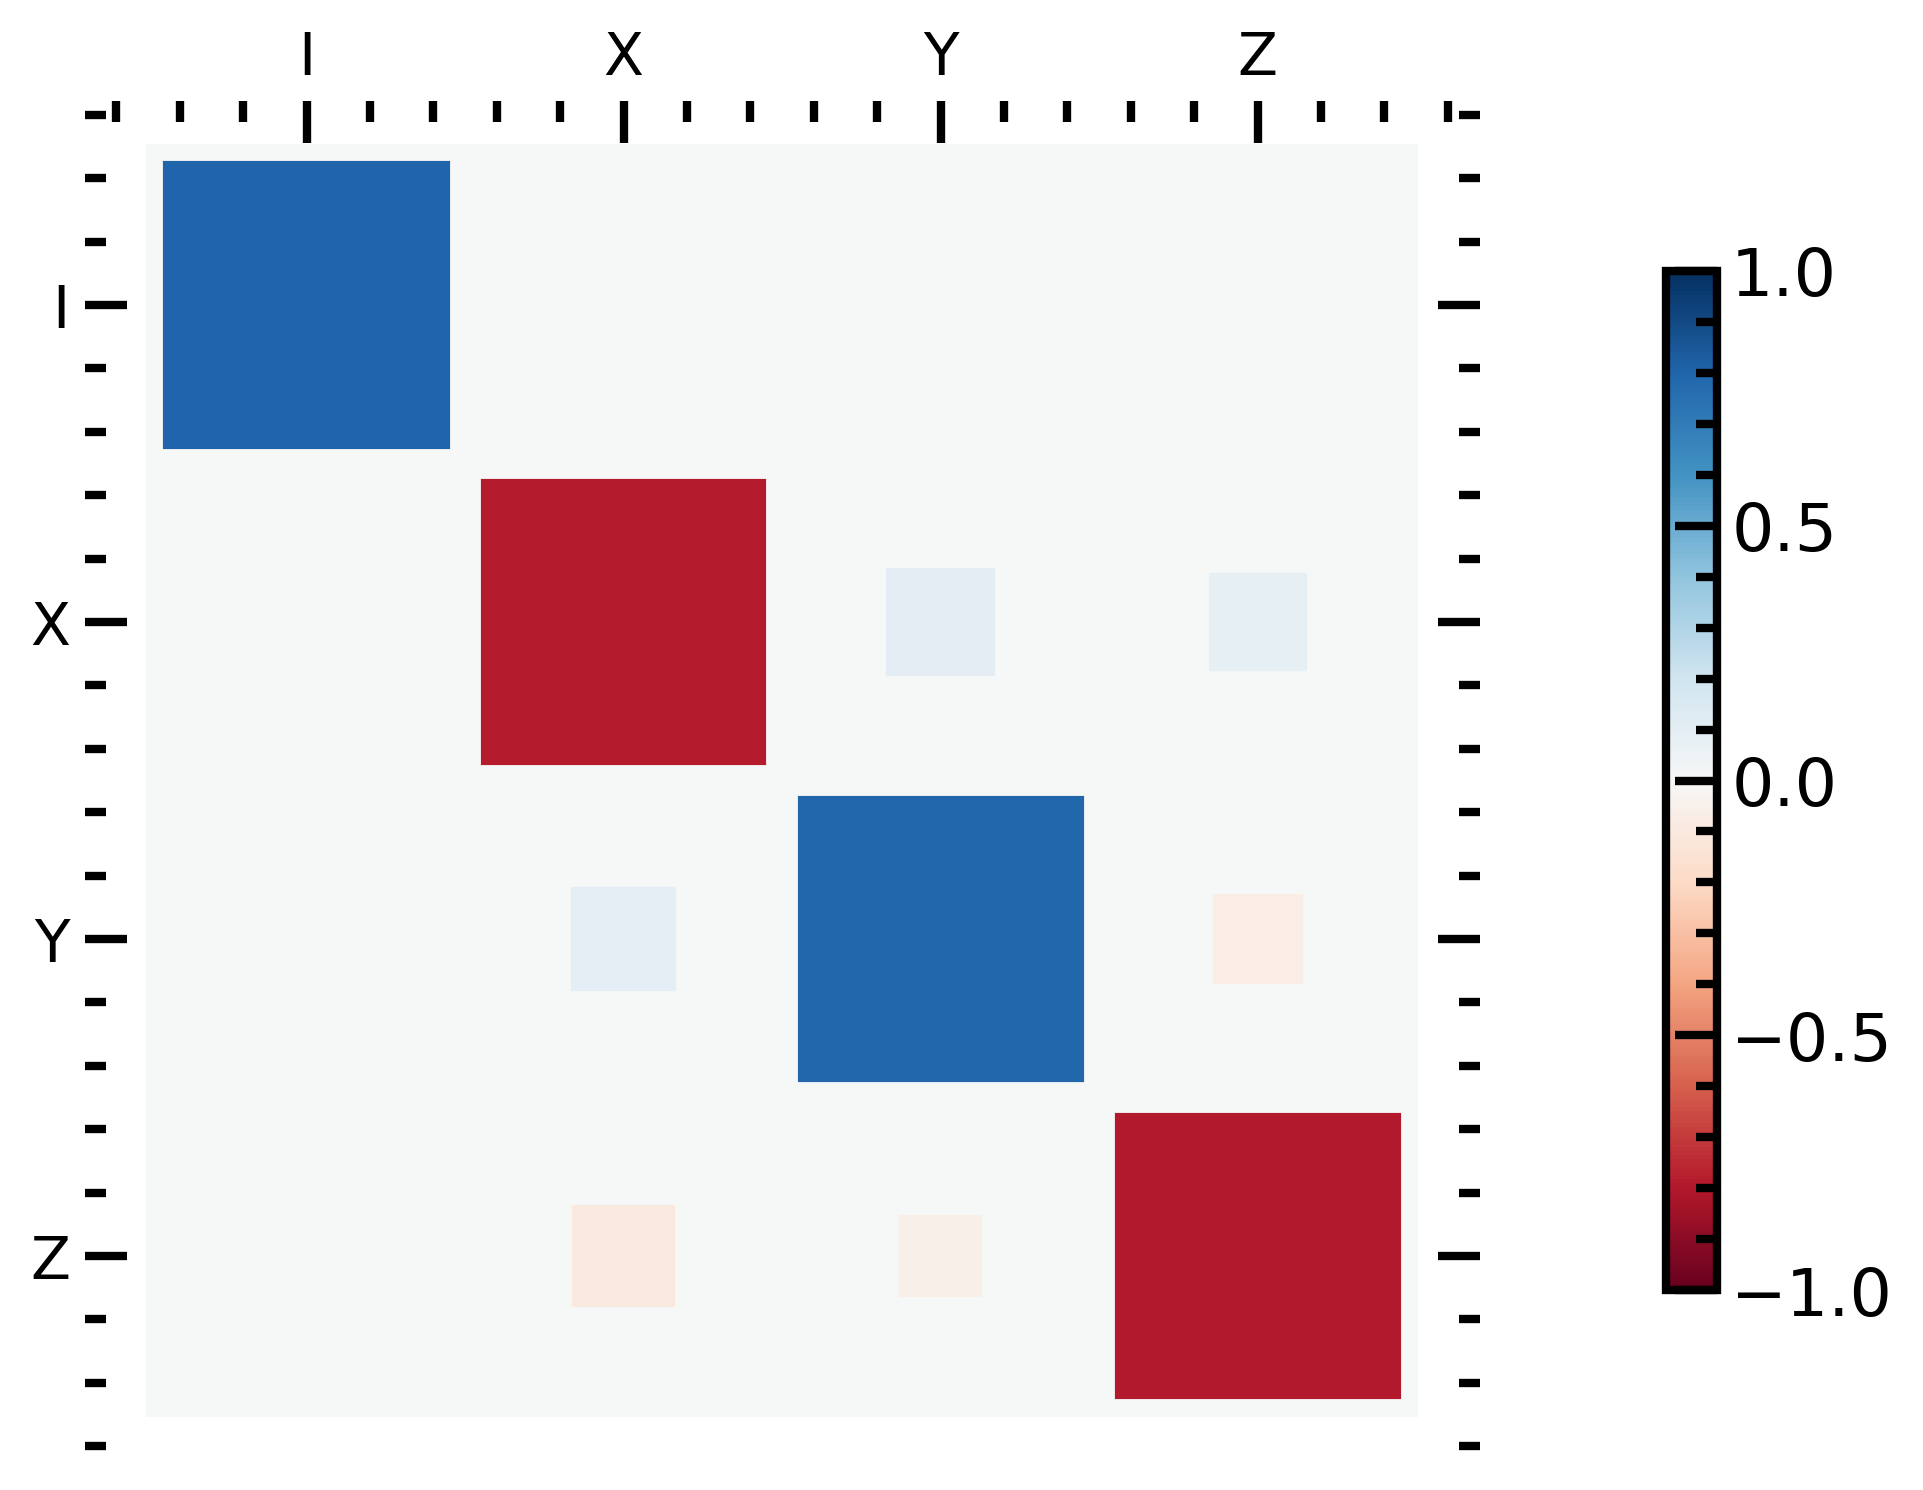

In [198]:
prep_ops = [qeye(nlev_single), op.sx(phi=np.pi/2, N=nlev_single), op.sy(phi=-np.pi/2, N=nlev_single), op.sigx(N=nlev_single)]
meas_ops = [qeye(nlev_single), op.sigx(N=nlev_single), op.sigy(N=nlev_single), op.sigz(N=nlev_single)]
p_in = np.zeros((4,4), dtype = complex)
p_out = np.zeros((4,4), dtype = complex)

# U=op.sy(phi=np.pi, N=nlev_single)
for i, prep in enumerate(prep_ops):
    psi_ini = prep*state_0
    for j, meas in enumerate(meas_ops):
        p_in[i,j] = np.real(expect(meas, psi_ini))
        p_out[i,j] = np.real(expect(meas, U*psi_ini))
        
ptm_real =  np.linalg.lstsq(p_out, p_in)[0]       
op_label = ["I","X","Y","Z"]
qutip.hinton(ptm_real, xlabels = op_label, ylabels = op_label)  